In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans


In [2]:
df= pd.read_csv("E:\customer_chrun.csv")
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Removing the column 4 which has info realted customer which is not usefull for case study.
As this column doesn't affect to the model, I am removing it.

In [3]:
#removing the unwanted column 
df = df.drop(['columns4'], axis=1)


In [4]:
# Define the new column names
new_columns = [
    "State",
    "Account Length",
    "Area Code",
    "International Plan",
    "VMail Plan",
    "VMail Message",
    "Day Mins",
    "Day Calls",
    "Day Charge",
    "Eve Mins",
    "Eve Calls",
    "Eve Charge",
    "Night Mins",
    "Night Calls",
    "Night Charge",
    "International Mins",
    "International Calls",
    "International Charge",
    "CustServ Calls",
    "Churn"
]

# Replace the column names
df.columns = new_columns


In [5]:
df.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
df=df.drop_duplicates()
df.shape

(4617, 20)

NO duplicates where found so nothing was removed

In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'State': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in column 'Account Length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69

In [8]:
column = df.columns 
for i in column:
    print(df.dtypes[i])

object
int64
int64
object
object
int64
float64
int64
float64
float64
int64
float64
float64
int64
float64
float64
int64
float64
int64
object


In [9]:
#Checking for null values
df.isnull().sum()

State                   0
Account Length          0
Area Code               0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

isnull() for Standard Missing Values:

Identifies standard representations of missing values such as NaN, None, and null.
Custom Missing Value Check:

Searches for additional placeholders for missing values (e.g., "NA", "N/A", "null", " ").
Combine Results:

Combines the counts of standard and custom missing values to calculate the total missing count.
Output:

Displays a summary showing the count of missing values (both standard and additional) for each column.

In [11]:
data=df.copy()

In [12]:
import pandas as pd
import numpy as np

def check_missing_values(data):
    # Standard missing values
    missing_count = data.isnull().sum()
    
    # Check for other representations of missing values
    other_missing_values = ["", " ", "NA", "N/A", "n/a", "null", "NULL", "NaN", "nan", "-", "--"]
    
    additional_missing = pd.DataFrame({
        col: data[col].apply(lambda x: x in other_missing_values).sum()
        for col in data.columns
    }, index=["Other Missing Count"]).T
    
    # Combine both checks
    total_missing = pd.DataFrame({
        "Standard Missing Count": missing_count,
        "Other Missing Count": additional_missing["Other Missing Count"],
        "Total Missing Count": missing_count + additional_missing["Other Missing Count"]
    })
    
    print("Summary of Missing Values:")
    print(total_missing)
    return total_missing

# Call the function on your dataset
missing_summary = check_missing_values(data)


Summary of Missing Values:
                      Standard Missing Count  Other Missing Count  \
State                                      0                    0   
Account Length                             0                    0   
Area Code                                  0                    0   
International Plan                         0                    0   
VMail Plan                                 0                    0   
VMail Message                              0                    0   
Day Mins                                   0                    0   
Day Calls                                  0                    0   
Day Charge                                 0                    0   
Eve Mins                                   0                    0   
Eve Calls                                  0                    0   
Eve Charge                                 0                    0   
Night Mins                                 0                    0   
Night C

In [13]:
data.nunique()


State                     51
Account Length           218
Area Code                  3
International Plan         2
VMail Plan                 2
VMail Message             47
Day Mins                1901
Day Calls                123
Day Charge              1901
Eve Mins                1833
Eve Calls                125
Eve Charge              1621
Night Mins              1813
Night Calls              130
Night Charge            1012
International Mins       168
International Calls       21
International Charge     168
CustServ Calls            10
Churn                      2
dtype: int64

In [14]:
print(data.describe(include='all'))  # Summary of numeric and categorical data


       State  Account Length    Area Code International Plan VMail Plan  \
count   4617     4617.000000  4617.000000               4617       4617   
unique    51             NaN          NaN                  2          2   
top       WV             NaN          NaN                 no         no   
freq     149             NaN          NaN               4171       3381   
mean     NaN      100.645224   437.046350                NaN        NaN   
std      NaN       39.597194    42.288212                NaN        NaN   
min      NaN        1.000000   408.000000                NaN        NaN   
25%      NaN       74.000000   408.000000                NaN        NaN   
50%      NaN      100.000000   415.000000                NaN        NaN   
75%      NaN      127.000000   510.000000                NaN        NaN   
max      NaN      243.000000   510.000000                NaN        NaN   

        VMail Message     Day Mins    Day Calls   Day Charge     Eve Mins  \
count     4617.000000 

In [14]:
data['State'] = data['State'].str.strip()  # Remove leading/trailing spaces


In [15]:
data['International Plan'] = data['International Plan'].str.replace(r'[,.:;]', '', regex=True).str.strip()
data['VMail Plan'] = data['VMail Plan'].str.replace(r'[,.:;]', '', regex=True).str.strip()
data['State'] = data['State'].str.replace(r'[,.:;]', '', regex=True).str.strip()

In [16]:
# Apply Label Encoding
for col in ['International Plan', 'VMail Plan']:
    data[col] = LabelEncoder().fit_transform(data[col])

In [17]:
# Frequency Encoding
for col in ['State']:
    freq = data[col].value_counts() / len(data)
    data[col] = data[col].map(freq)

In [18]:
import pandas as pd

def verify_and_correct_frequency_encoding(data, column):
    # Step 1: Recompute frequency encoding
    recomputed_freq = data[column].value_counts() / len(data)
    
    # Step 2: Map the recomputed values to a new column
    recomputed_encoded = data[column].map(recomputed_freq)
    
    # Step 3: Compare original and recomputed values
    mismatches = data[data[column] != recomputed_encoded]
    
    # Step 4: Print mismatched rows (if any)
    if not mismatches.empty:
        print(f"Mismatched values found in column '{column}':")
        print(mismatches[[column]])
        print("\nRecomputing correct encoding...")
        data[column] = recomputed_encoded
        print(f"Corrected the encoding for column '{column}'.")
    else:
        print(f"No mismatches found in column '{column}'.")
    
    return data

# Verify and correct frequency encoding for 'State'
data = verify_and_correct_frequency_encoding(data, 'State')


Mismatched values found in column 'State':
         State
1     0.023825
2     0.022959
3     0.023825
4     0.017327
7     0.018194
...        ...
4611  0.017111
4612  0.023608
4613  0.018194
4614  0.020576
4616  0.019277

[2893 rows x 1 columns]

Recomputing correct encoding...
Corrected the encoding for column 'State'.


In [19]:
# Check unique values in the columns that were encoded
for col in ['International Plan', 'VMail Plan', 'Churn']:
    unique_values = data[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'International Plan': [0 1]
Unique values in column 'VMail Plan': [1 0]
Unique values in column 'Churn': [' False.' ' True.']


In [20]:
data.head(20)

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,0.020793,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,0.047650,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,0.045917,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,0.047650,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,0.034655,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,0.024691,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,0.021009,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,0.036387,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,0.015811,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,0.032272,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [21]:
# Convert 'True' and 'False' to 1 and 0, respectively
data['Chrun']=data['Churn'].map({' True.': 1, ' False.': 0})

In [22]:
data

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,Chrun
0,0.020793,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,0.047650,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,0.045917,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,0.047650,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,0.034655,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.047217,57,510,0,1,25,144.0,81,24.48,187.2,...,15.91,158.6,122,7.14,8.5,6,2.30,3,False.,0
4613,0.036387,177,408,0,1,29,189.0,91,32.13,303.1,...,25.76,163.6,116,7.36,15.7,1,4.24,3,False.,0
4614,0.041152,67,408,0,1,33,127.5,126,21.68,296.1,...,25.17,200.9,91,9.04,13.0,3,3.51,1,False.,0
4615,0.021226,98,415,0,1,23,168.9,98,28.71,226.3,...,19.24,165.5,96,7.45,14.3,3,3.86,0,False.,0


In [23]:

# Drop the 'Churn' column
data = data.drop(columns=['Churn'])

# Verify the result
print(data.head())


      State  Account Length  Area Code  International Plan  VMail Plan  \
0  0.020793             128        415                   0           1   
1  0.047650             107        415                   0           1   
2  0.045917             137        415                   0           0   
3  0.047650              84        408                   1           0   
4  0.034655              75        415                   1           0   

   VMail Message  Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  \
0             25     265.1        110       45.07     197.4         99   
1             26     161.6        123       27.47     195.5        103   
2              0     243.4        114       41.38     121.2        110   
3              0     299.4         71       50.90      61.9         88   
4              0     166.7        113       28.34     148.3        122   

   Eve Charge  Night Mins  Night Calls  Night Charge  International Mins  \
0       16.78       244.7         

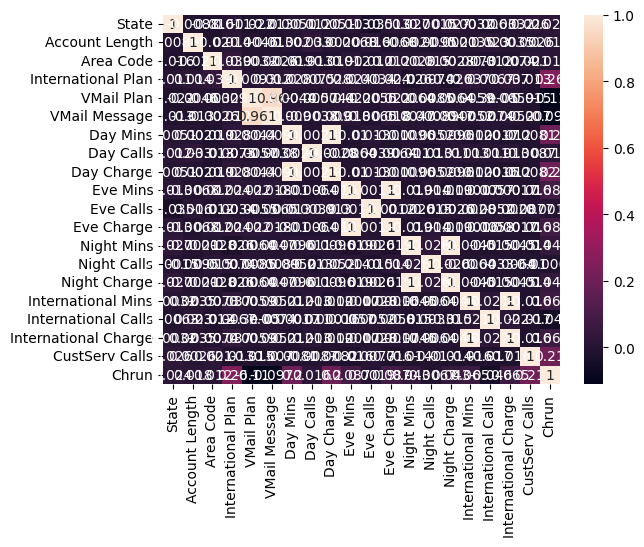

In [24]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.rcParams['figure.figsize']=(70,40)
plt.show()

Ignoring the columns which have negative corealtion 
'VMail Plan','VMail Message','Night Calls','International Calls'

In [25]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Chrun'],
      dtype='object')

In [26]:
data = data.drop(['VMail Plan', 'VMail Message', 'Night Calls', 'International Calls'], axis=1)

In [27]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Charge', 'International Mins',
       'International Charge', 'CustServ Calls', 'Chrun'],
      dtype='object')

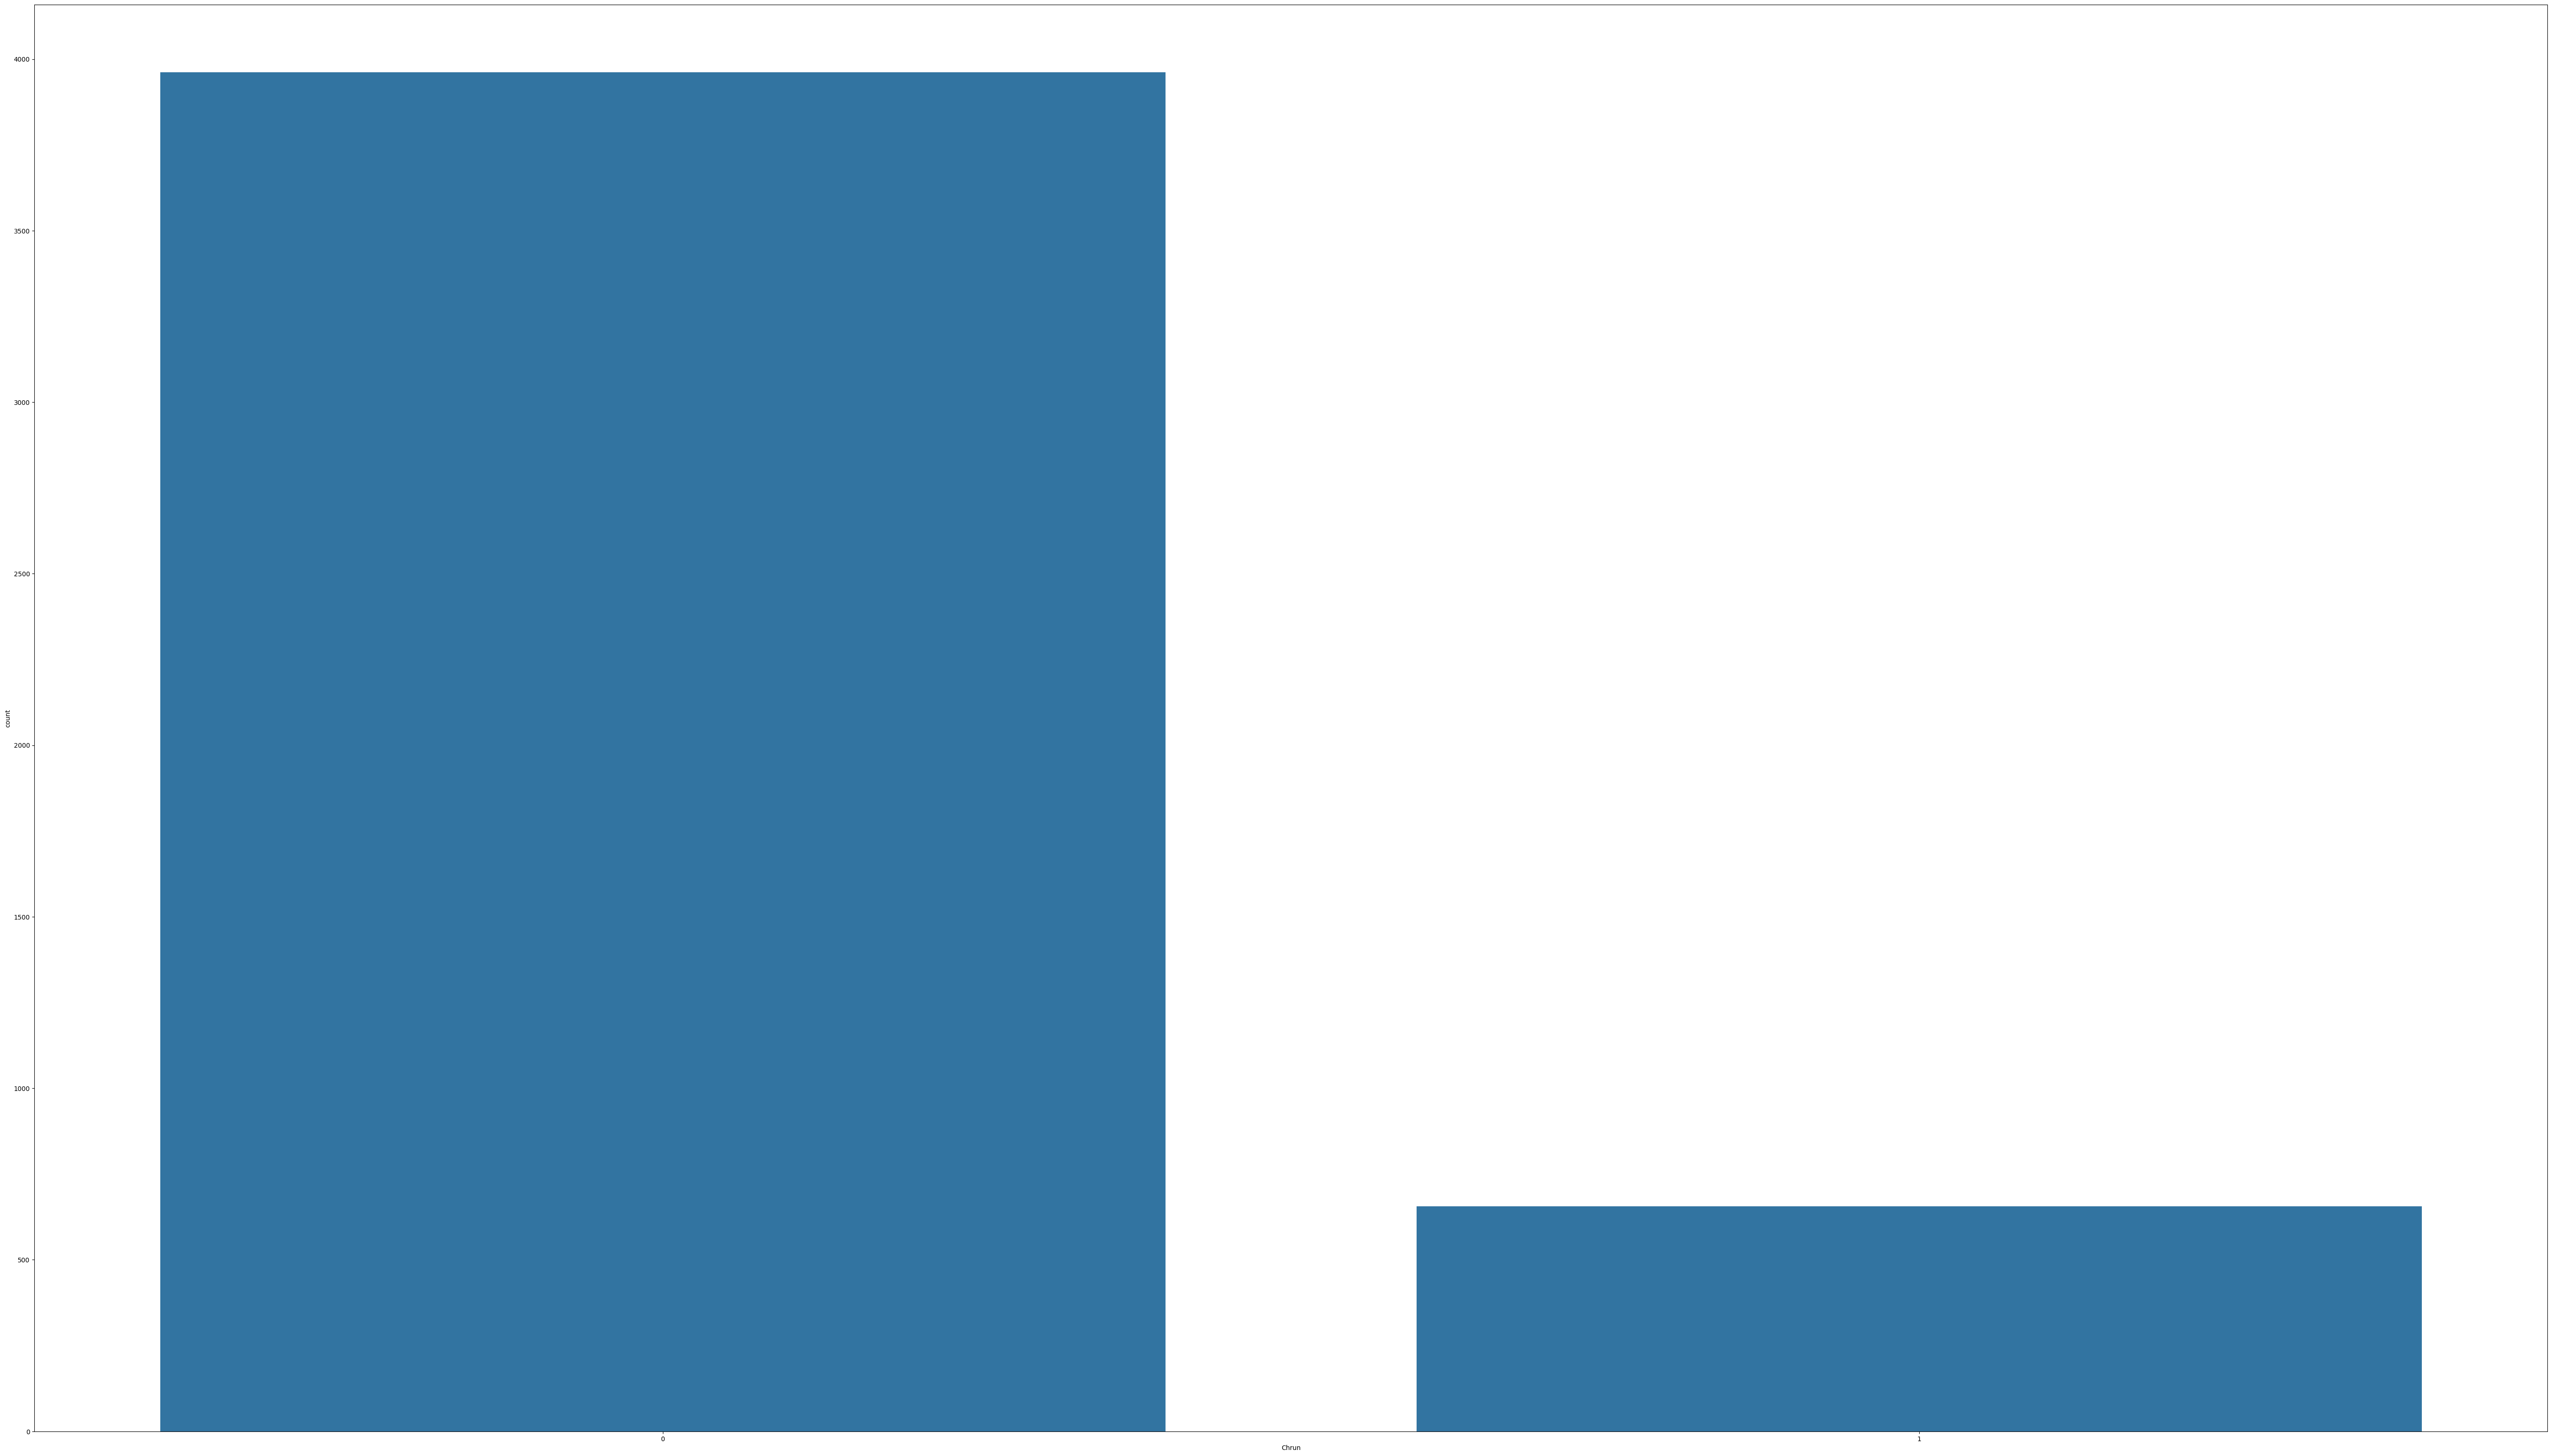

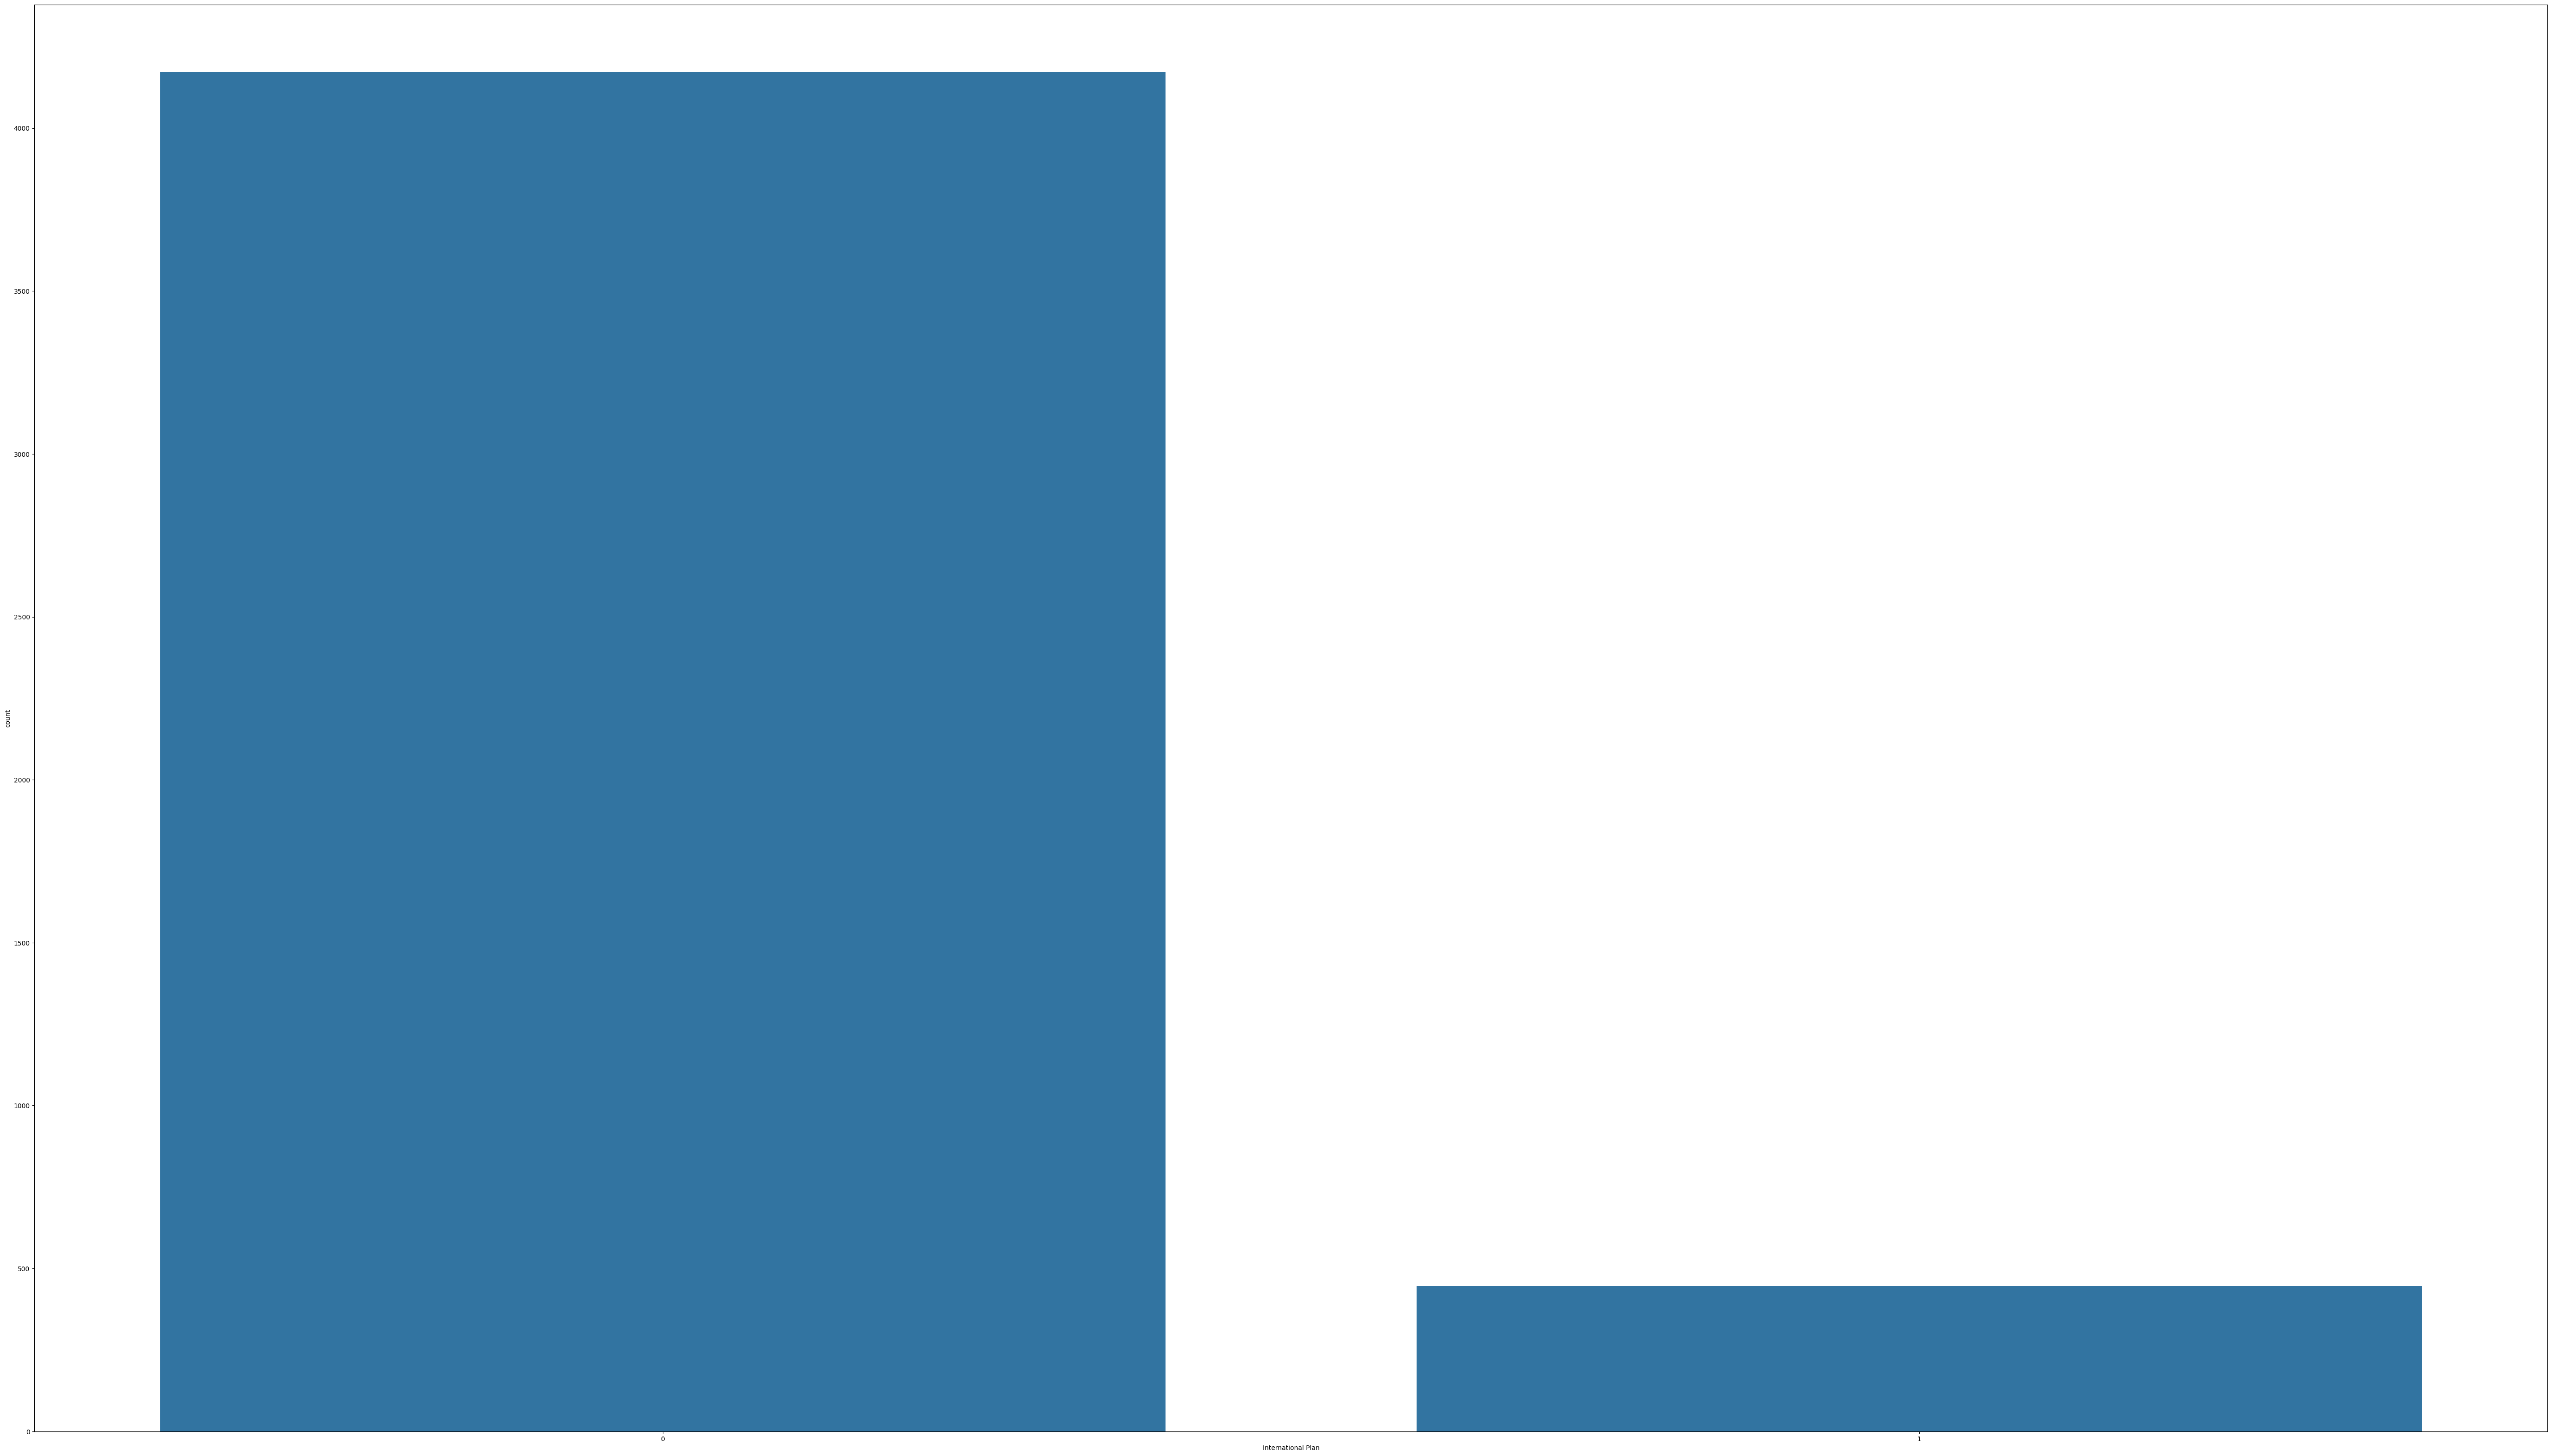

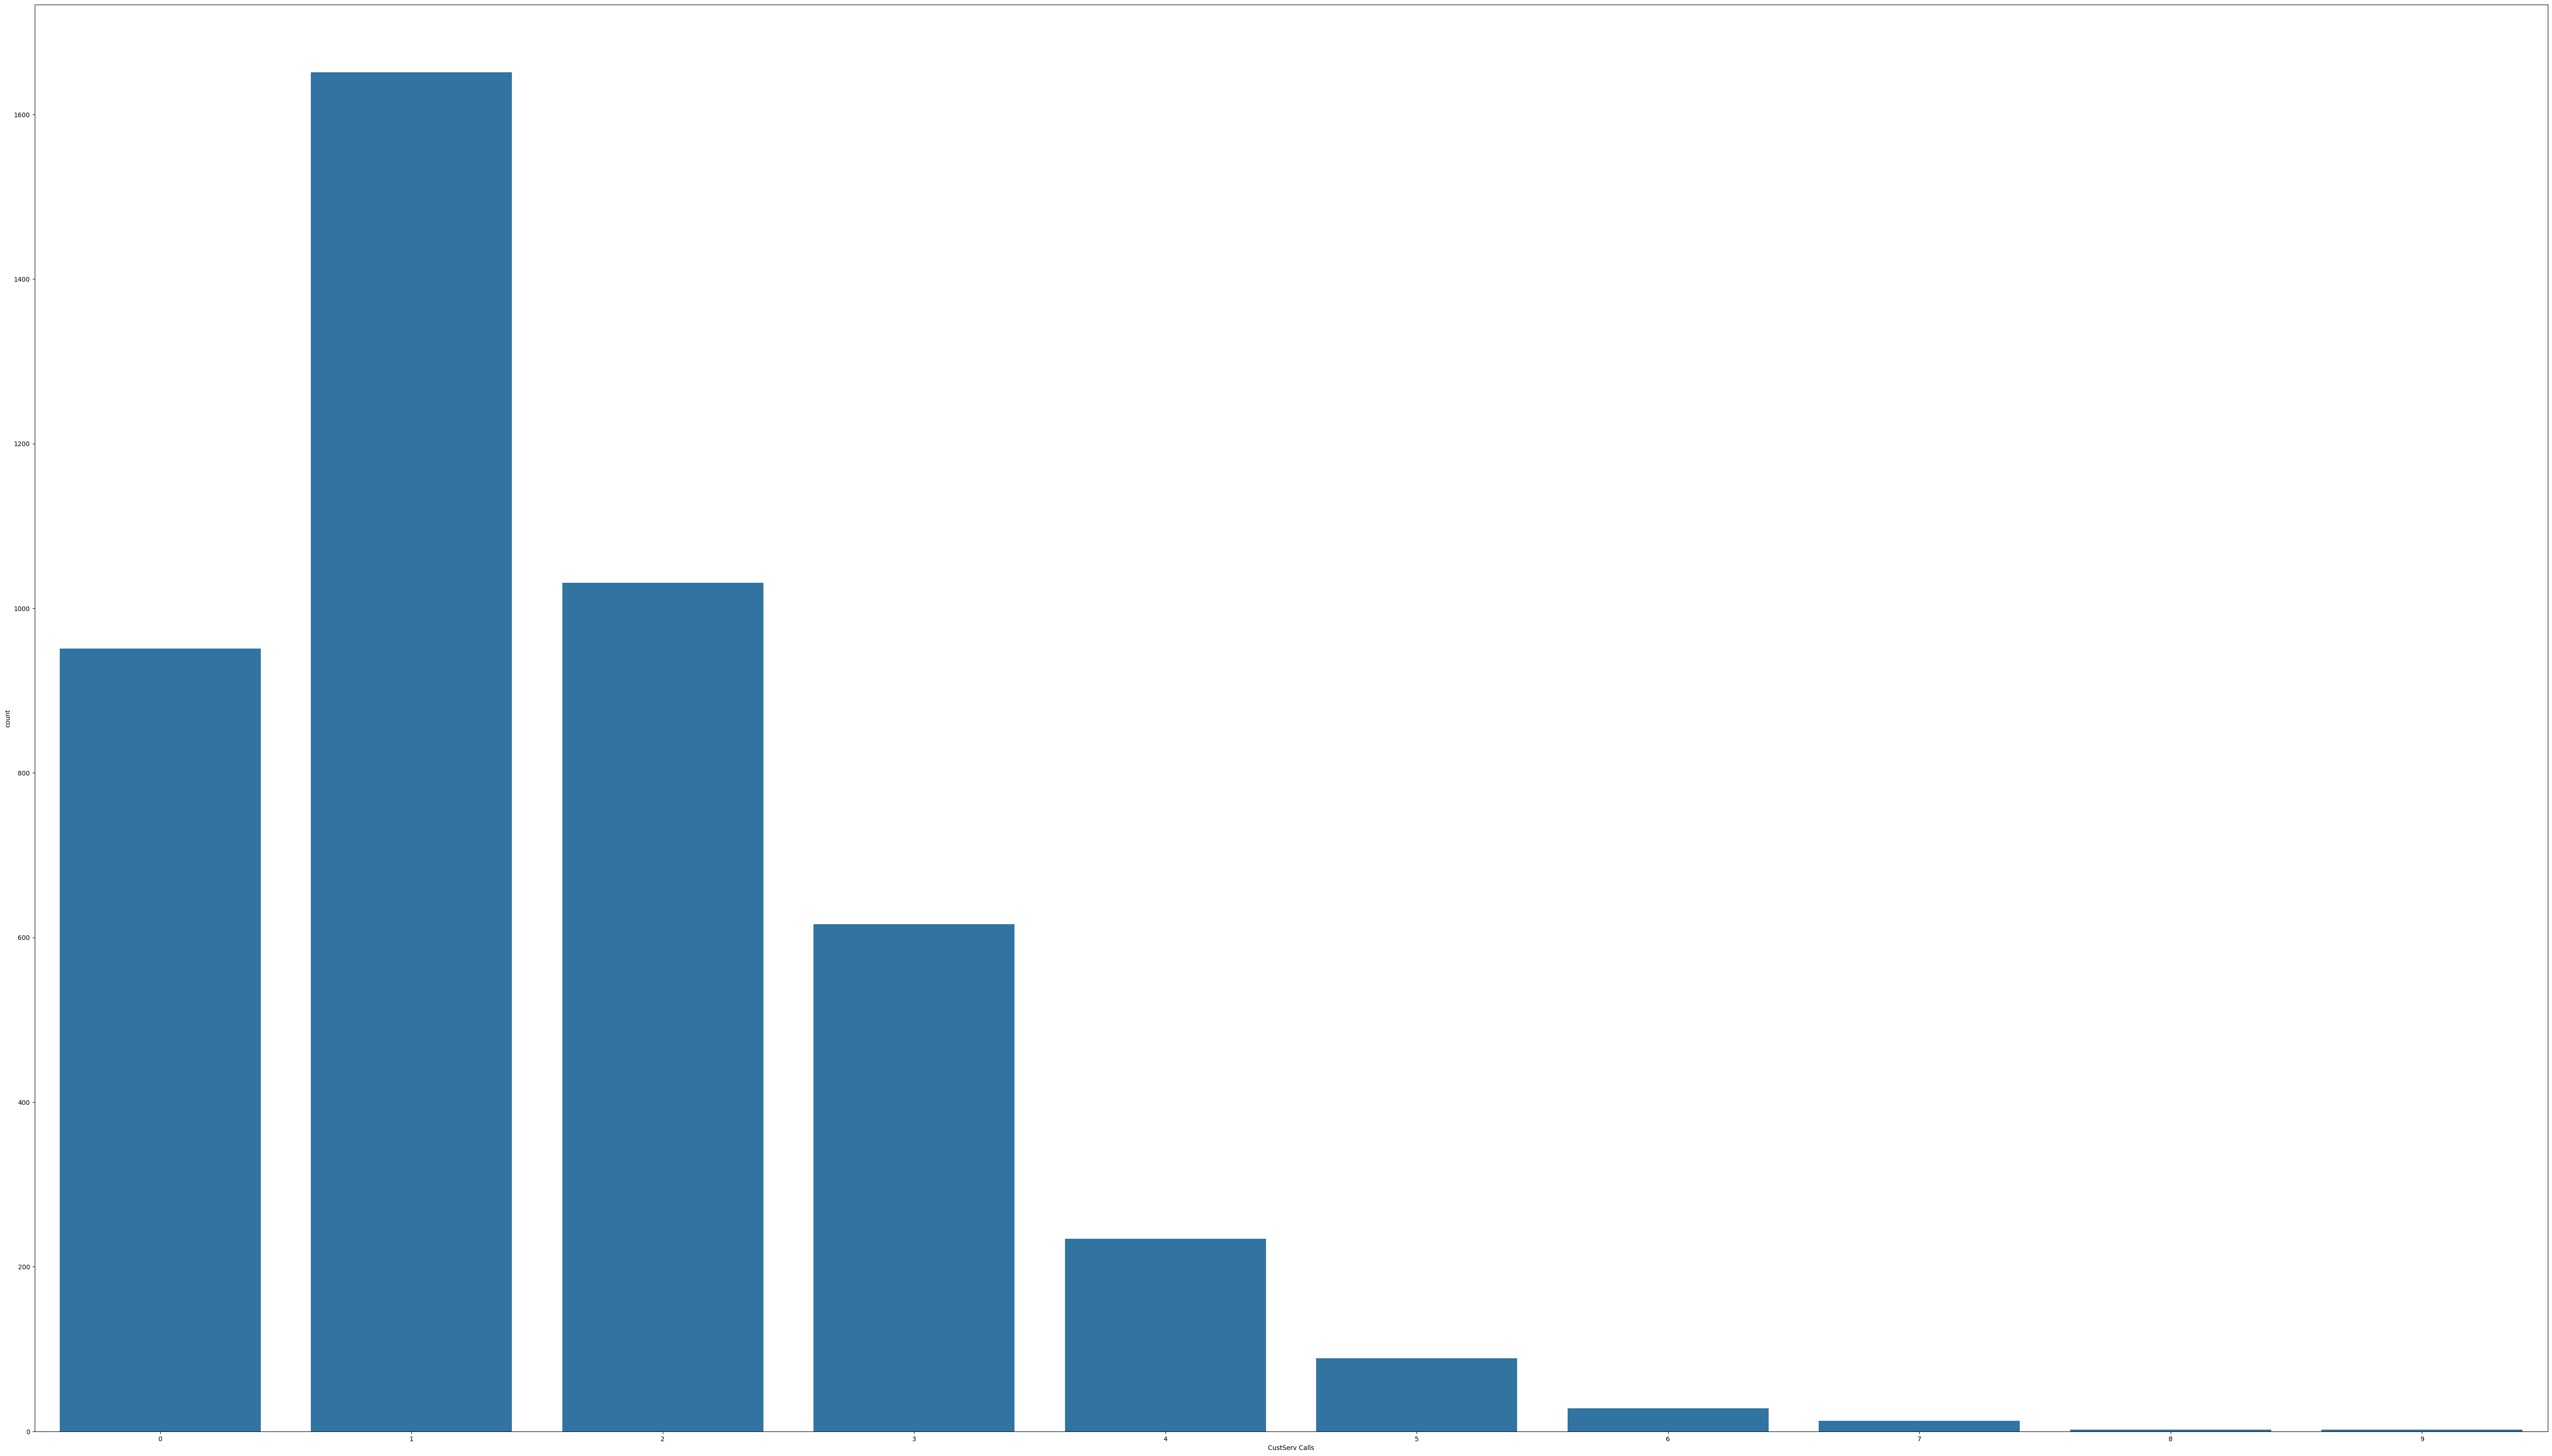

In [28]:
sns.countplot(x='Chrun', data=data)
plt.show()
sns.countplot(x='International Plan', data=data)
plt.show()
sns.countplot(x='CustServ Calls', data=data)
plt.show()


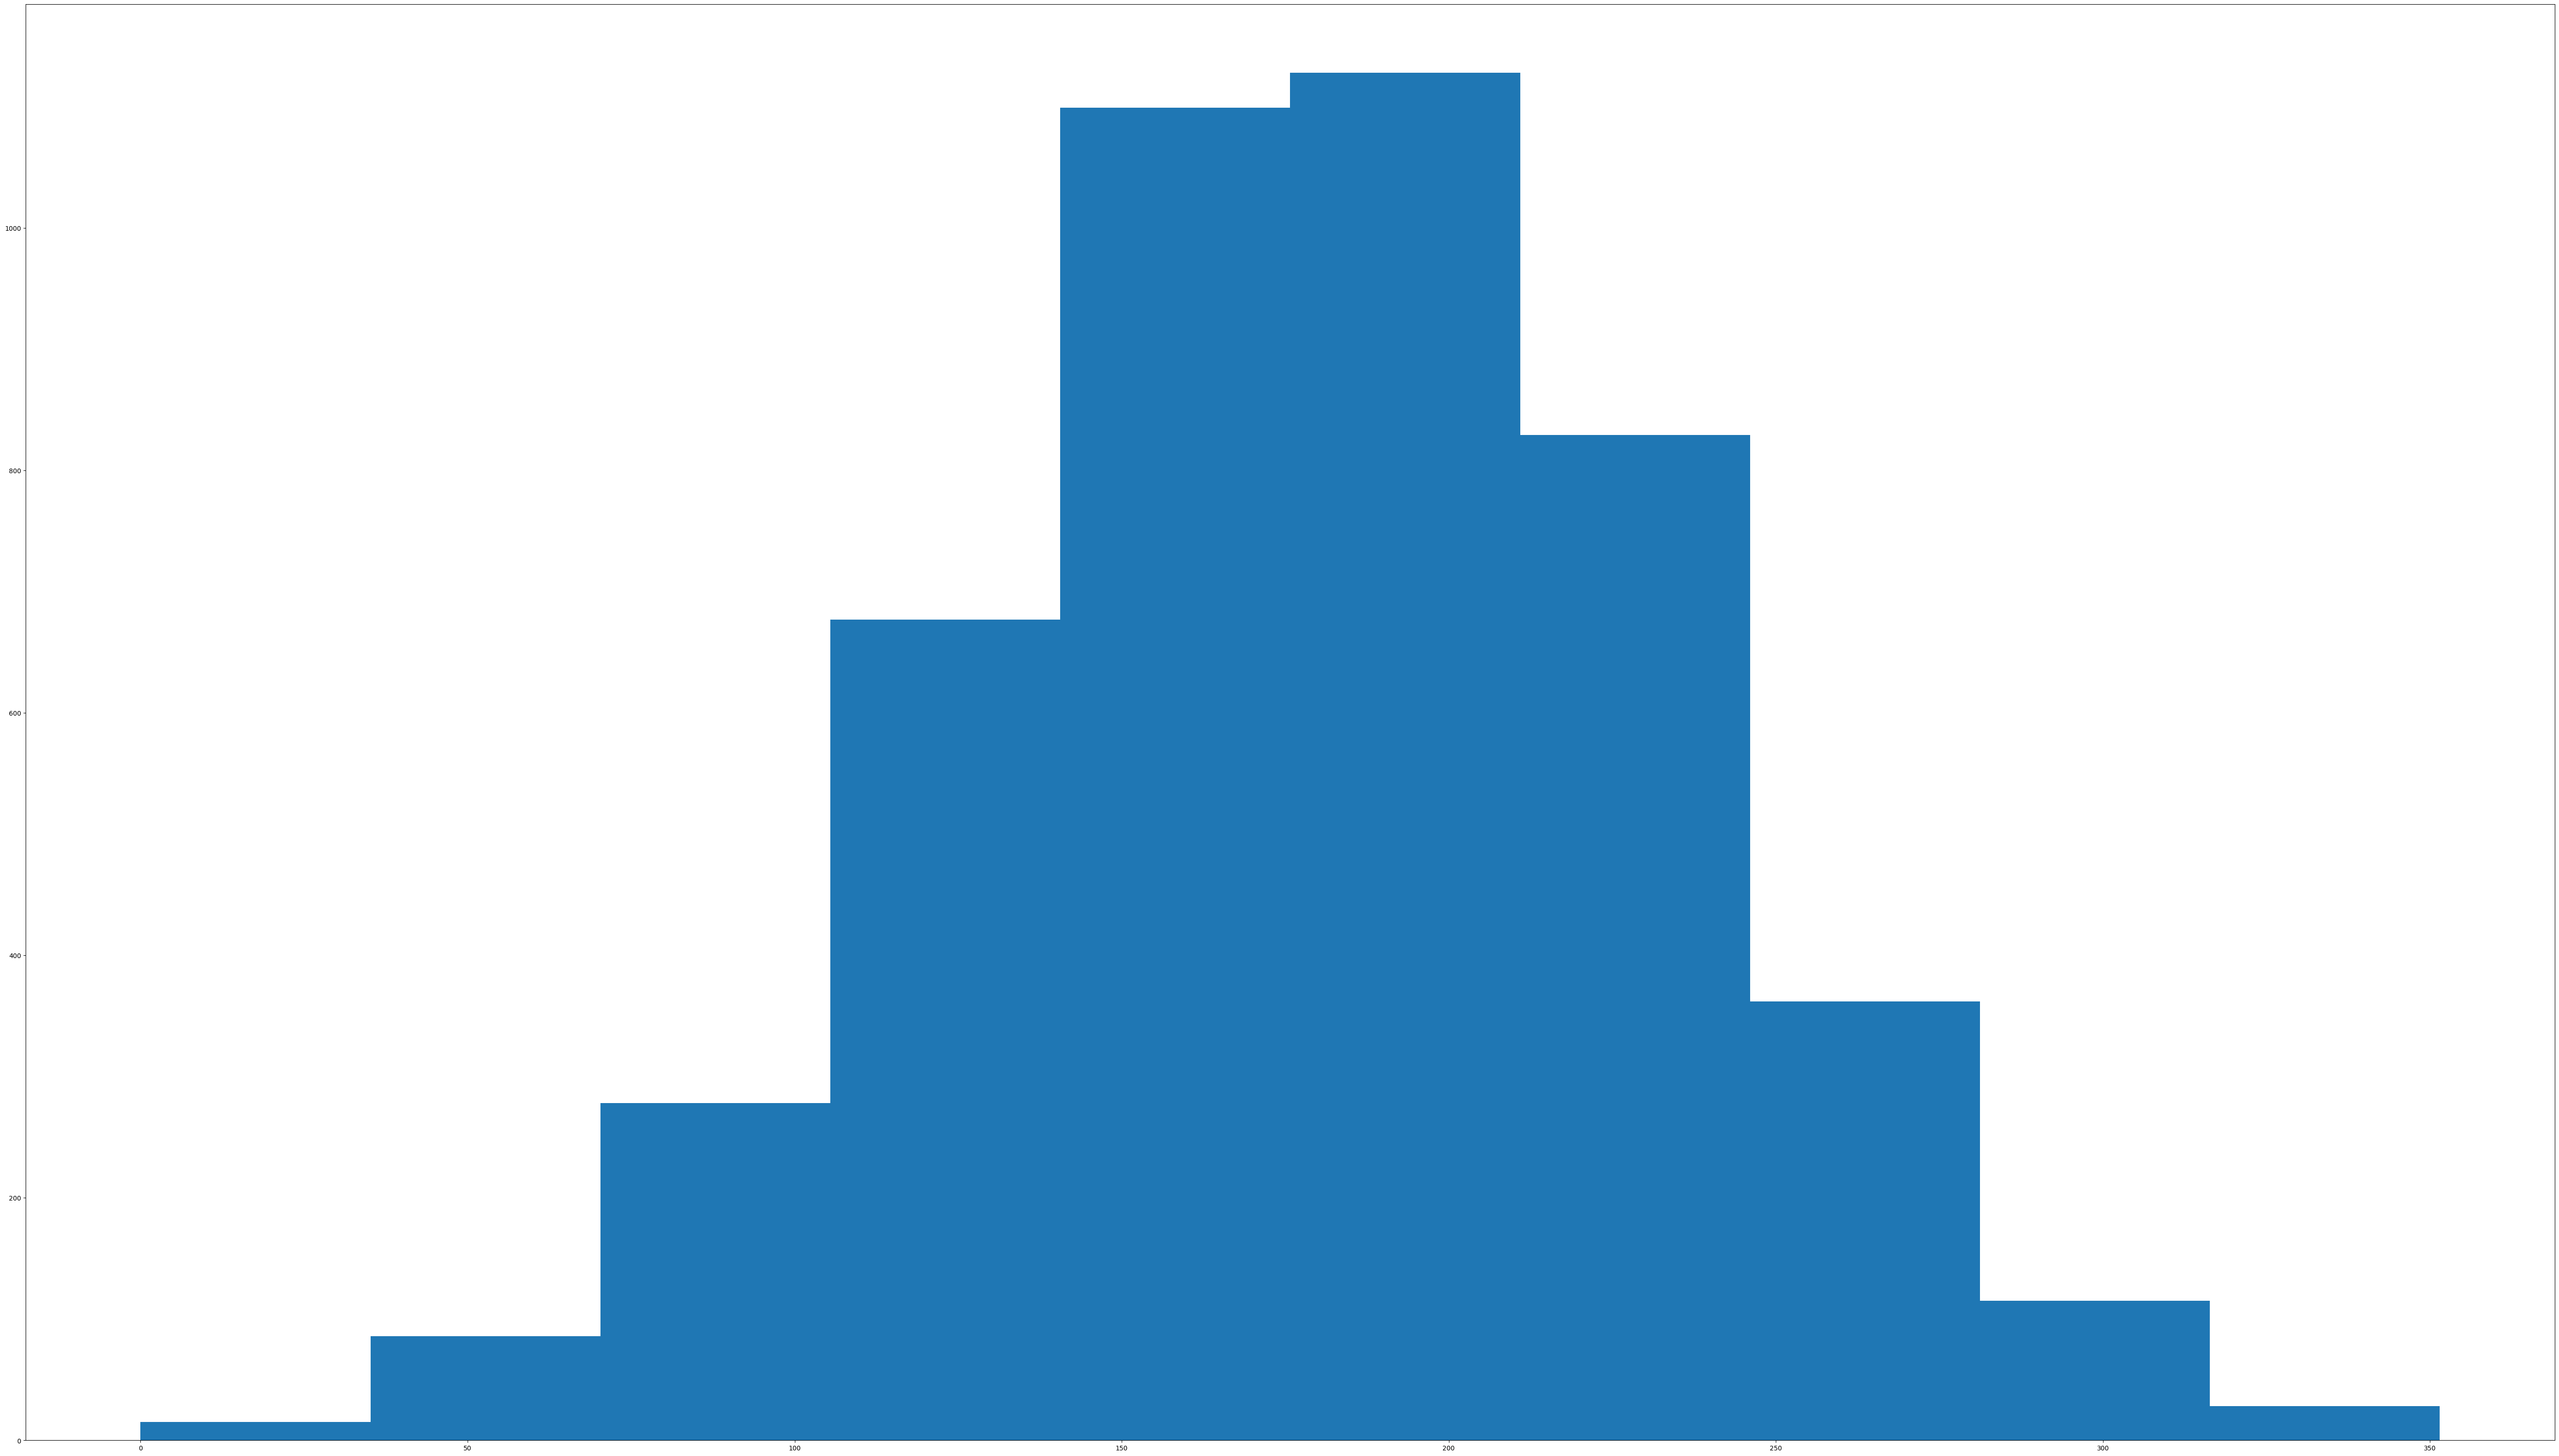

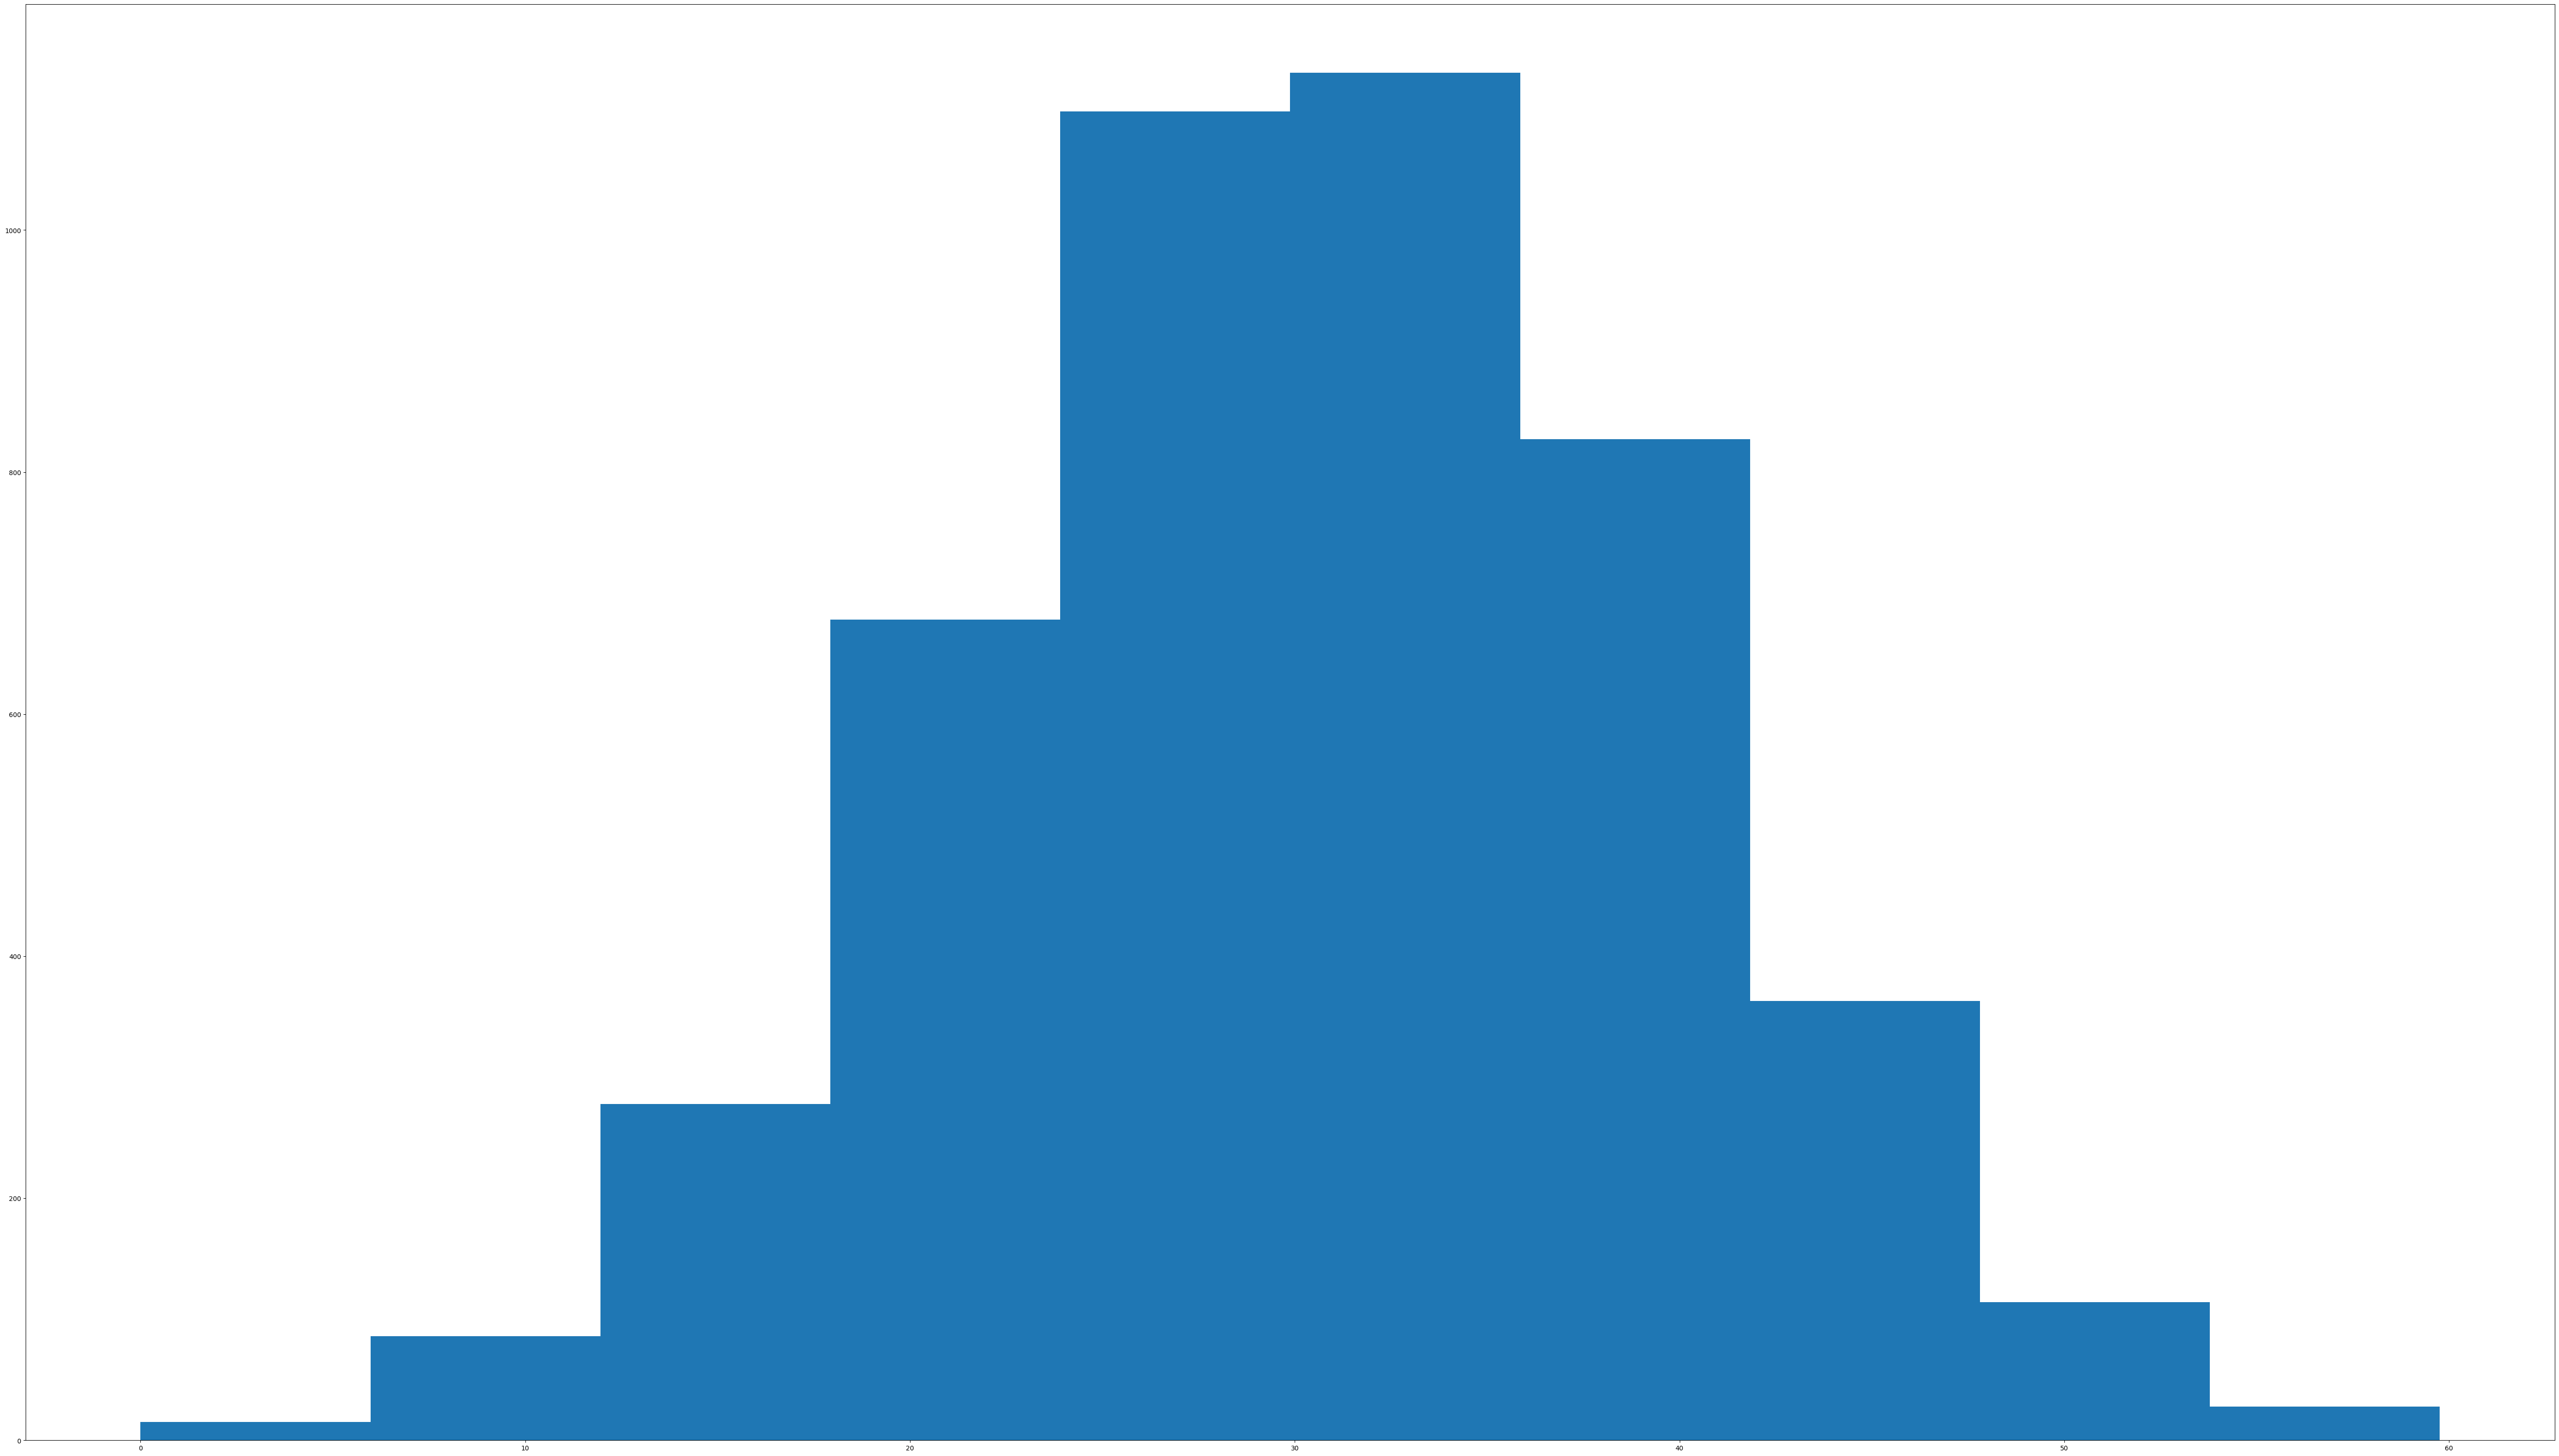

In [29]:
plt.hist(data['Day Mins'])
plt.show()
plt.hist(data['Day Charge'])
plt.show()

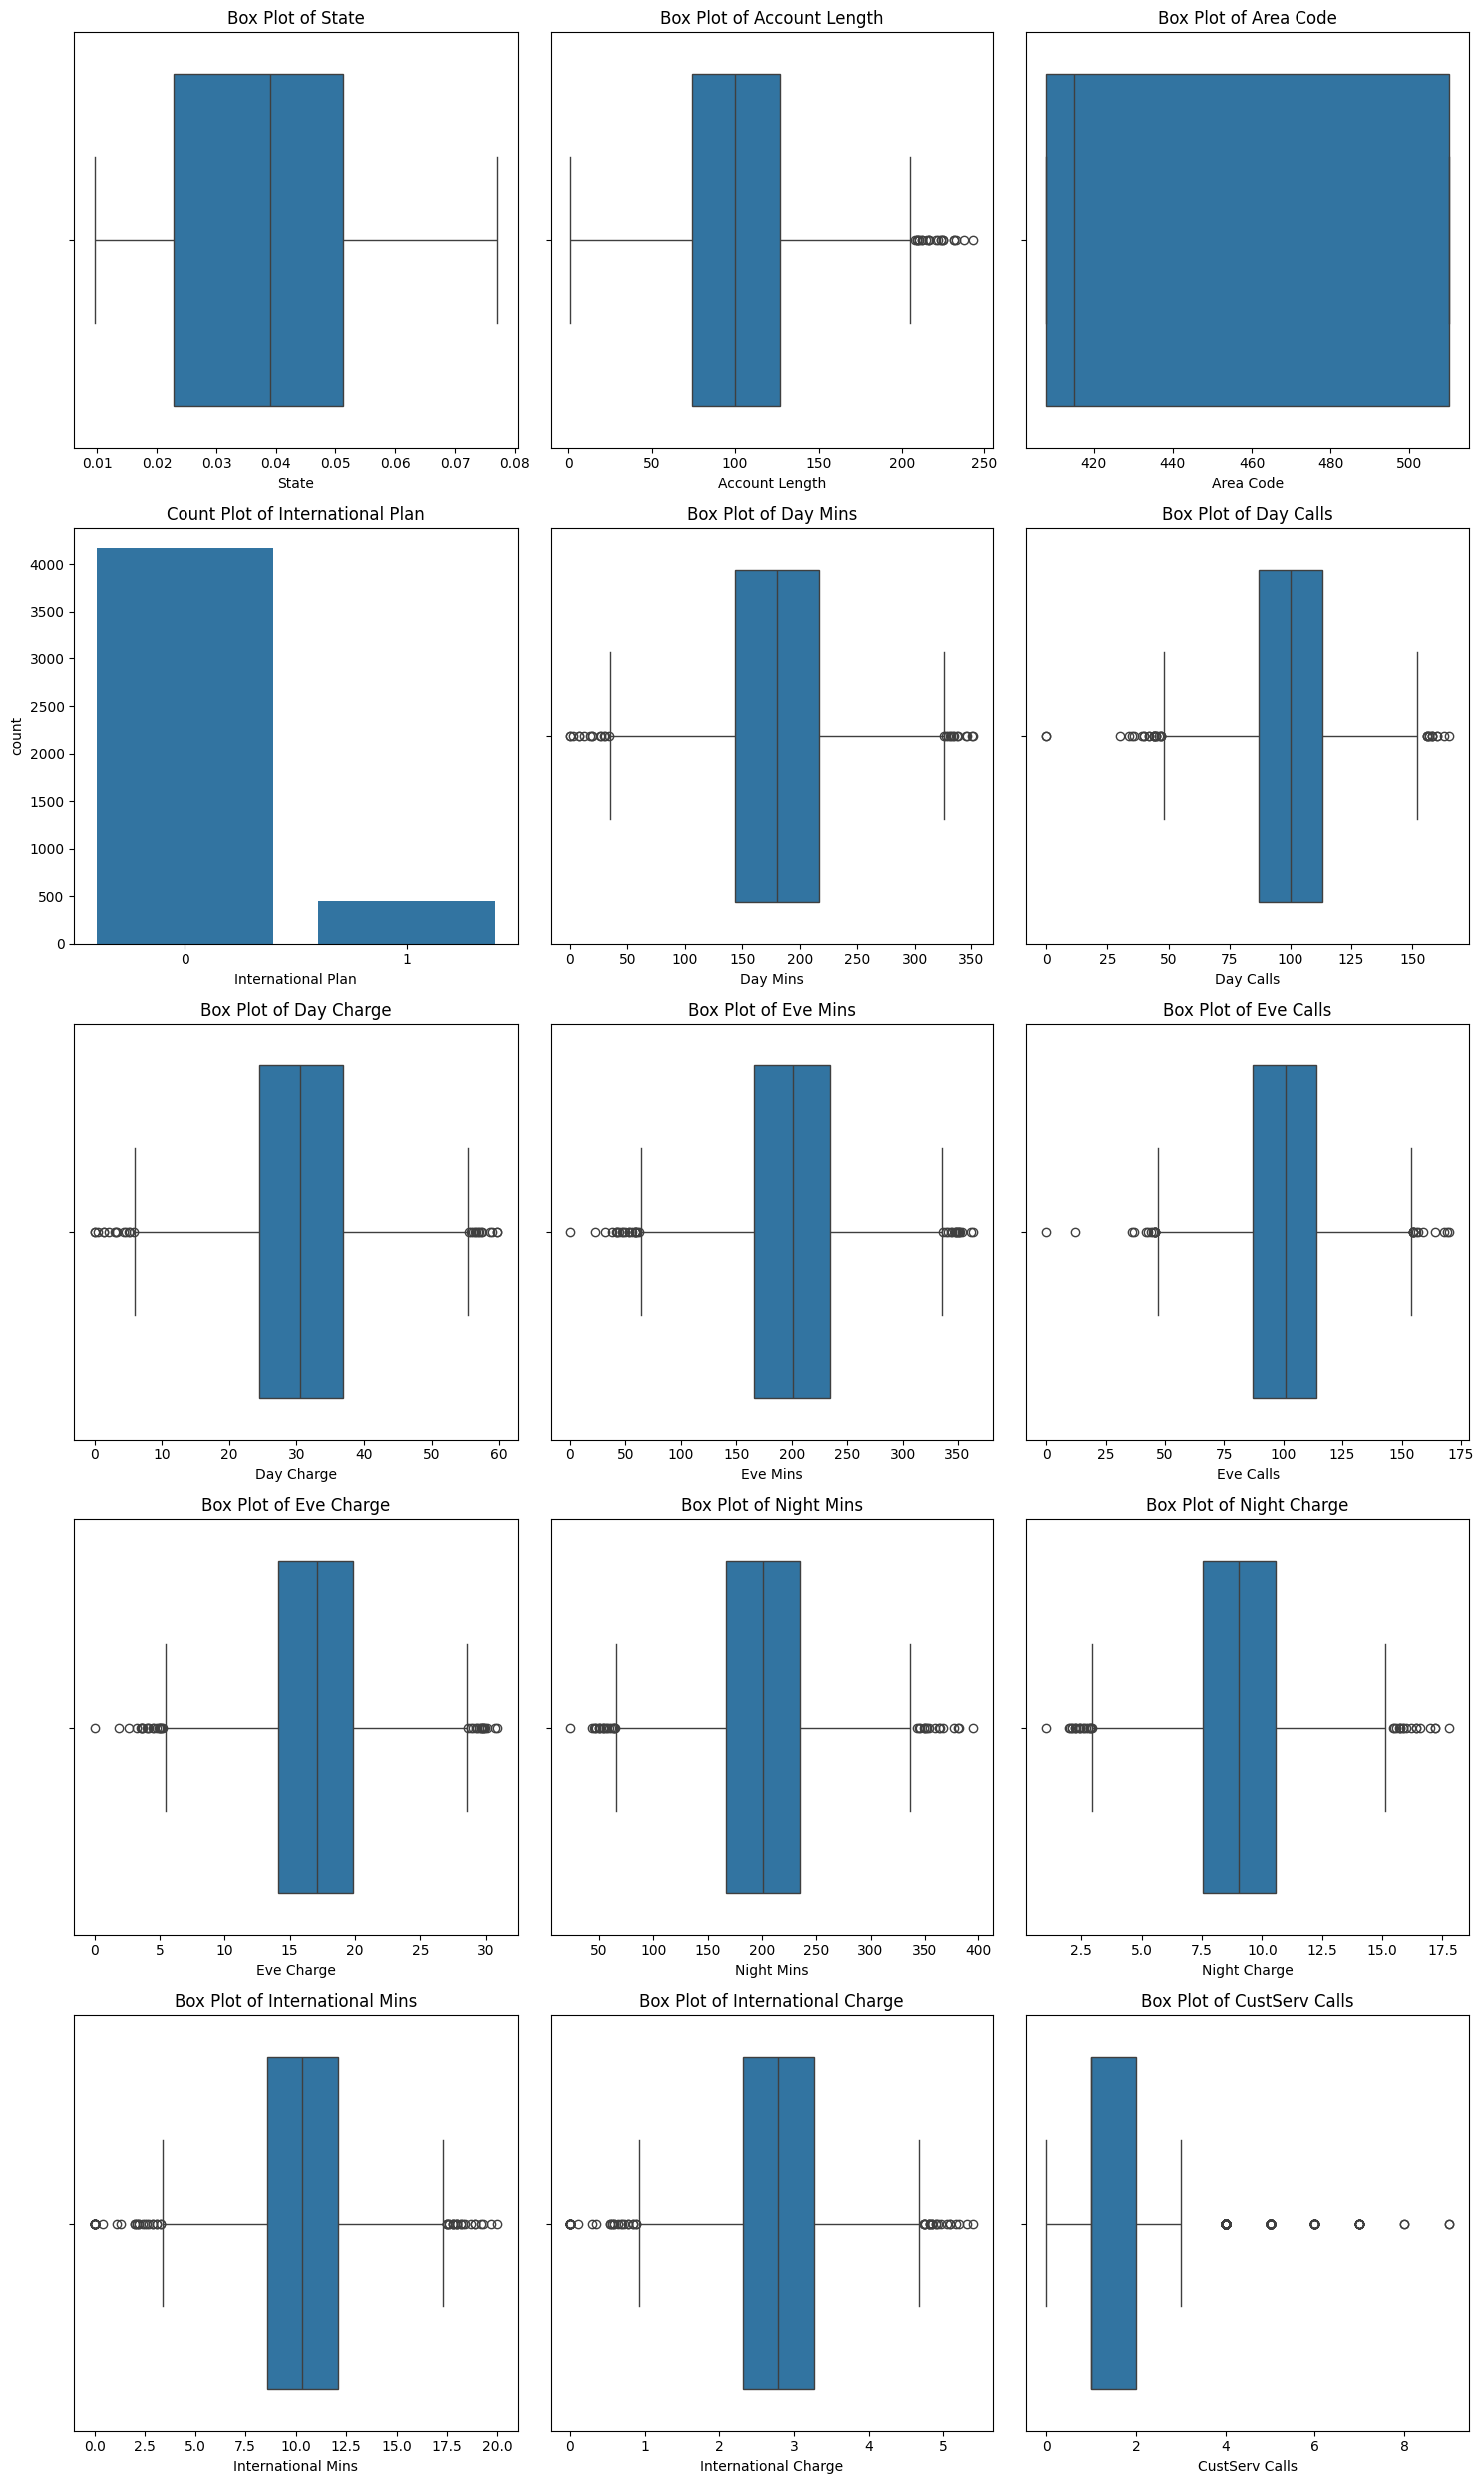

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for which box plots need to be created
columns = [
    'State', 'Account Length', 'Area Code', 'International Plan',
    'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
    'Eve Charge', 'Night Mins', 'Night Charge', 'International Mins',
    'International Charge', 'CustServ Calls',
]

# Number of columns to display per row in the plot grid
columns_per_row = 3

# Calculate the number of rows needed
num_rows = (len(columns) + columns_per_row - 1) // columns_per_row

# Create a figure with subplots
plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    # Plotting only numerical columns, skip non-numeric ones
    if data[col].dtype in ['int64', 'float64']:
        sns.boxplot(x=data[col])
    else:
        sns.countplot(x=data[col])  # Use countplot for categorical variables
    plt.title(f'Box Plot of {col}' if data[col].dtype in ['int64', 'float64'] else f'Count Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


Quantile Calculation:

𝑄
1
Q1 (25th percentile) and 
𝑄
3
Q3 (75th percentile) are calculated for each numeric column.
The IQR is computed as 
𝑄
3
−
𝑄
1
Q3−Q1.
Outlier Detection:

Outliers are defined as values outside the range 
[
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
,
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
]
[Q1−1.5×IQR,Q3+1.5×IQR].
Result Summary:

For each column, the function prints the lower and upper bounds, the count of outliers, and the actual outlier values.
Output:

The function returns a dictionary (outlier_summary) where you can access the detailed analysis for each column.

'International Plan', 'Churn' not included as these are categorical columns which also tend to have the unbalnced data.

In [31]:
import pandas as pd

def analyze_outliers_iqr(data, columns):
    outlier_summary = {}
    
    for column in columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            Q1 = data[column].quantile(0.25)  # First Quartile
            Q3 = data[column].quantile(0.75)  # Third Quartile
            IQR = Q3 - Q1  # Interquartile Range
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Find outliers
            outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            outlier_count = len(outliers)
            
            # Store the analysis in a dictionary
            outlier_summary[column] = {
                "Lower Bound": lower_bound,
                "Upper Bound": upper_bound,
                "Number of Outliers": outlier_count,
                "Outliers": outliers[[column]]
            }
            
            print(f"\nColumn: {column}")
            print(f"Lower Bound: {lower_bound}")
            print(f"Upper Bound: {upper_bound}")
            print(f"Number of Outliers: {outlier_count}")
            print("Outliers:")
            print(outliers[[column]])
            
    return outlier_summary

# List of columns to analyze (numeric columns only)
columns_to_check = [
    "State", "Account Length", "Area Code", "Day Mins", "Day Calls", "Day Charge",
    "Eve Mins", "Eve Calls", "Eve Charge", "Night Mins", "Night Charge", 
    "International Mins", "International Charge", "CustServ Calls"
]

# Call the function on your dataset
outlier_analysis = analyze_outliers_iqr(data, columns_to_check)



Column: State
Lower Bound: -0.02014294996751137
Upper Bound: 0.09421702404158544
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [State]
Index: []

Column: Account Length
Lower Bound: -5.5
Upper Bound: 206.5
Number of Outliers: 23
Outliers:
      Account Length
197              208
238              215
309              209
416              224
817              243
1045             217
1093             210
1387             212
1408             232
1551             225
1751             225
1886             224
2150             212
2259             210
2277             217
2700             209
3216             221
3227             209
4260             238
4342             216
4379             222
4389             232
4395             233

Column: Area Code
Lower Bound: 255.0
Upper Bound: 663.0
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [Area Code]
Index: []

Column: Day Mins
Lower Bound: 34.049999999999955
Upper Bound: 326.45000000000005
Number of Outliers: 27
Outl

In [40]:
# import pandas as pd
# from scipy.stats.mstats import winsorize
# import matplotlib.pyplot as plt

# # Define the columns to Winsorize
# columns_to_winsorize = [
#     'State', 'Account Length', 'Area Code', 'International Plan',
#     'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
#     'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
#     'Night Charge', 'International Mins', 'International Calls',
#     'International Charge', 'CustServ Calls'
# ]

# # Define the percentile limits for Winsorization (e.g., 1% and 99%)
# lower_limit = 0.05  # Lower 5%
# upper_limit = 0.05  # Upper 5% (complement for 95%)

# # Apply Winsorization
# for col in columns_to_winsorize:
#     if col in data.columns:  # Ensure the column exists in the dataset
#         try:
#             # Winsorize the column
#             data[col] = winsorize(data[col], limits=(lower_limit, upper_limit))
#         except Exception as e:
#             print(f"Error processing column {col}: {e}")

# # Visualize Before and After Winsorization
# plt.figure(figsize=(15, 7))

# # Before Winsorization (if you have the original data backed up)
# plt.subplot(1, 2, 1)
# data[columns_to_winsorize].boxplot(rot=90)
# plt.title('Before Winsorization')

# # After Winsorization
# plt.subplot(1, 2, 2)
# data[columns_to_winsorize].boxplot(rot=90)
# plt.title('After Winsorization')
# plt.tight_layout()
# plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_11056\3487166172.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='pastel')  # Customize palette


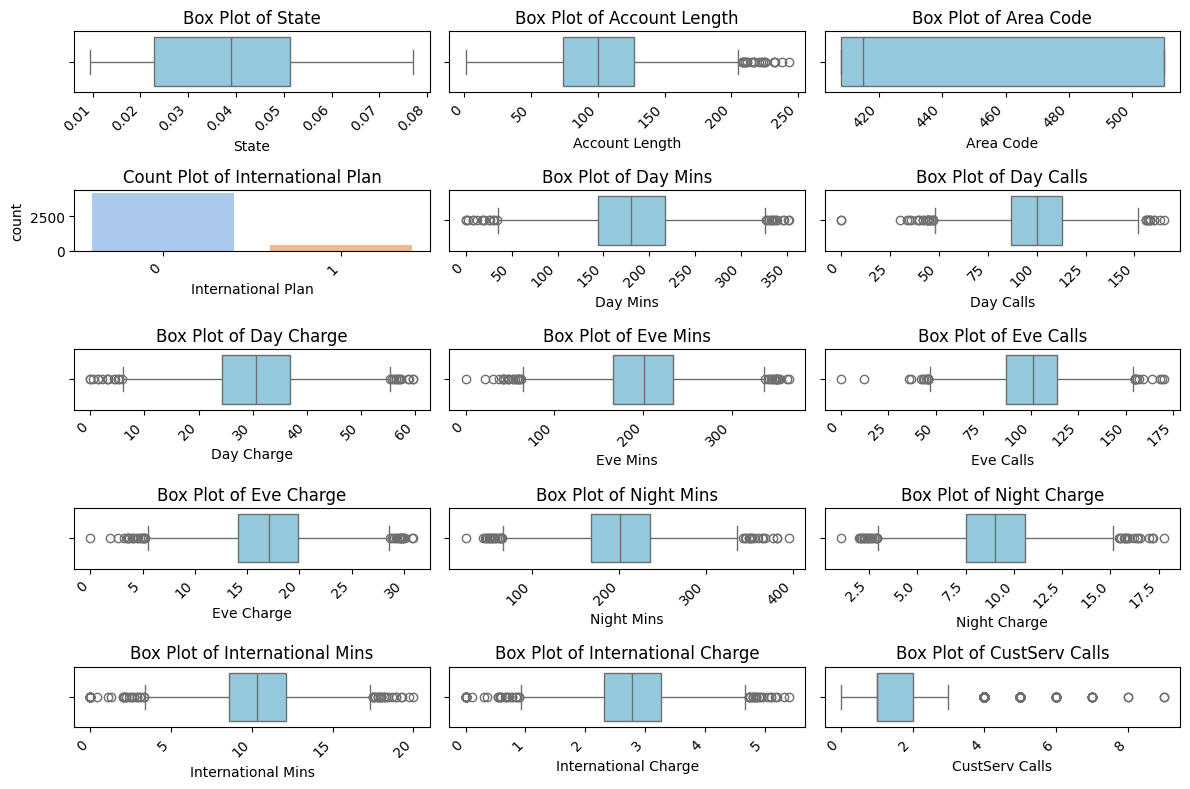

In [32]:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

for i, col in enumerate(columns, 1):
    plt.subplot(num_rows, columns_per_row, i)

    if data[col].dtype in ['int64', 'float64']:
        sns.boxplot(x=data[col], color='skyblue')  # Customize color
    else:
        sns.countplot(x=data[col], palette='pastel')  # Customize palette

    plt.title(f'Box Plot of {col}' if data[col].dtype in ['int64', 'float64'] else f'Count Plot of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout for better spacing
plt.show() 

C:\Users\user\AppData\Local\Temp\ipykernel_11056\3907456891.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.index, y=churn_corr.values, palette="coolwarm")


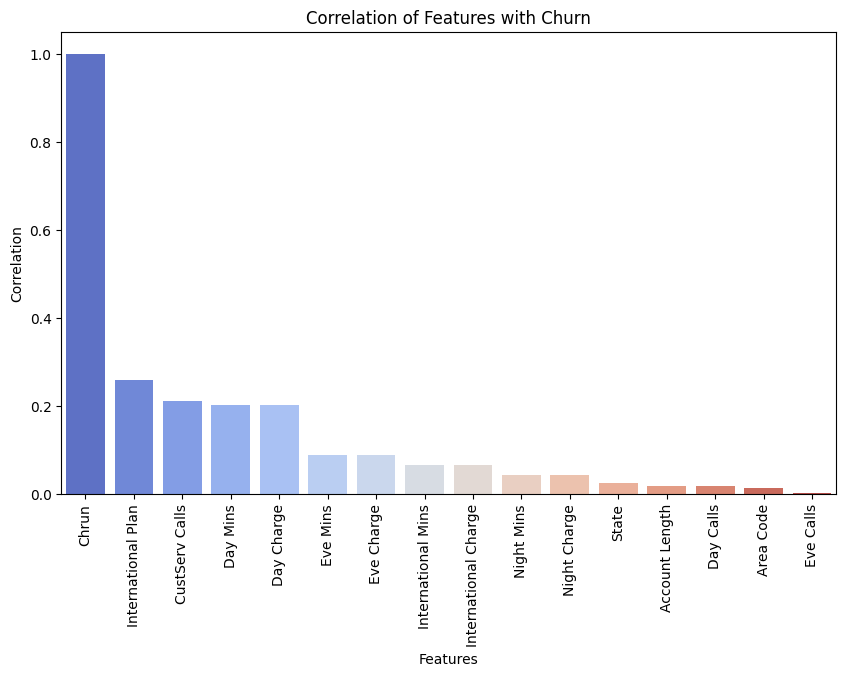

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation of all variables with 'Churn'
churn_corr = data.corr()['Chrun'].sort_values(ascending=False)

# Plot a bar graph to highlight the correlation of variables with 'Churn'
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_corr.index, y=churn_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlation of Features with Churn")
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.show()


Examine the relationships between key variables  call duration, charges, and international plans.check how the presence of an International Plan affects the relationship between Day Mins and Day Charges.


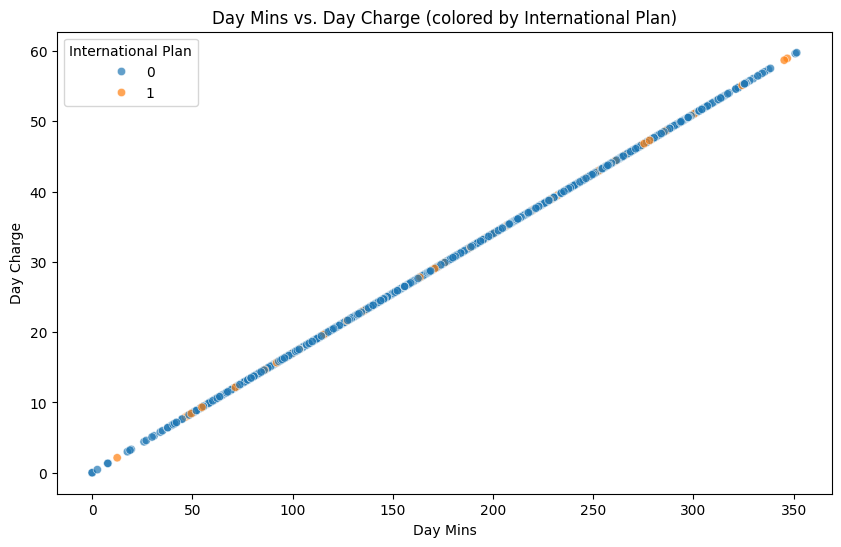

In [34]:
# Scatterplot to examine interaction between Day Mins and Day Charges, separated by International Plan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Day Mins', y='Day Charge', hue='International Plan', alpha=0.7)
plt.title("Day Mins vs. Day Charge (colored by International Plan)")
plt.xlabel("Day Mins")
plt.ylabel("Day Charge")
plt.legend(title="International Plan")
plt.show()


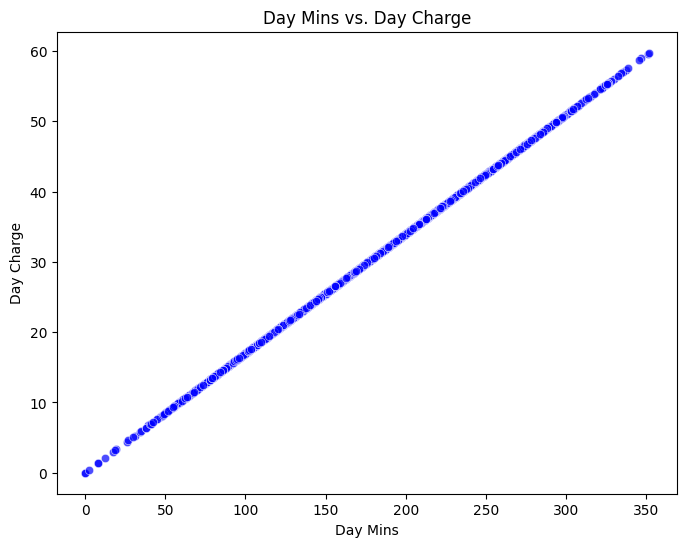

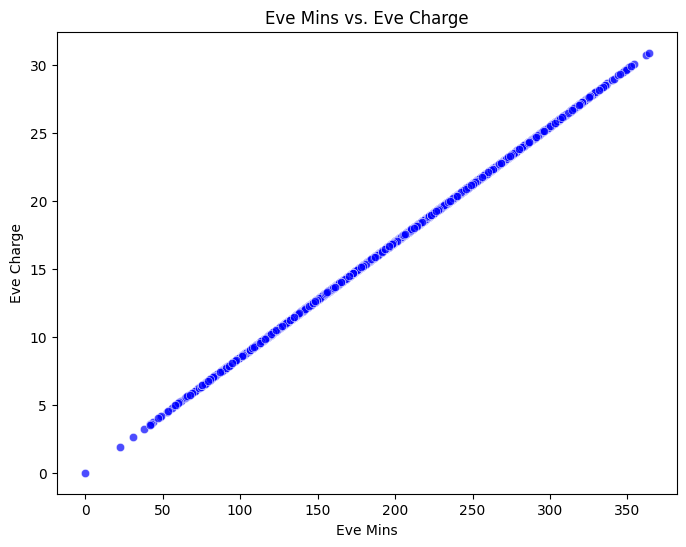

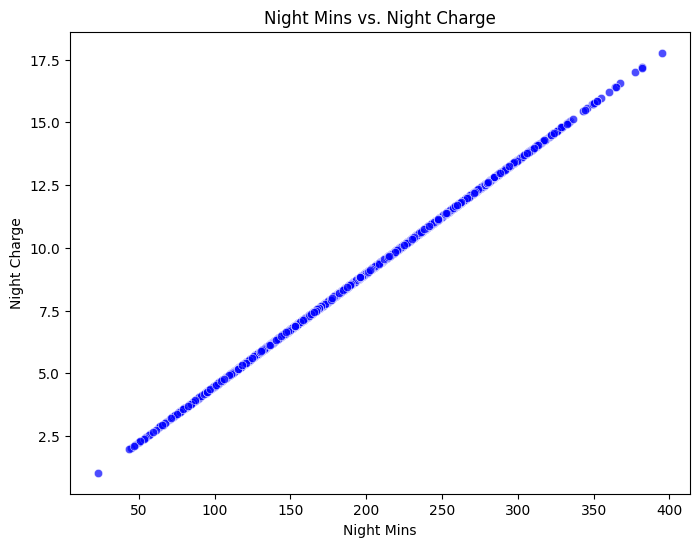

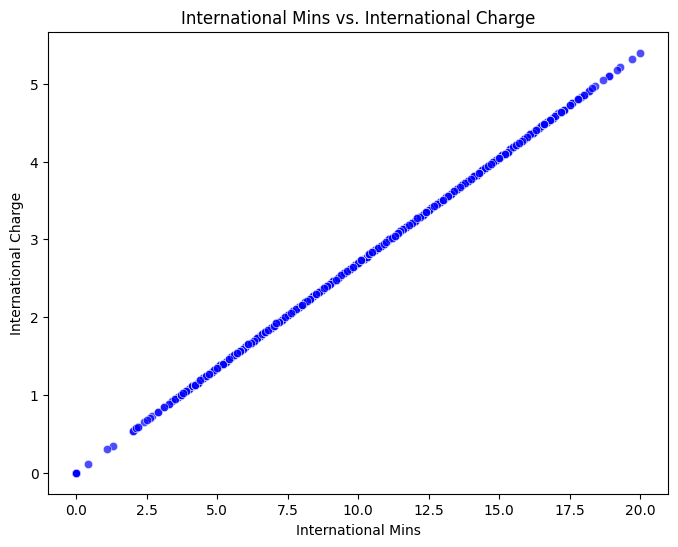

In [35]:
# Define a list of variable pairs with strong correlations
strong_pairs = [
    ('Day Mins', 'Day Charge'),
    ('Eve Mins', 'Eve Charge'),
    ('Night Mins', 'Night Charge'),
    ('International Mins', 'International Charge')
]

# Create scatter plots for each pair
for x, y in strong_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x, y=y, alpha=0.7, color="blue")
    plt.title(f"{x} vs. {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


By going though the data and understanding hoe each column is imapcting the process, I have decided that there is "no need to remove outliers" from any columns.

In [36]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Charge', 'International Mins',
       'International Charge', 'CustServ Calls', 'Chrun'],
      dtype='object')

In [37]:
data = data.rename(columns={'Churn': 'Chrun'})

C:\Users\user\AppData\Local\Temp\ipykernel_11056\1573477109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Chrun', y='Day Mins', palette="coolwarm")


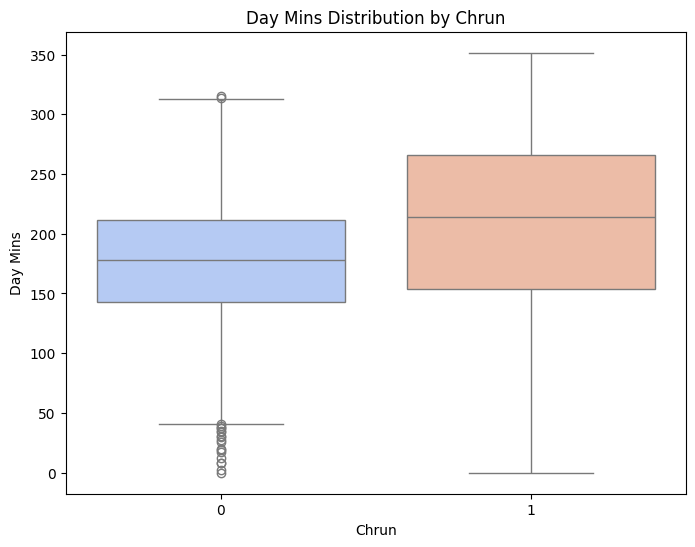

In [38]:
# Boxplot of Day Mins by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Chrun', y='Day Mins', palette="coolwarm")
plt.title("Day Mins Distribution by Chrun")
plt.xlabel("Chrun")
plt.ylabel("Day Mins")
plt.show()


Shapiro-Wilk Test:
The Shapiro-Wilk test is a statistical test used to check whether a sample of data is drawn from a normally distributed population. It tests the null hypothesis:

Null Hypothesis (H₀): The data follows a normal distribution.
Alternative Hypothesis (H₁): The data does not follow a normal distribution.
Steps to Perform Shapiro-Wilk Test:

Compute the test statistic and p-value for each numerical column in the dataset.
Compare the p-value with a significance level (commonly 0.05):
If p-value > 0.05, we fail to reject H₀ (the data is likely normal).
If p-value <= 0.05, we reject H₀ (the data is not normal).

In [39]:
from scipy.stats import shapiro
import pandas as pd
import numpy as np

# Function to perform Shapiro-Wilk test only on numerical columns
def shapiro_test_on_data(data):
    results = []
    for i, column_data in enumerate(data):
        # Check if column data is numeric
        if np.issubdtype(column_data.dtype, np.number):
            # Perform the Shapiro-Wilk test
            test_stat, p_value = shapiro(column_data)
            results.append({
                'Index': i,
                'Shapiro-Wilk Test Statistic': test_stat,
                'p-value': p_value,
                'Result': 'Normal Distribution' if p_value > 0.05 else 'Not Normal Distribution'
            })
        else:
            results.append({
                'Index': i,
                'Shapiro-Wilk Test Statistic': None,
                'p-value': None,
                'Result': 'Non-Numeric Data'
            })

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results)
    return results_df

# Apply the Shapiro-Wilk test
shapiro_results = shapiro_test_on_data(data)

# Display results
print(shapiro_results)


AttributeError: 'str' object has no attribute 'dtype'

In [40]:
from scipy.stats import shapiro
import pandas as pd
import numpy as np

# Function to perform Shapiro-Wilk test only on numerical columns
def shapiro_test_on_data(data):
    results = []
    for column in data.columns:
        # Check if column is numeric
        if np.issubdtype(data[column].dtype, np.number):
            # Perform the Shapiro-Wilk test
            test_stat, p_value = shapiro(data[column])
            results.append({
                'Column': column,
                'Shapiro-Wilk Test Statistic': test_stat,
                'p-value': p_value,
                'Result': 'Normal Distribution' if p_value > 0.05 else 'Not Normal Distribution'
            })
        else:
            results.append({
                'Column': column,
                'Shapiro-Wilk Test Statistic': None,
                'p-value': None,
                'Result': 'Non-Numeric Data'
            })

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results)
    return results_df

# Apply the Shapiro-Wilk test
shapiro_results = shapiro_test_on_data(data)

# Display results
print(shapiro_results)


                  Column  Shapiro-Wilk Test Statistic       p-value  \
0                  State                     0.941728  2.691601e-39   
1         Account Length                     0.998263  5.477851e-05   
2              Area Code                     0.589243  4.148756e-74   
3     International Plan                     0.335452  2.022664e-84   
4               Day Mins                     0.999662  6.625623e-01   
5              Day Calls                     0.998539  3.195091e-04   
6             Day Charge                     0.999663  6.629197e-01   
7               Eve Mins                     0.999593  4.713576e-01   
8              Eve Calls                     0.998979  6.619153e-03   
9             Eve Charge                     0.999592  4.689810e-01   
10            Night Mins                     0.999690  7.398256e-01   
11          Night Charge                     0.999688  7.344695e-01   
12    International Mins                     0.993784  2.902376e-13   
13  In

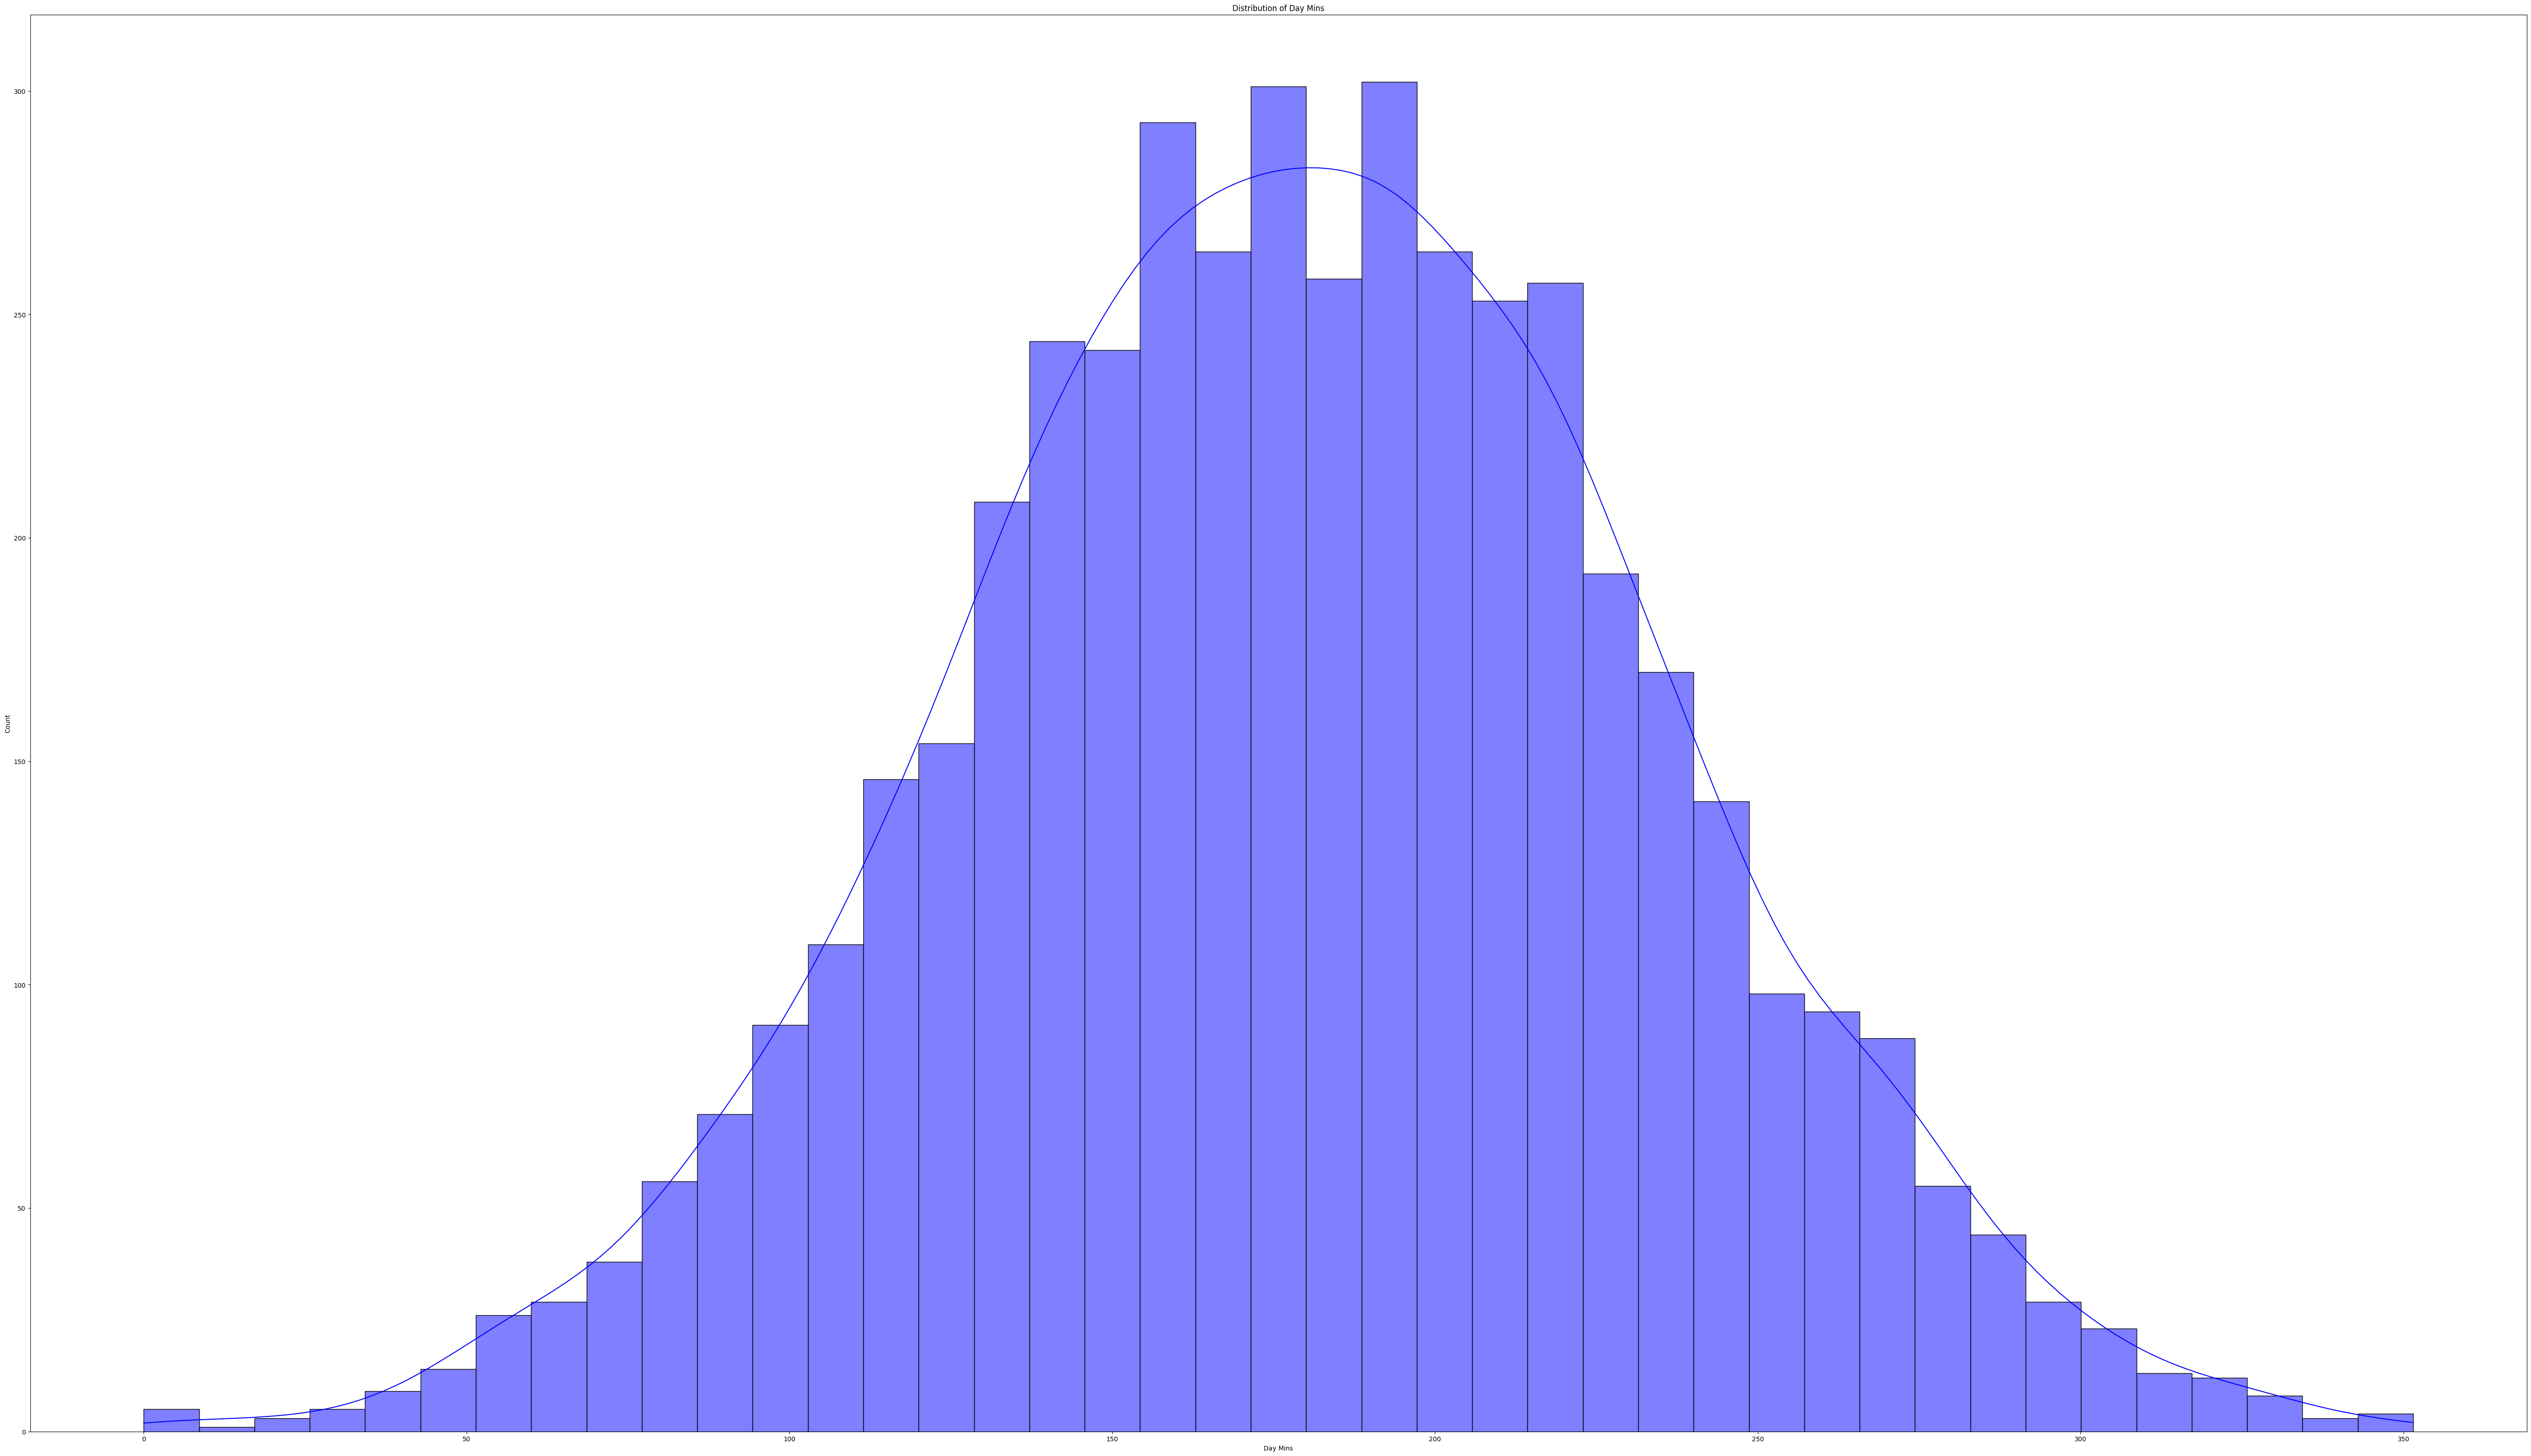

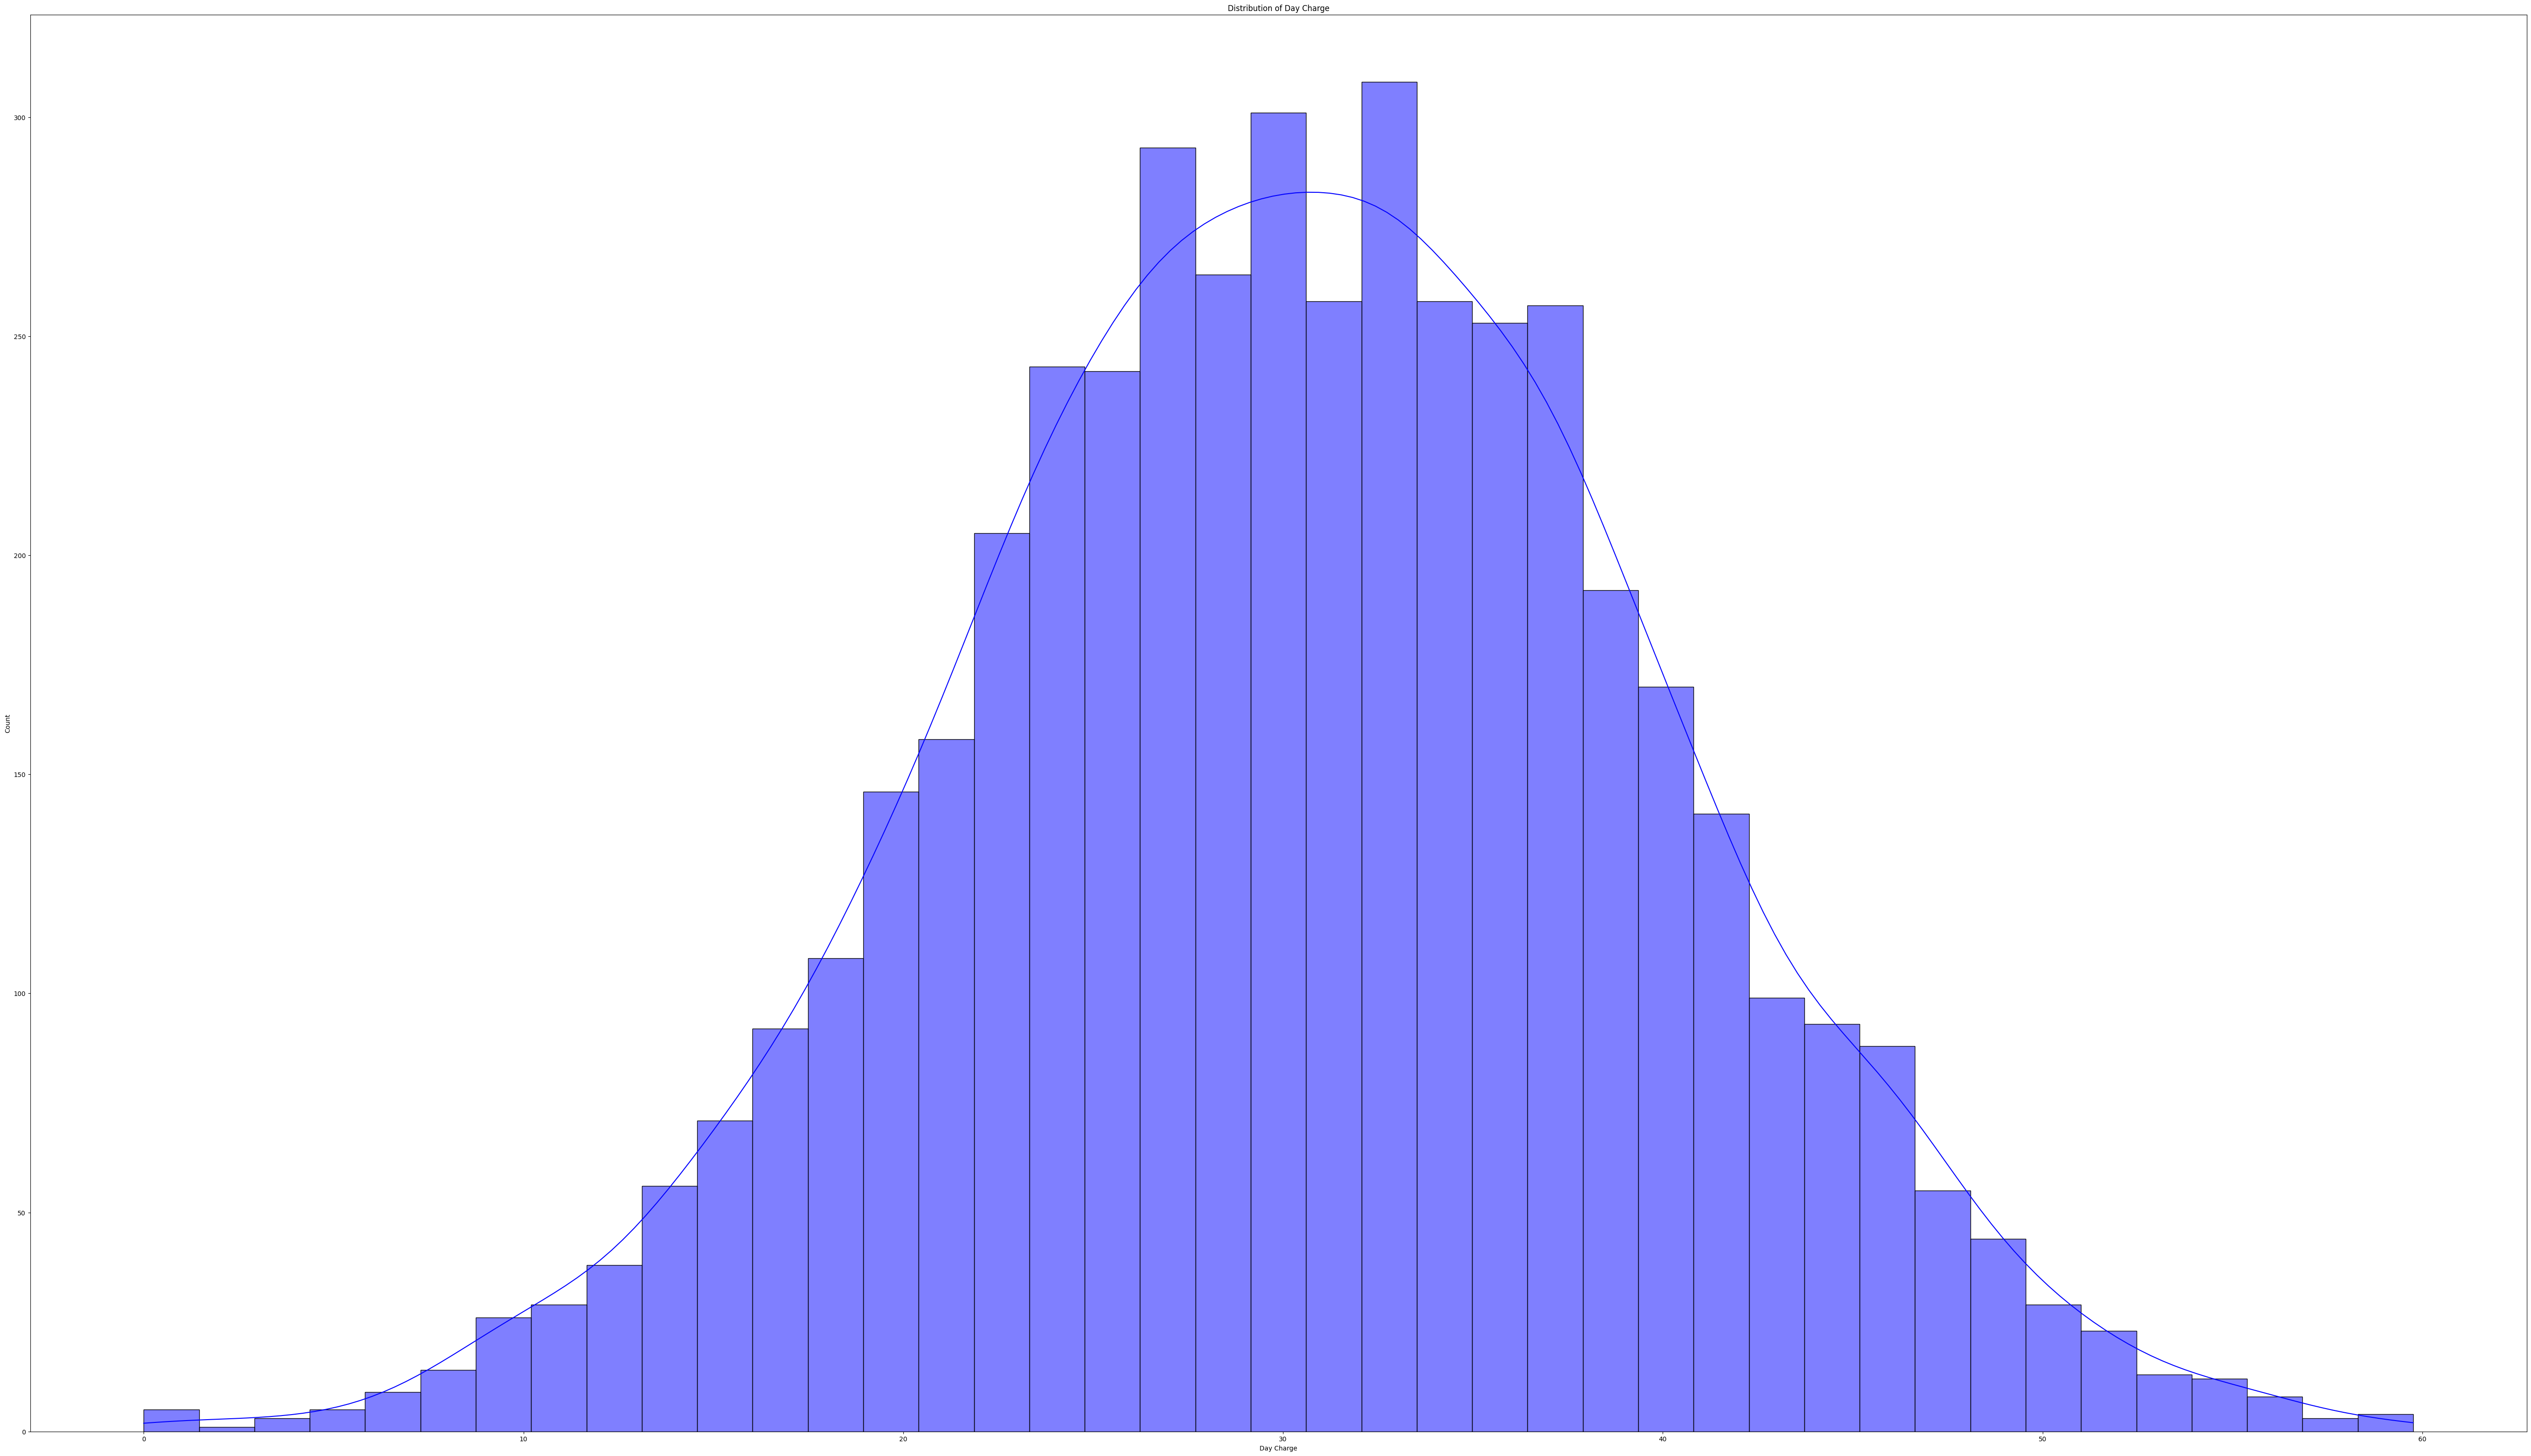

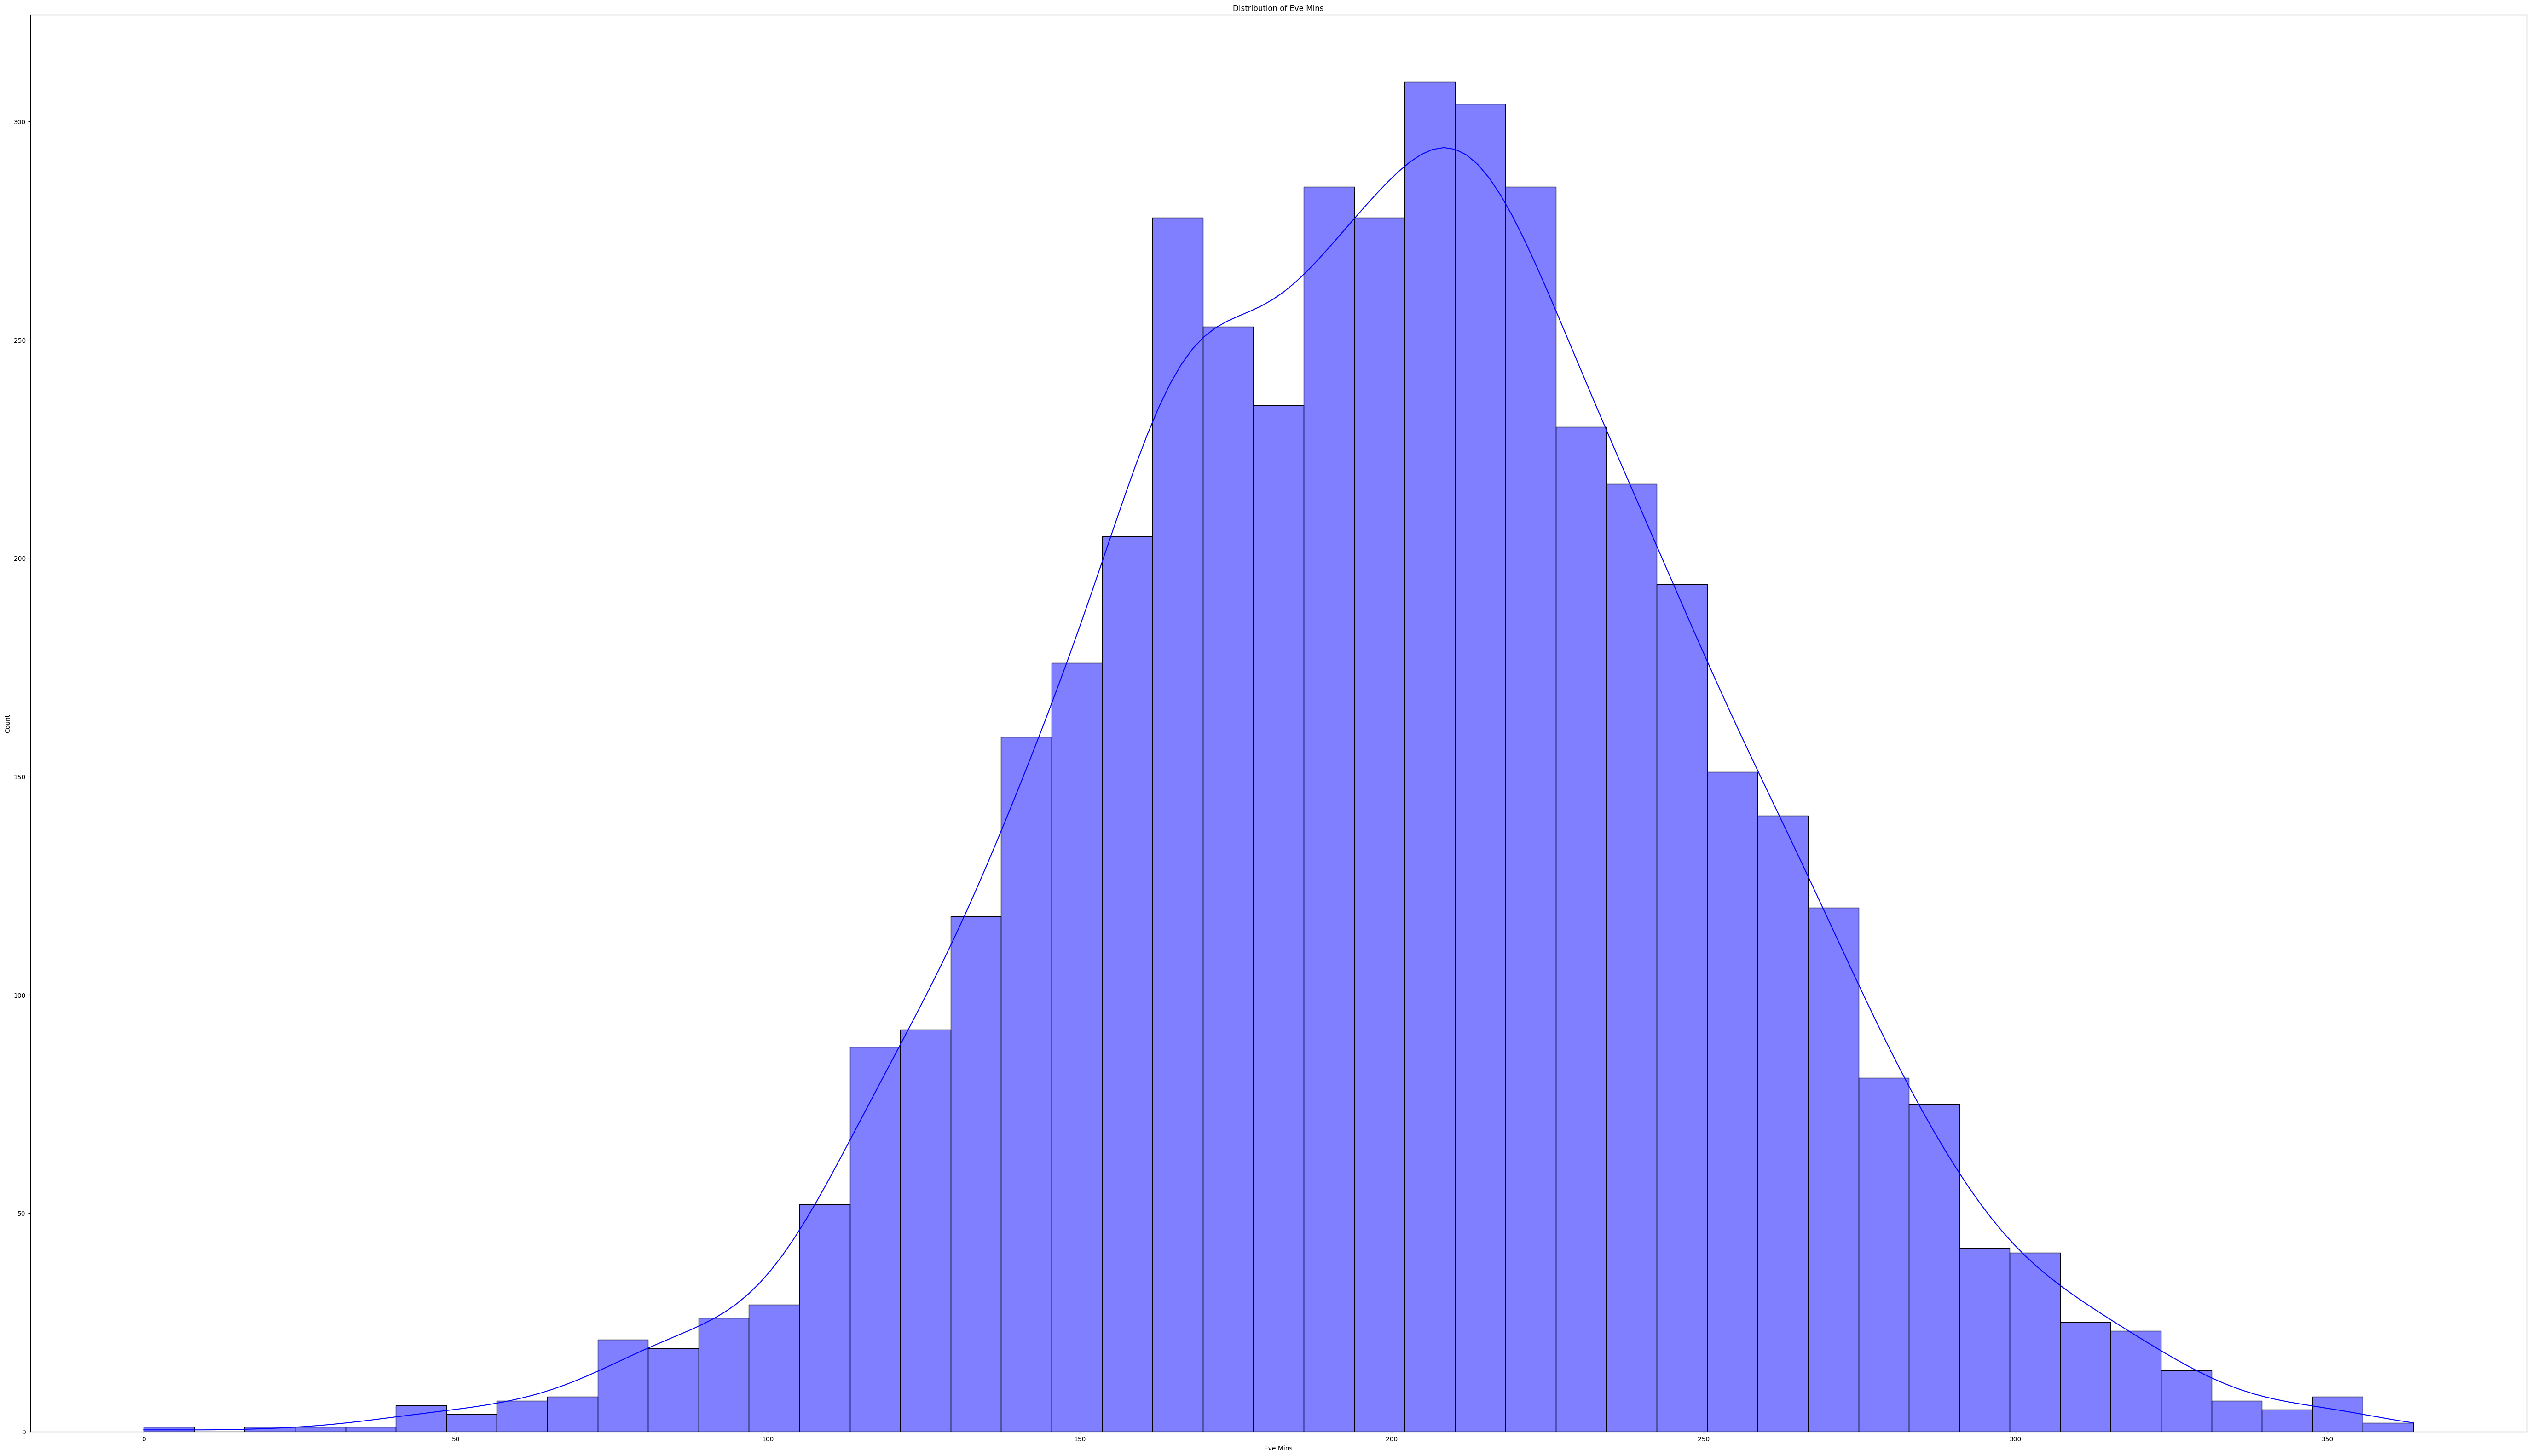

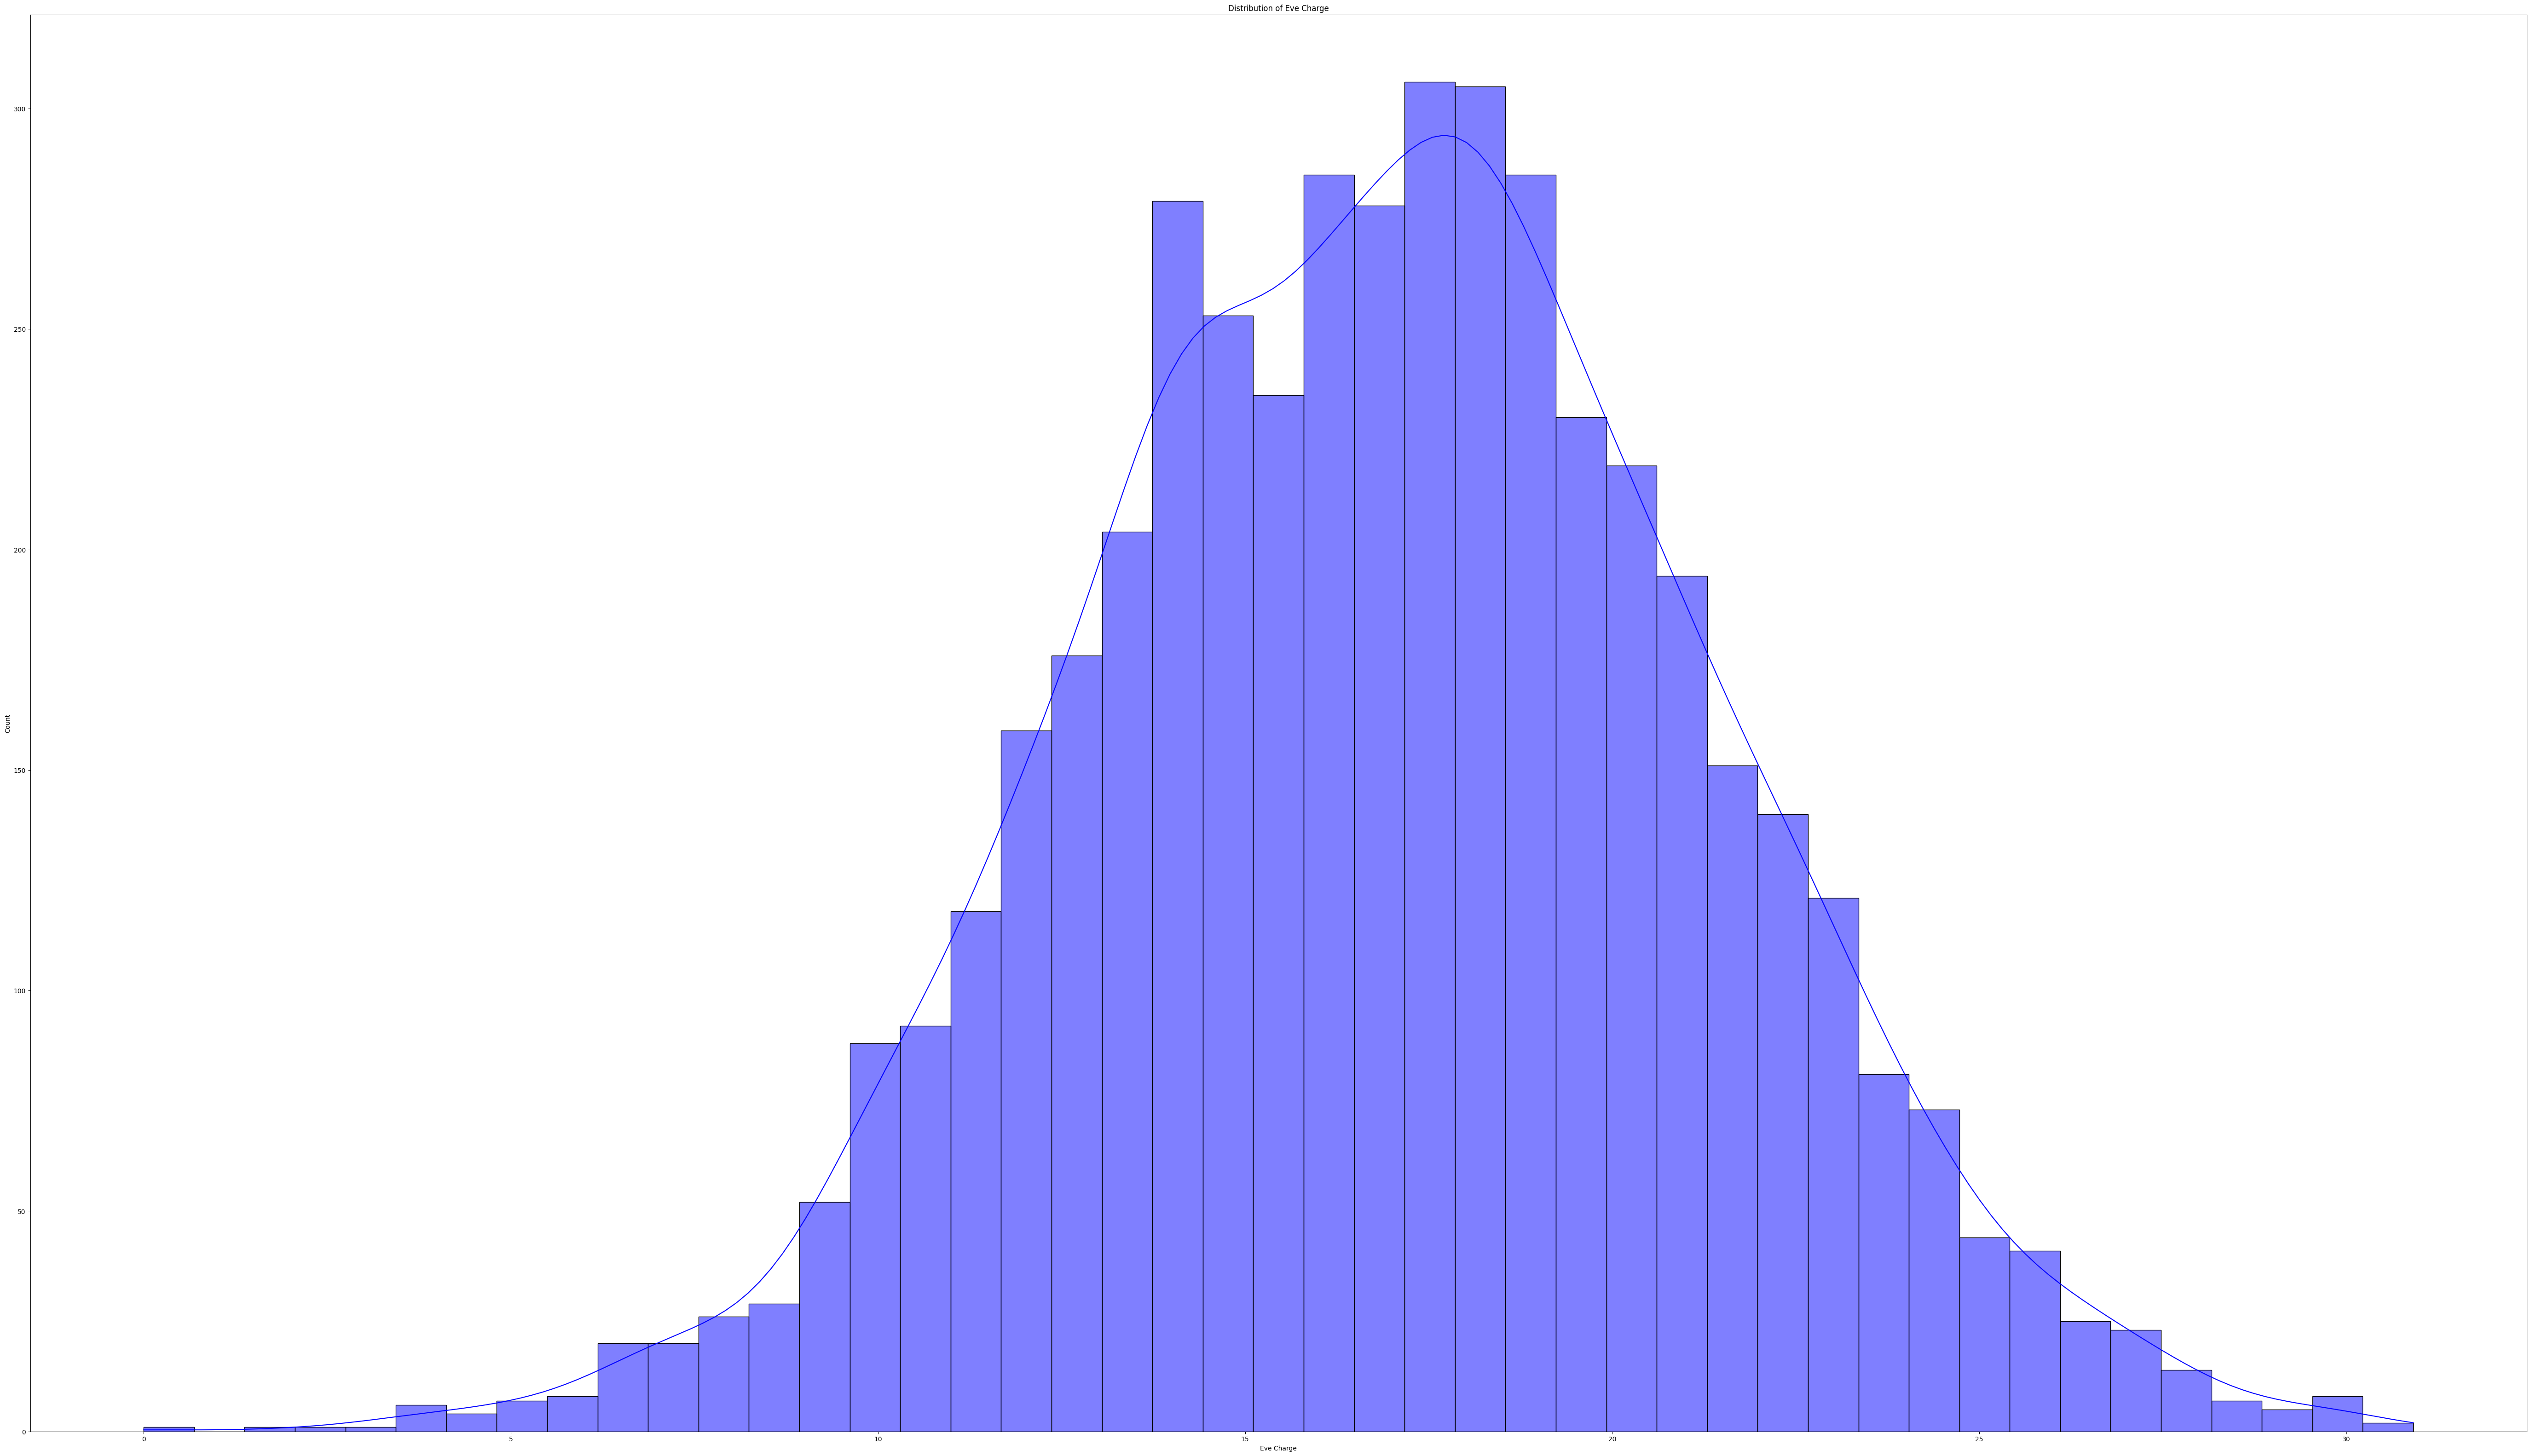

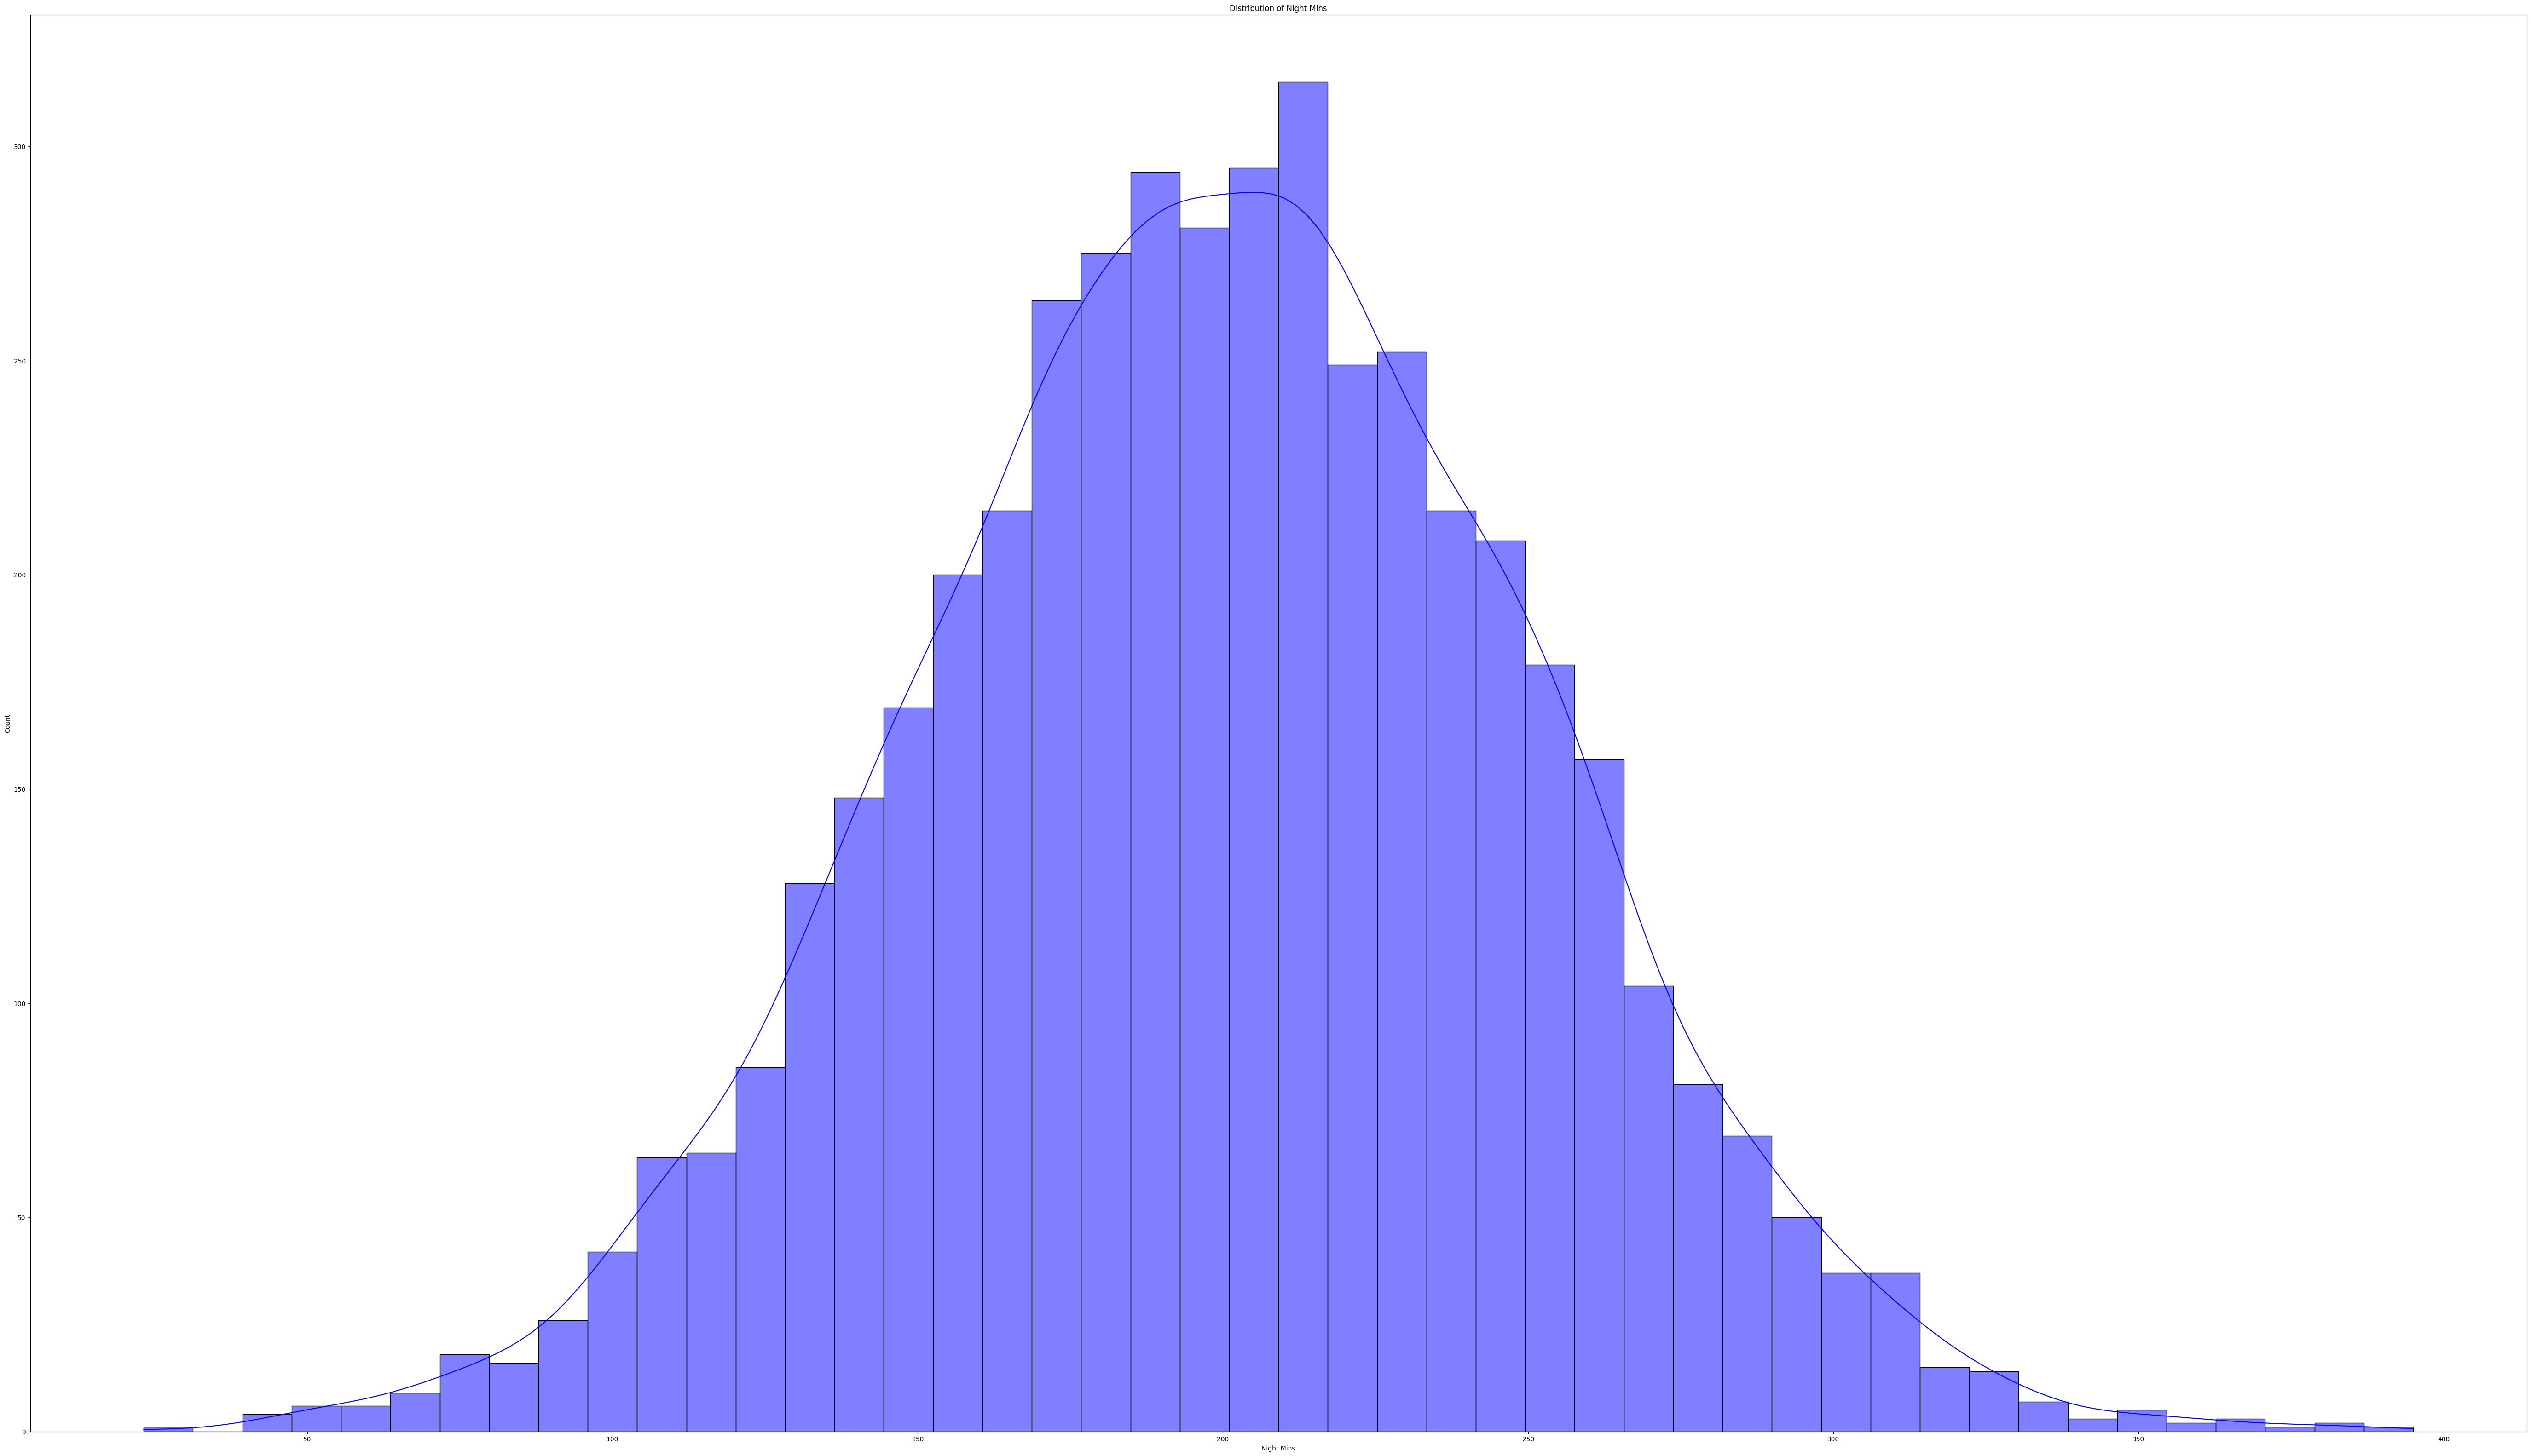

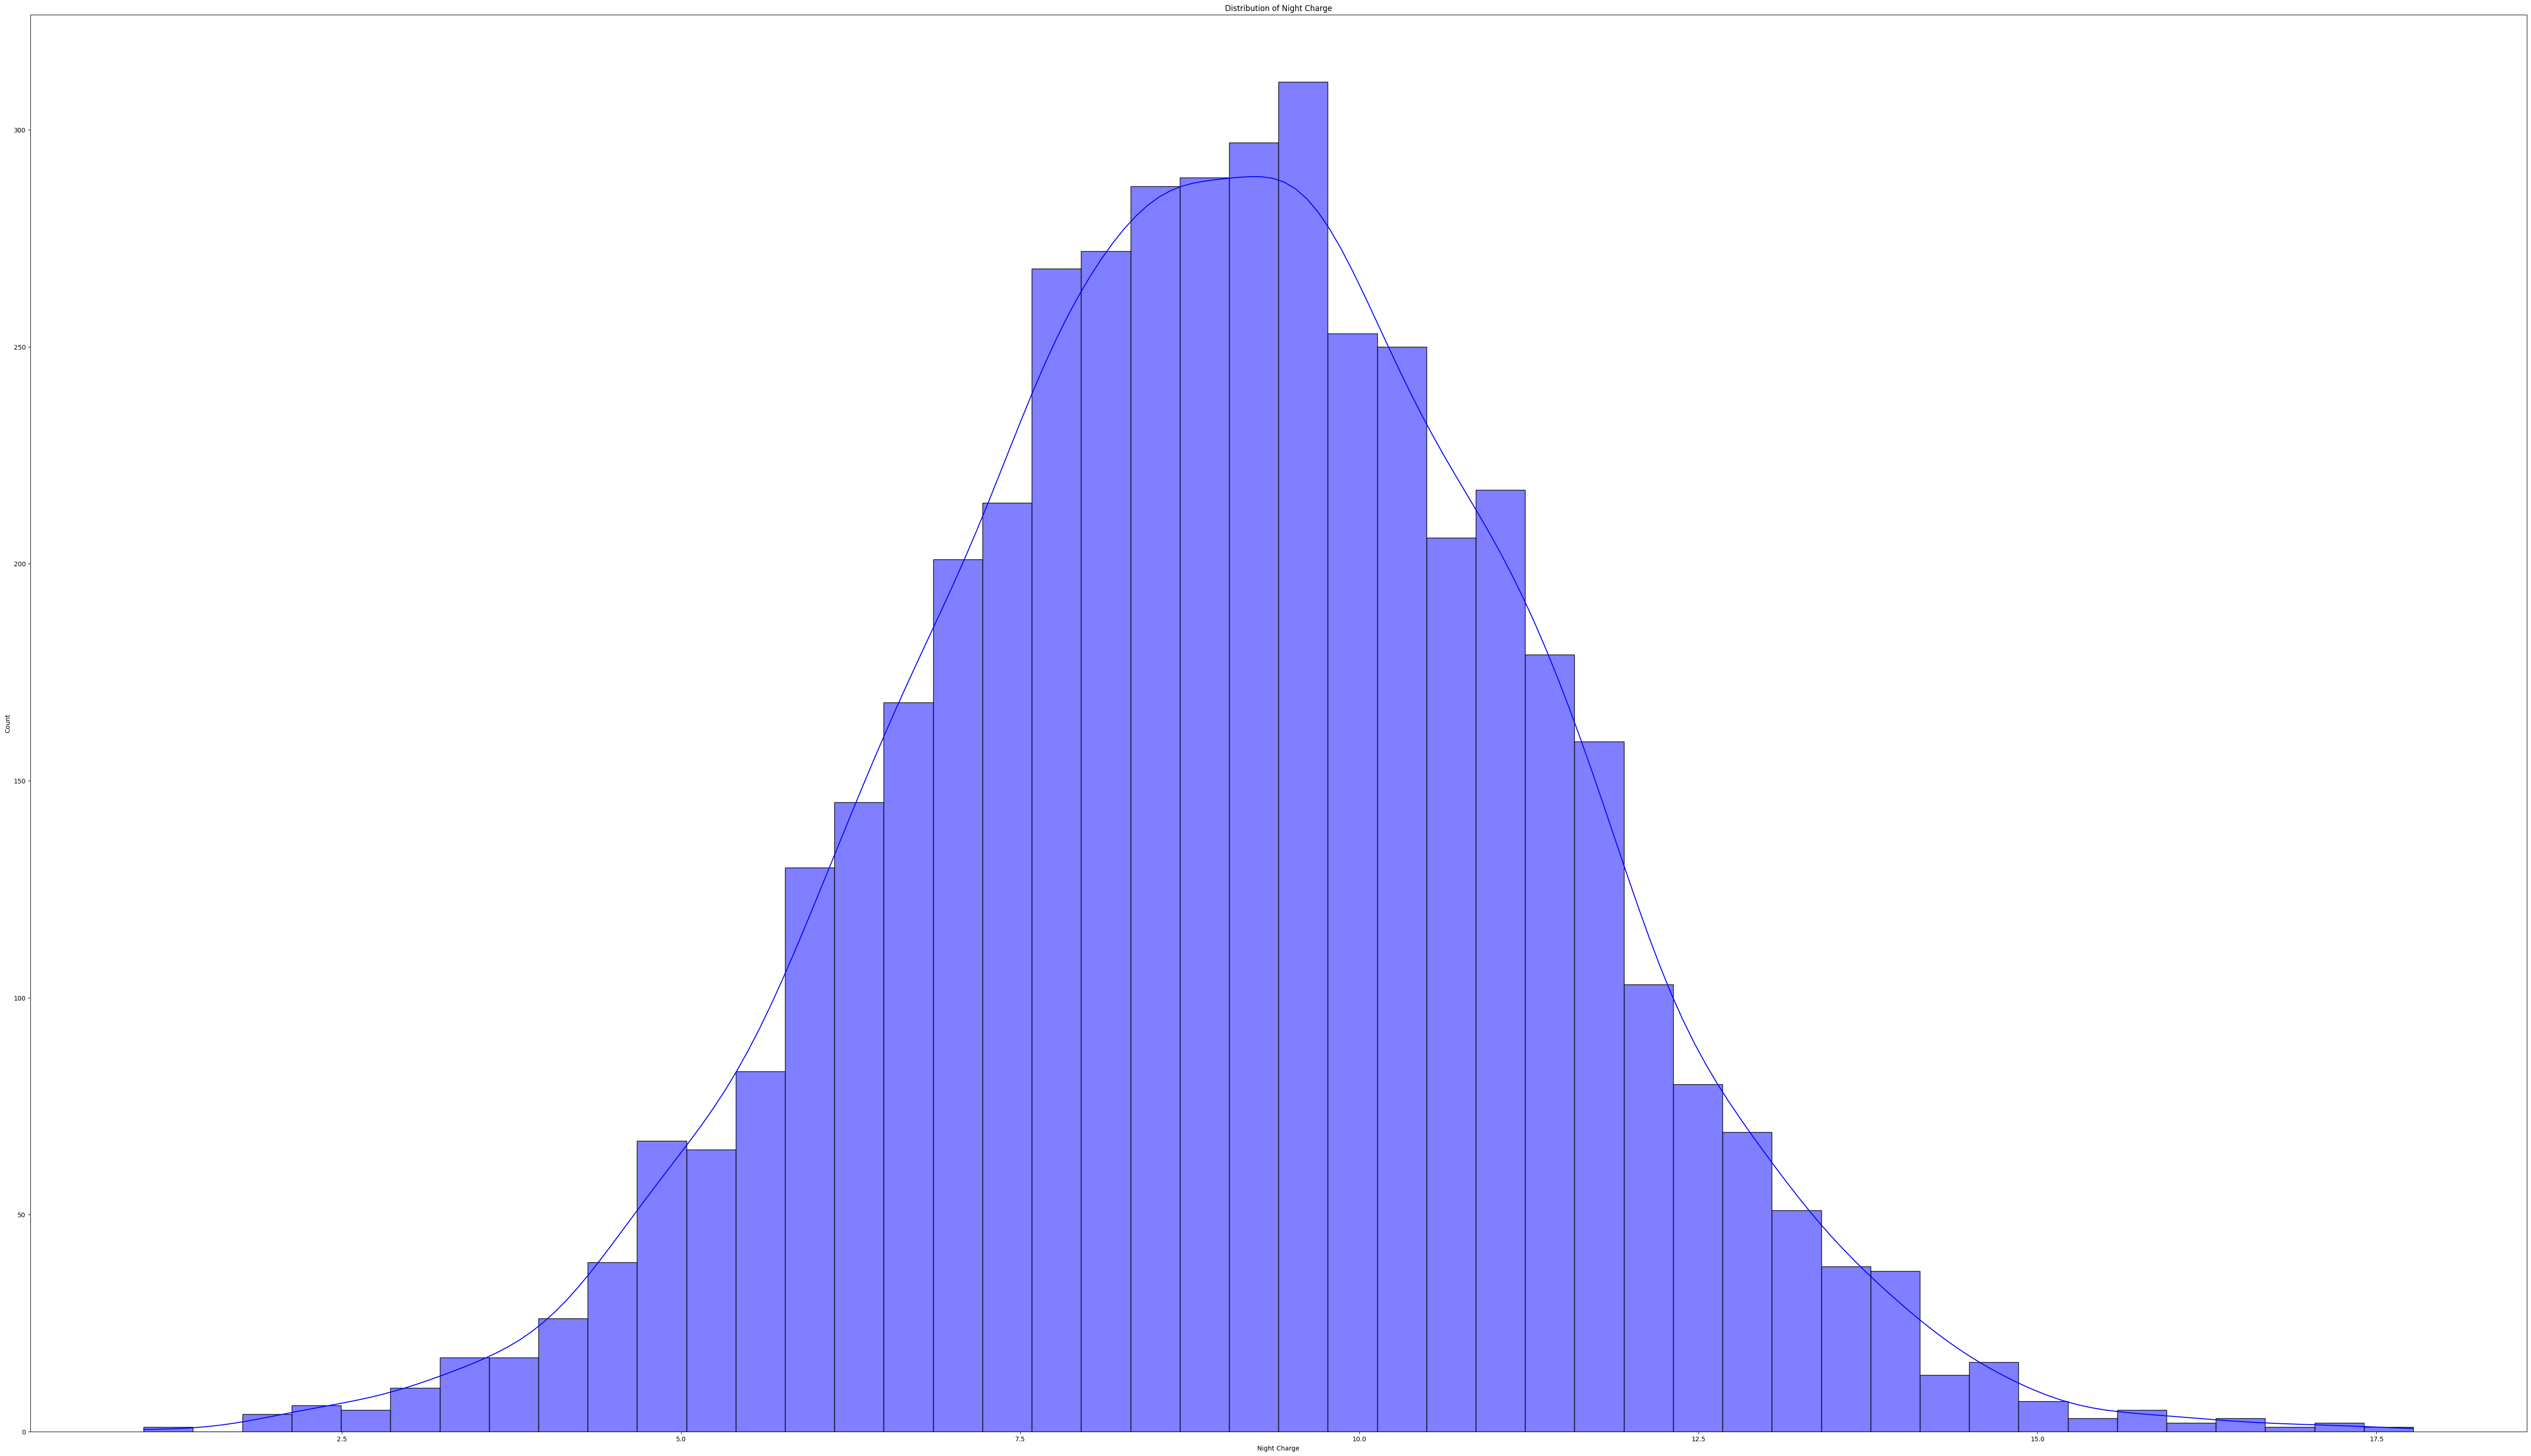

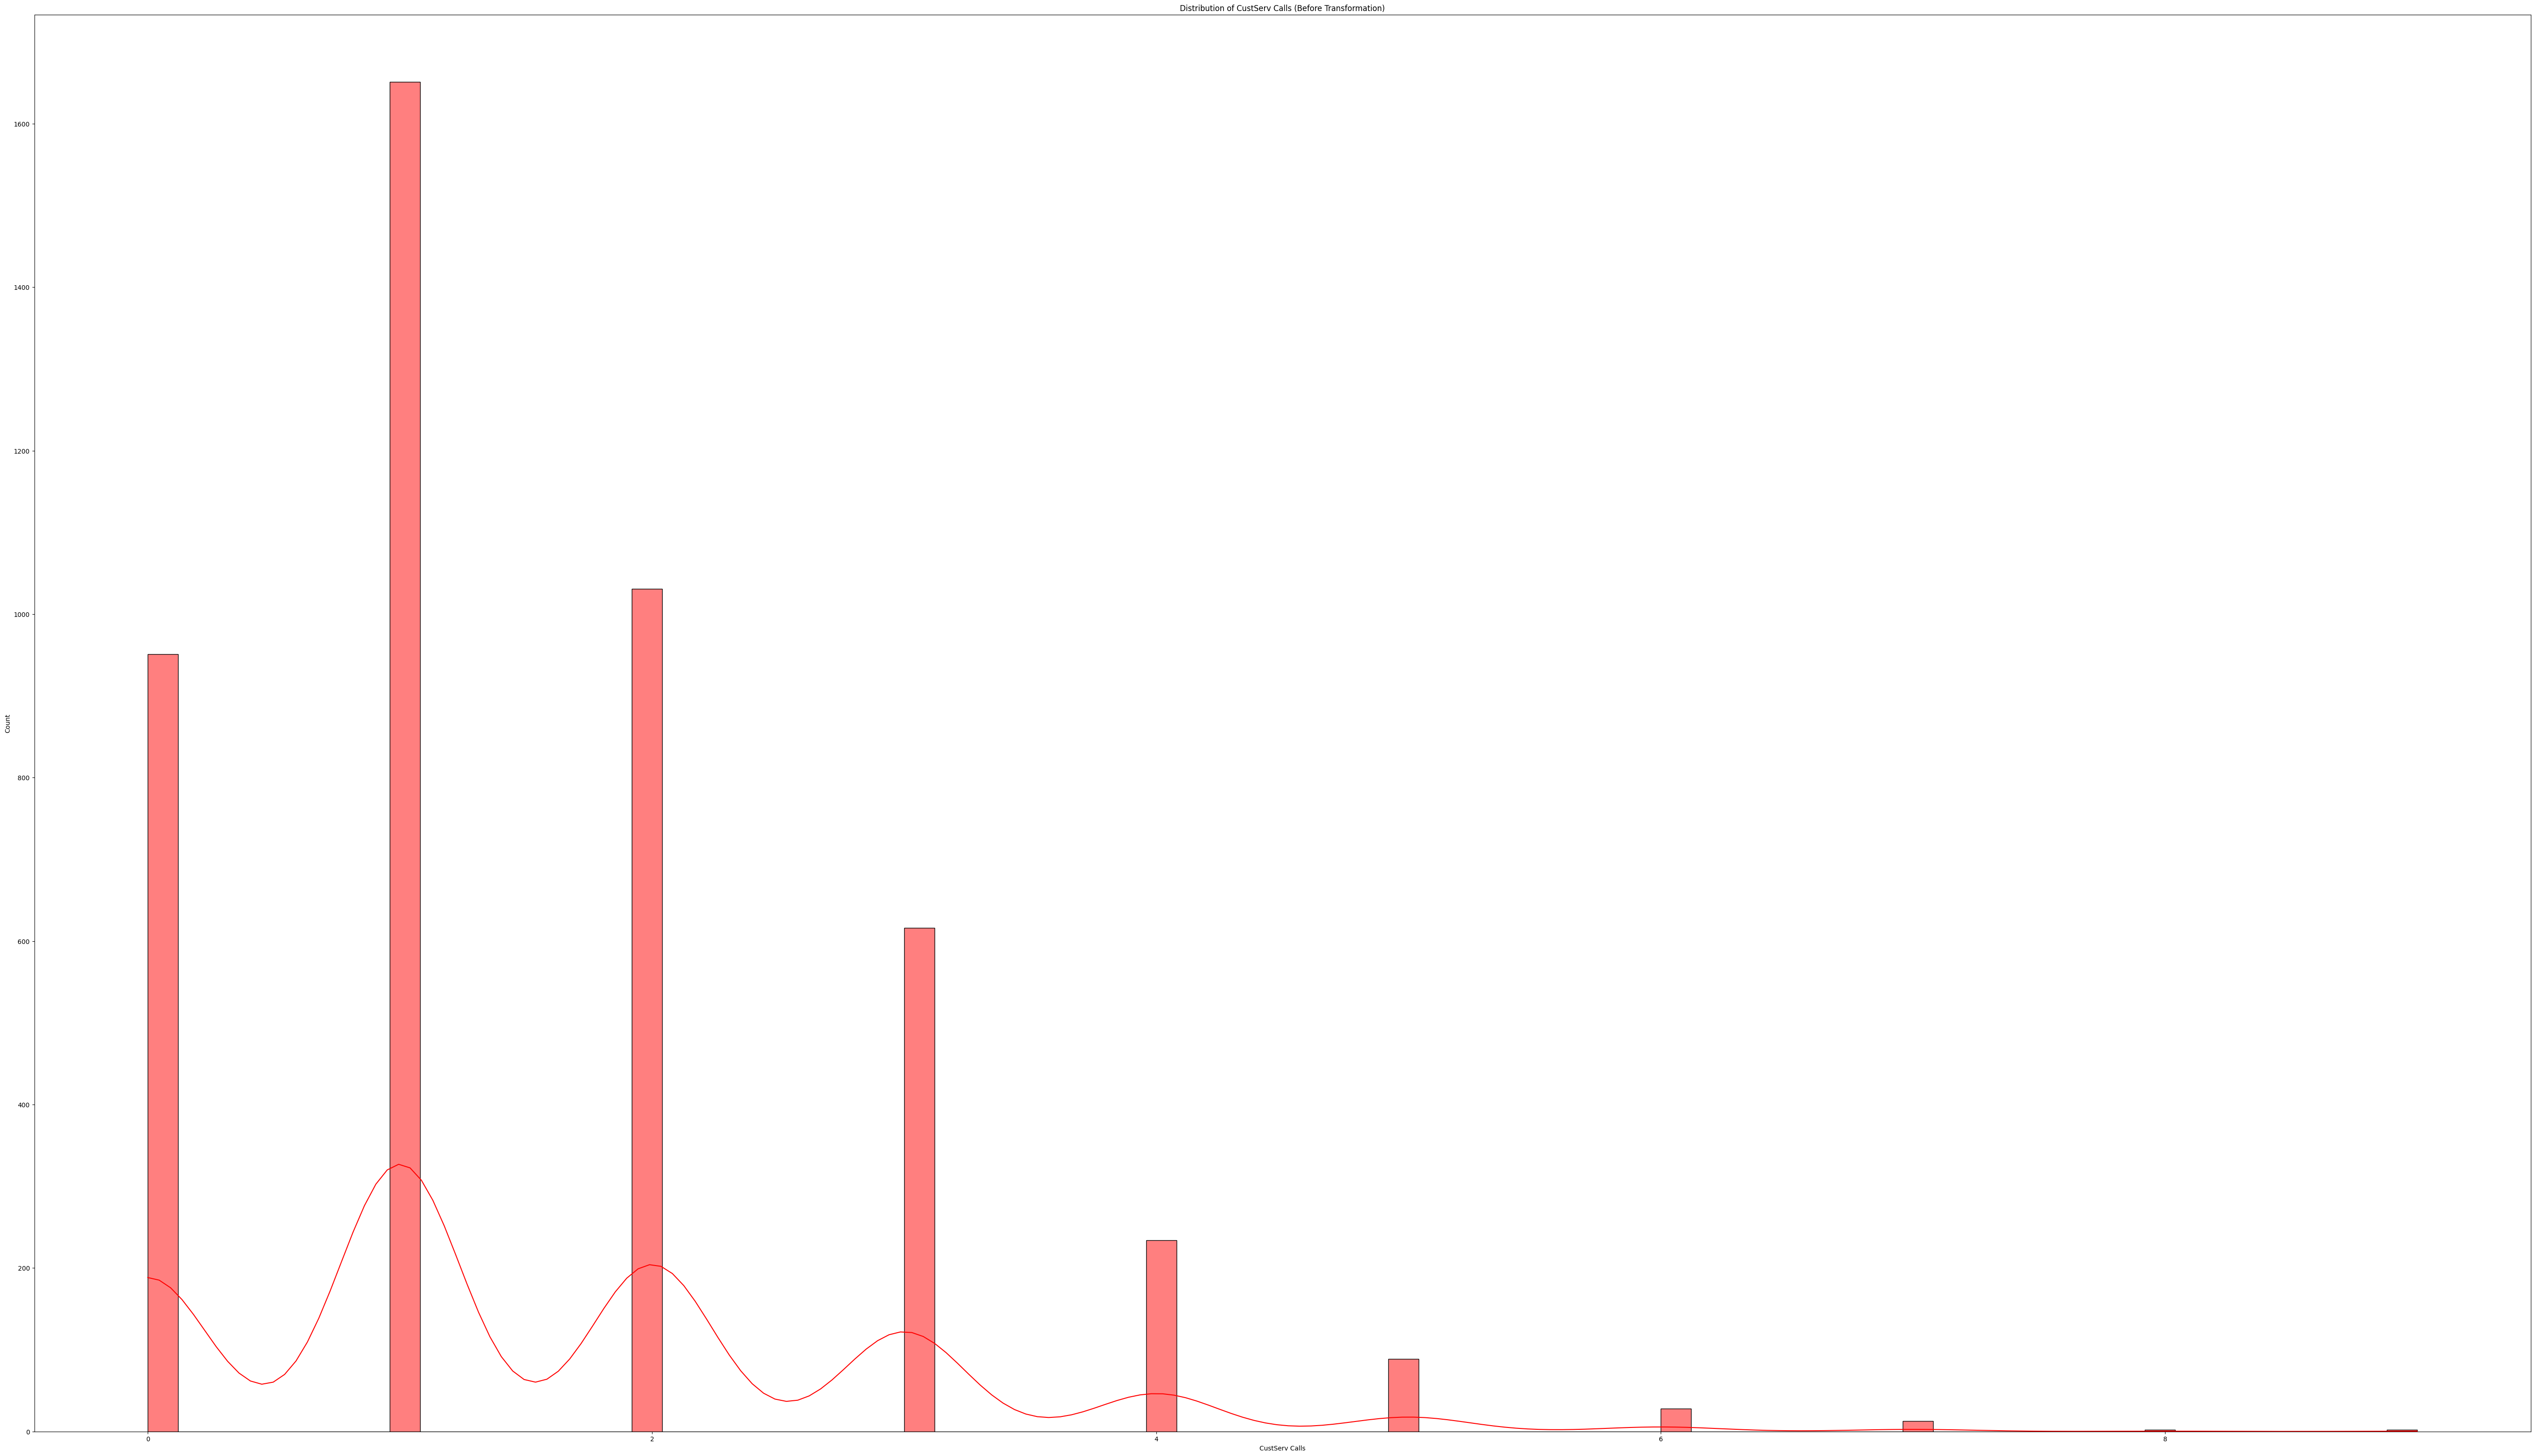

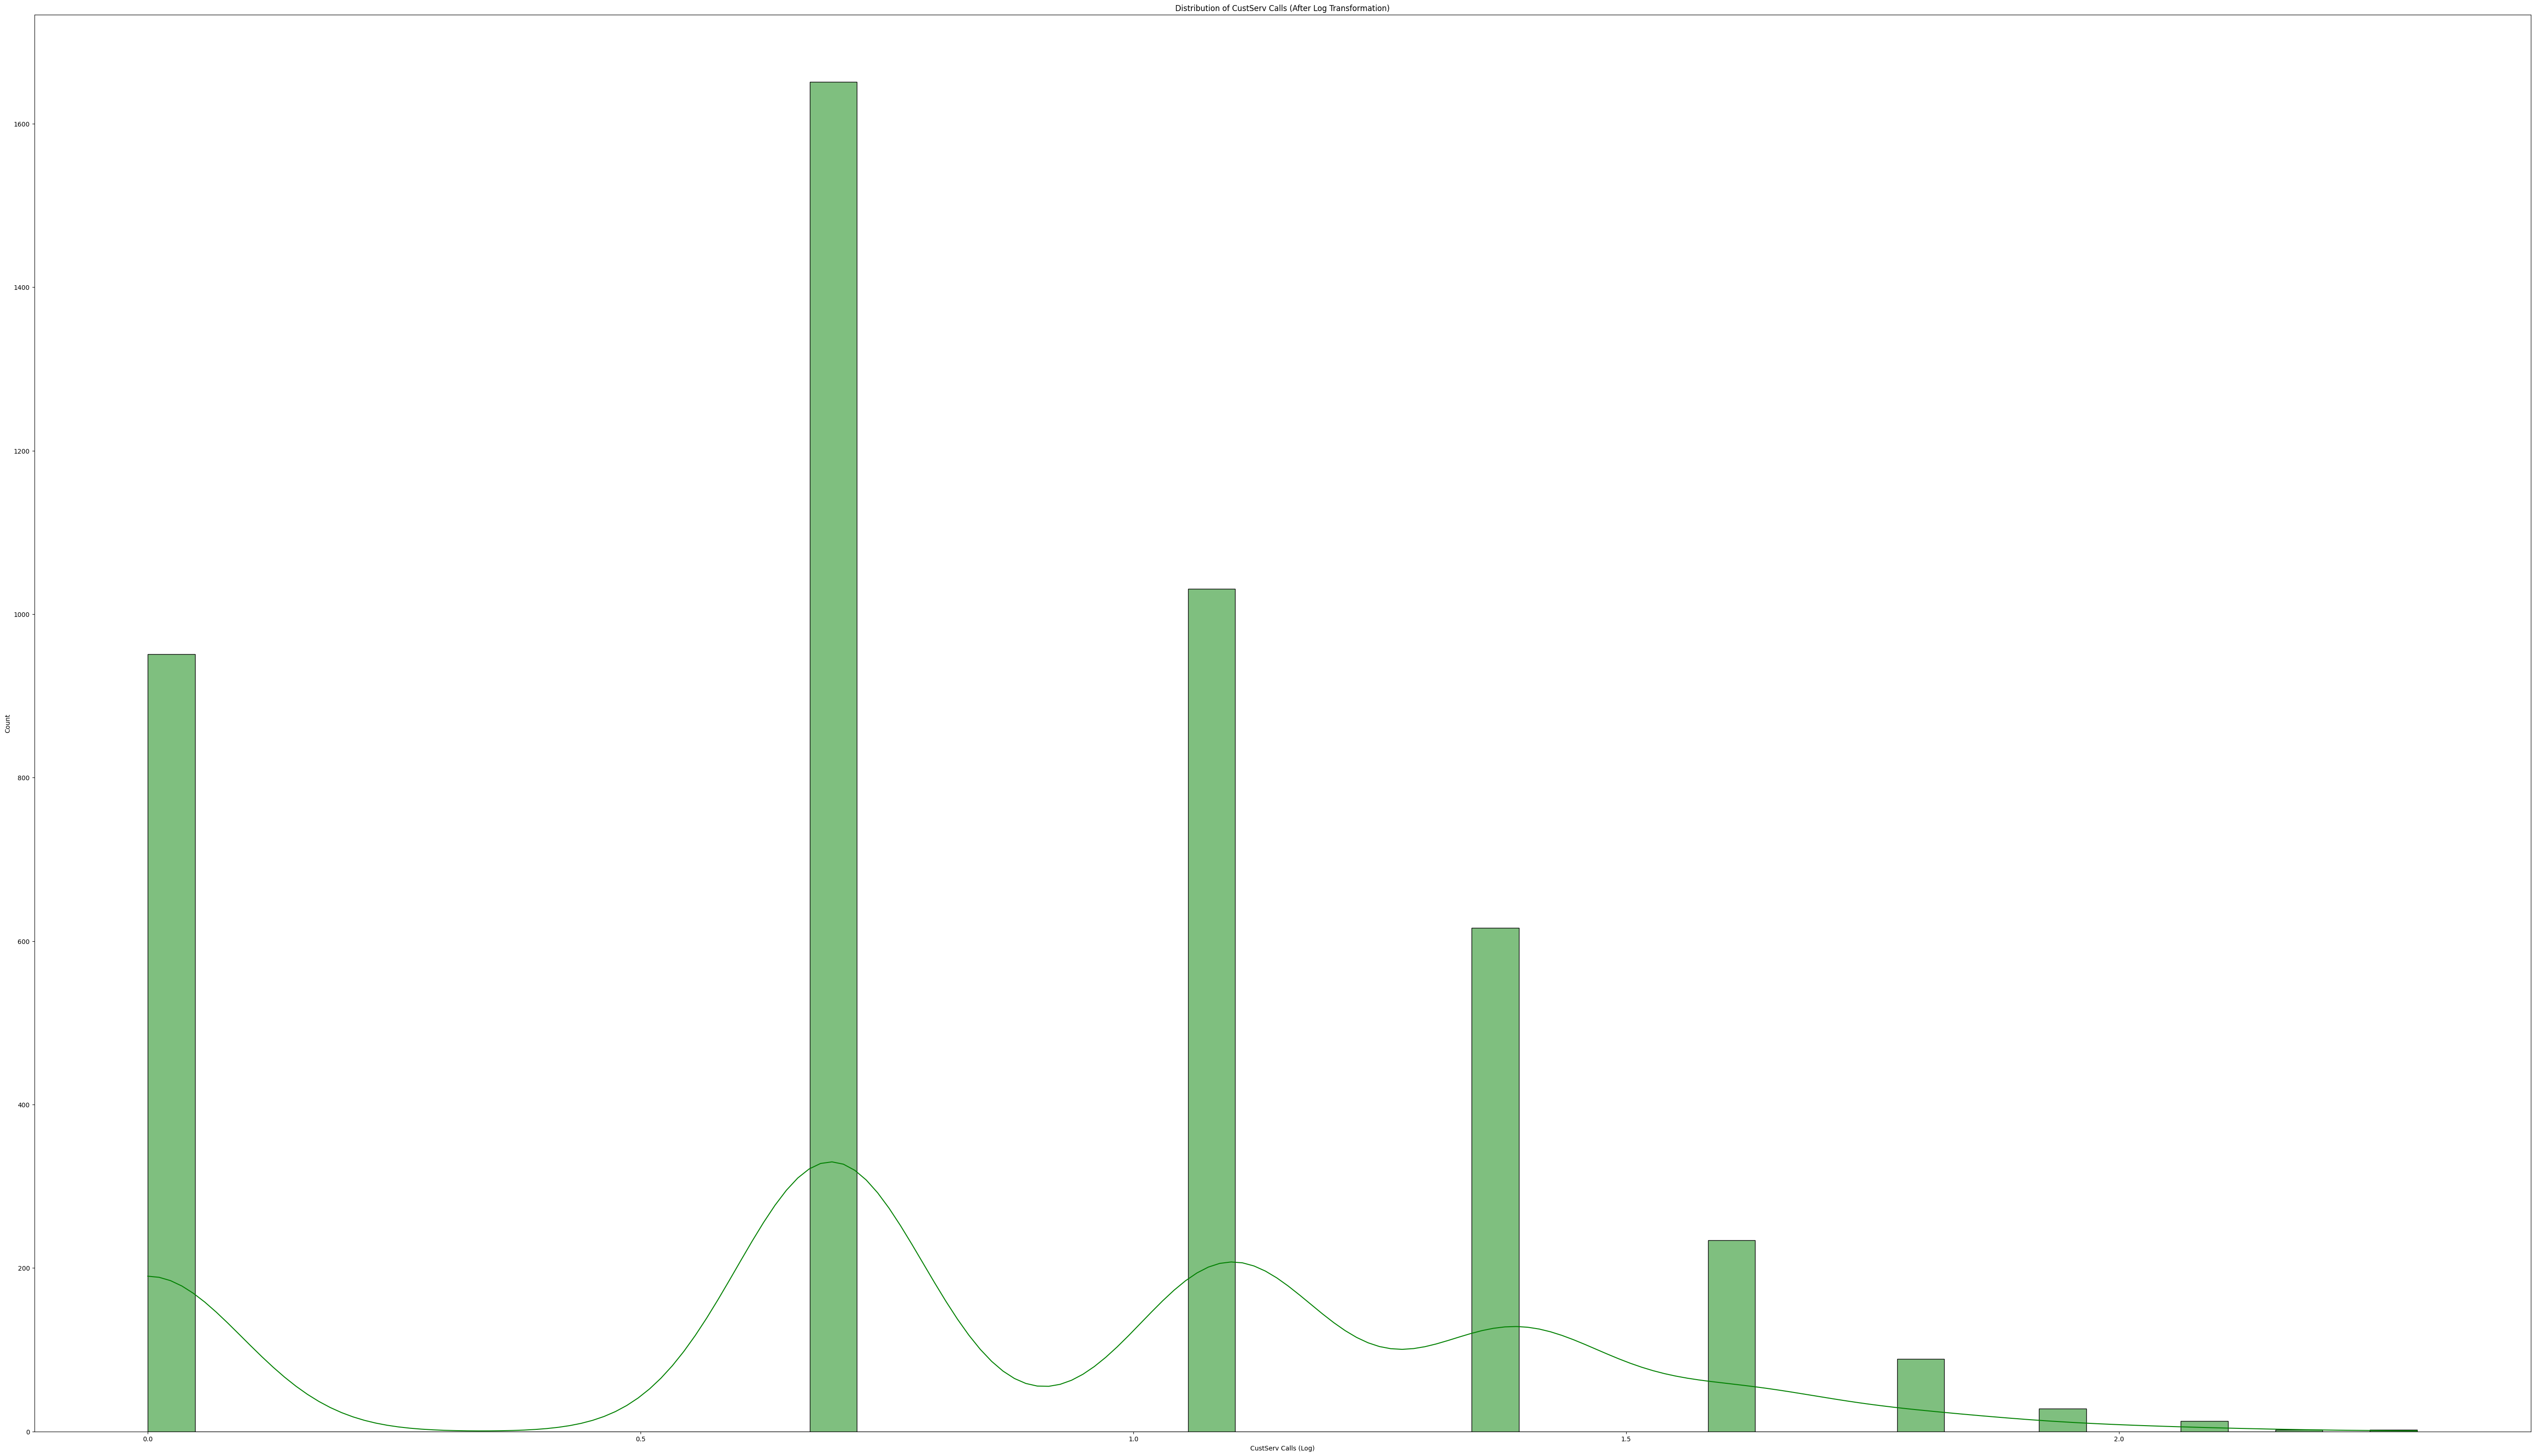

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot normal variables
normal_vars = ['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins', 'Night Charge']
for var in normal_vars:
    sns.histplot(data[var], kde=True, color='blue')
    plt.title(f'Distribution of {var}')
    plt.show()

# Plot non-normal variable (CustServ Calls) before transformation
sns.histplot(data['CustServ Calls'], kde=True, color='red')
plt.title('Distribution of CustServ Calls (Before Transformation)')
plt.show()

# Apply log transformation and plot after transformation
data['CustServ Calls (Log)'] = np.log1p(data['CustServ Calls'])
sns.histplot(data['CustServ Calls (Log)'], kde=True, color='green')
plt.title('Distribution of CustServ Calls (After Log Transformation)')
plt.show()


In [42]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'State': [0.02079272 0.04764999 0.04591726 0.03465454 0.02469136 0.02100931
 0.03638726 0.01581113 0.03227204 0.07710635 0.03898635 0.01407841
 0.05977908 0.04721681 0.04115226 0.02274204 0.01841022 0.0591293
 0.01754386 0.05393112 0.05133203 0.03335499 0.01494477 0.0214425
 0.02317522 0.0212259  0.02252545 0.00953    0.02425818 0.01646091
 0.01776045 0.01472818]
Unique values in column 'Account Length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129 

In [43]:
# Drop the 'CustServ Calls' column
data = data.drop(columns=['CustServ Calls'])

In [44]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Charge', 'International Mins',
       'International Charge', 'Chrun', 'CustServ Calls (Log)'],
      dtype='object')

To verify if your data contains negative values (which would prevent the use of Box-Cox transformation since it only works with positive values), I am checking each column for any negative numbers

In [45]:
# Check for negative values in the dataset
negative_values = data.select_dtypes(include=[np.number]).apply(lambda x: (x < 0).any())

# Display columns with negative values
columns_with_negatives = negative_values[negative_values].index.tolist()

if len(columns_with_negatives) > 0:
    print("Columns with negative values:", columns_with_negatives)
else:
    print("No negative values found in the dataset.")


No negative values found in the dataset.


In [67]:
from scipy.stats import boxcox

# List of columns that need transformation (non-normal distributions)
columns_to_transform = [
    'Account Length', 'Area Code', 'International Plan', 'Day Calls', 
    'Eve Calls', 'International Mins', 'International Charge', 'CustServ Calls (Log)', 'Chrun'
]

# Apply Box-Cox transformation to each column
for col in columns_to_transform:
    # Apply the Box-Cox transformation and replace the original column
    data[col], _ = boxcox(data[col] + 1e-6)  # Adding a small constant to avoid zero values

# Verify if transformation was successful
print("Box-Cox Transformation applied to the following columns:")
print(columns_to_transform)


ValueError: Data must not be constant.

In [46]:
from scipy.stats import boxcox

# List of columns that need transformation (non-normal distributions)
columns_to_transform = [
    'Account Length', 'Area Code', 'International Plan', 'Day Calls', 
    'Eve Calls', 'International Mins', 'International Charge', 'CustServ Calls (Log)', 'Chrun'
]

# Identify and exclude constant columns
non_constant_columns = [col for col in columns_to_transform if data[col].nunique() > 1]

# Apply Box-Cox transformation to each non-constant column
for col in non_constant_columns:
    # Apply the Box-Cox transformation and replace the original column
    data[col], _ = boxcox(data[col] + 1e-6)  # Adding a small constant to avoid zero values

# Verify which columns were transformed
print("Box-Cox Transformation applied to the following non-constant columns:")
print(non_constant_columns)


Box-Cox Transformation applied to the following non-constant columns:
['Account Length', 'Area Code', 'International Plan', 'Day Calls', 'Eve Calls', 'International Mins', 'International Charge', 'CustServ Calls (Log)', 'Chrun']


The Yeo-Johnson transformation is similar to the Box-Cox transformation but can handle both positive and negative values. It’s a great alternative when your dataset contains zero or negative values.

In [47]:
from sklearn.preprocessing import PowerTransformer

# List of columns that need transformation (non-normal distributions)
columns_to_transform = [
    'Account Length', 'Area Code', 'International Plan', 'Day Calls', 
    'Eve Calls', 'International Mins', 'International Charge', 'CustServ Calls (Log)', 'Chrun'
]

# Initialize the PowerTransformer for Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation to each column
for col in columns_to_transform:
    # Reshape the data to 2D as required by PowerTransformer
    data[col] = pt.fit_transform(data[[col]])

# Verify which columns were transformed
print("Yeo-Johnson Transformation applied to the following columns:")
print(columns_to_transform)


Yeo-Johnson Transformation applied to the following columns:
['Account Length', 'Area Code', 'International Plan', 'Day Calls', 'Eve Calls', 'International Mins', 'International Charge', 'CustServ Calls (Log)', 'Chrun']


In [73]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Splitting the data
X = data.drop(columns=['Chrun'])  # Feature columns
y = data['Chrun']  # Target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dictionary to store model results
model_results = {}

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_results['Logistic Regression'] = {
    'roc_auc': roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
model_results['Random Forest'] = {
    'roc_auc': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Gradient Boosting (XGBoost)
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
model_results['Gradient Boosting'] = {
    'roc_auc': roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Support Vector Machine
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
model_results['SVM'] = {
    'roc_auc': roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Display results
for model, metrics in model_results.items():
    print(f"Model: {model}")
    print(f"ROC AUC: {metrics['roc_auc']}")
    print(f"Classification Report:\n{metrics['classification_report']}")
    print("-" * 50)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [48]:
print(data['Chrun'].value_counts())


Chrun
-0.406958    3961
 2.457257     656
Name: count, dtype: int64


In [49]:
# Convert Chrun to binary using a threshold
data['Chrun'] = (data['Chrun'] > 0.5).astype(int)

# Verify
print(data['Chrun'].value_counts())


Chrun
0    3961
1     656
Name: count, dtype: int64


In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Splitting the data
X = data.drop(columns=['Chrun'])  # Feature columns
y = data['Chrun']  # Target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dictionary to store model results
model_results = {}

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_results['Logistic Regression'] = {
    'roc_auc': roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
model_results['Random Forest'] = {
    'roc_auc': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Gradient Boosting (XGBoost)
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
model_results['Gradient Boosting'] = {
    'roc_auc': roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Support Vector Machine
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
model_results['SVM'] = {
    'roc_auc': roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Display results
for model, metrics in model_results.items():
    print(f"Model: {model}")
    print(f"ROC AUC: {metrics['roc_auc']}")
    print(f"Classification Report:\n{metrics['classification_report']}")
    print("-" * 50)


Model: Logistic Regression
ROC AUC: 0.780628206732574
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       793
           1       0.43      0.10      0.16       131

    accuracy                           0.85       924
   macro avg       0.65      0.54      0.54       924
weighted avg       0.81      0.85      0.81       924

--------------------------------------------------
Model: Random Forest
ROC AUC: 0.8921190185112098
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       793
           1       0.76      0.60      0.67       131

    accuracy                           0.92       924
   macro avg       0.85      0.78      0.81       924
weighted avg       0.91      0.92      0.91       924

--------------------------------------------------
Model: Gradient Boosting
ROC AUC: 0.8818815398092082
Classification Report:
              preci

c:\Users\user\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Define CatBoost model with initial parameters
catboost_model = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.03, 
    depth=6, 
    loss_function='Logloss', 
    eval_metric='AUC',
    class_weights=[1, 6],  # Adjusted for imbalance
    verbose=100
)

# Train the model
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Predictions
y_pred_catboost = catboost_model.predict(X_test)
y_pred_proba_catboost = catboost_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_catboost))
print("Classification Report:")
print(classification_report(y_test, y_pred_catboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost))


0:	test: 0.8333317	best: 0.8333317 (0)	total: 163ms	remaining: 2m 42s
100:	test: 0.8845239	best: 0.8873444 (65)	total: 1.98s	remaining: 17.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8888268533
bestIteration = 124

Shrink model to first 125 iterations.
ROC AUC: 0.8888268532868708
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       793
           1       0.50      0.84      0.63       131

    accuracy                           0.86       924
   macro avg       0.74      0.85      0.77       924
weighted avg       0.90      0.86      0.87       924

Confusion Matrix:
[[683 110]
 [ 21 110]]


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Grid search
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_rf.fit(X_train, y_train)

# Best Random Forest Model
best_rf_model = grid_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Random Forest Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
ROC AUC: 0.8871711444605951
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       793
           1       0.74      0.58      0.65       131

    accuracy                           0.91       924
   macro avg       0.84      0.77      0.80       924
weighted avg       0.91      0.91      0.91       924

Confusion Matrix:
[[766  27]
 [ 55  76]]


In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'scale_pos_weight': [1, 6, 10]  # Based on imbalance ratio
}

# Random search
grid_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False),
    param_distributions=param_grid_xgb,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    n_iter=20
)

# Fit the model
grid_xgb.fit(X_train, y_train)

# Best XGBoost Model
best_xgb_model = grid_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\user\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [19:24:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Parameters: {'scale_pos_weight': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}
ROC AUC: 0.8926147685376818
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       793
           1       0.76      0.56      0.64       131

    accuracy                           0.91       924
   macro avg       0.85      0.76      0.80       924
weighted avg       0.91      0.91      0.91       924

Confusion Matrix:
[[770  23]
 [ 58  73]]


In [54]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import numpy as np

# Assuming X_train, X_test, y_train, y_test are pre-defined datasets

# Define base models
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

catboost_model = CatBoostClassifier(iterations=125, depth=5, learning_rate=0.1, verbose=0)
xgboost_model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.01, scale_pos_weight=1)
random_forest_model = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=5, class_weight='balanced_subsample')

# Define the meta-model
meta_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create the Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgboost', xgboost_model),
        ('random_forest', random_forest_model),
    ],
    final_estimator=meta_model,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# Evaluate the Stacking Ensemble
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Stacking Ensemble ROC AUC: {roc_auc}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Stacking Ensemble ROC AUC: 0.8856309502035944
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       793
           1       0.75      0.61      0.68       131

    accuracy                           0.92       924
   macro avg       0.85      0.79      0.81       924
weighted avg       0.91      0.92      0.91       924

Confusion Matrix:
[[767  26]
 [ 51  80]]


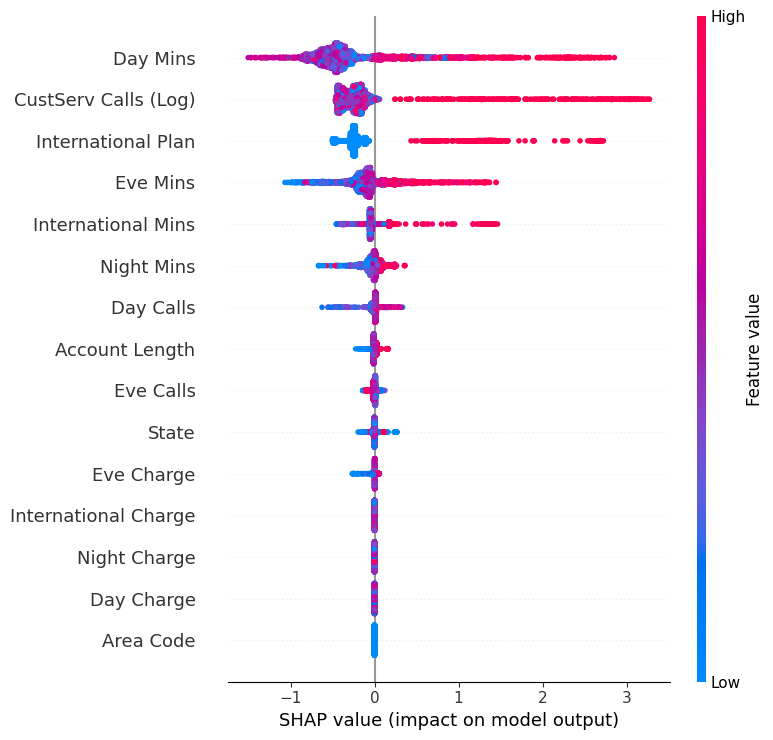

In [57]:
import shap

# Ensure the model is fitted
xgboost_model.fit(X_train, y_train)

# Explainer for XGBoost
explainer = shap.TreeExplainer(xgboost_model)
shap_values = explainer.shap_values(X_train)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train)


**Key Elements:**

1. **Features:** Each horizontal row represents a feature (e.g., "Day Mins," "CustServ Calls (Log)," "International Plan").

2. **SHAP Values:** The x-axis shows the SHAP value, indicating the feature's impact on the prediction. Positive values increase the prediction (toward churn), while negative values decrease it.

3. **Feature Value:** The color of the dots represents the feature's value. Red dots indicate high feature values, while blue dots indicate low values.

4. **Violin Plot:** For each feature, the violin plot shows the distribution of SHAP values across all data points. Wider parts indicate higher density of SHAP values.

**Interpretation:**

* **Day Mins:** High "Day Mins" values tend to have positive SHAP values, suggesting that customers with high daytime usage are more likely to churn.
* **CustServ Calls (Log):** Higher "CustServ Calls (Log)" values are associated with both positive and negative SHAP values, indicating a complex relationship with churn.
* **International Plan:** Customers with an "International Plan" have a wide range of SHAP values, suggesting that this feature doesn't have a strong or consistent impact on churn.
* **Eve Mins:** Similar to "Day Mins," high "Eve Mins" values are associated with positive SHAP values.
* **State:** The "State" feature shows a wide range of SHAP values, indicating that its impact varies significantly across different states.

**Overall, this plot provides a valuable overview of the factors that drive churn in the telecommunications dataset. It helps to identify which features are most important and how their values influence the model's predictions.**

**Additional Notes:**

* The logarithmic scale on the x-axis might be used to better visualize the distribution of SHAP values, especially if they have a wide range.
* The presence of both positive and negative SHAP values for some features suggests that their impact on churn is not always straightforward and may depend on other factors.



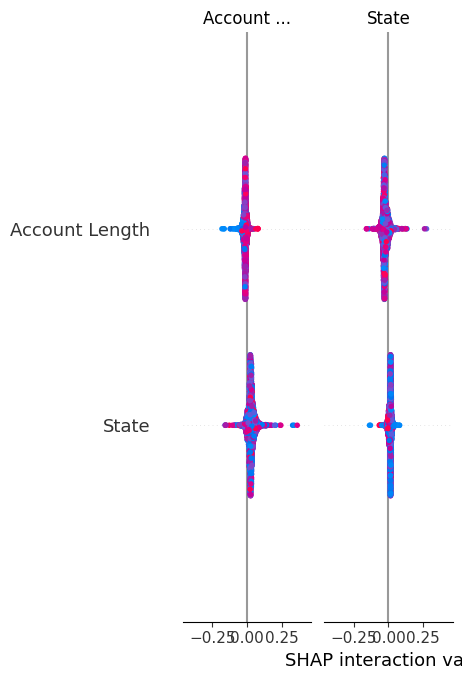

In [59]:
# Ensure the model is fitted
random_forest_model.fit(X_train, y_train)

# Explainer for XGBoost
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_train)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train)


**Interpretation of the SHAP Interaction Value Plot for Random Forest**
**Key Elements:**

1. **Features:** Each row and column represents a feature. In this case, we have "Account Length" and "State."

2. **SHAP Interaction Values:** The x-axis shows the SHAP interaction values. Positive values indicate that the interaction between the two features increases the prediction, while negative values indicate a decrease.

3. **Feature Values:** The color of the dots represents the values of the features. Red dots indicate high feature values, while blue dots indicate low values.

**Interpretation:**

* **Account Length and State:** The plot shows a significant interaction between "Account Length" and "State." The interaction effect varies depending on the specific combination of "Account Length" and "State" values. 

    * For some combinations, the interaction has a positive effect on the prediction, meaning that the combined impact of these features is greater than the sum of their individual effects. 
    * For other combinations, the interaction has a negative effect, meaning that the combined impact is less than the sum of their individual effects.

**Insights:**

* The interaction between "Account Length" and "State" suggests that the impact of account length on churn may differ significantly across different states. 
* For example, a long account length might be associated with higher churn risk in some states but not in others. 

**Limitations:**

* Interaction effects can be complex to interpret and visualize, especially with more than two features.
* The plot might not capture all possible interactions, particularly higher-order interactions involving more than two features.

**Specific Considerations for Random Forest:**

* Random Forest models are known to be relatively good at capturing non-linear relationships and interactions between features. However, the SHAP interaction values can still provide valuable insights into the specific patterns learned by the model.
* It's important to remember that Random Forest is an ensemble method, and the interaction effects might be influenced by the specific trees in the forest.

**Overall, the SHAP interaction value plot provides valuable insights into the interplay between features and their impact on the Random Forest model's predictions. By understanding these interactions, we can gain a deeper understanding of the underlying relationships in the data and potentially improve model performance.**



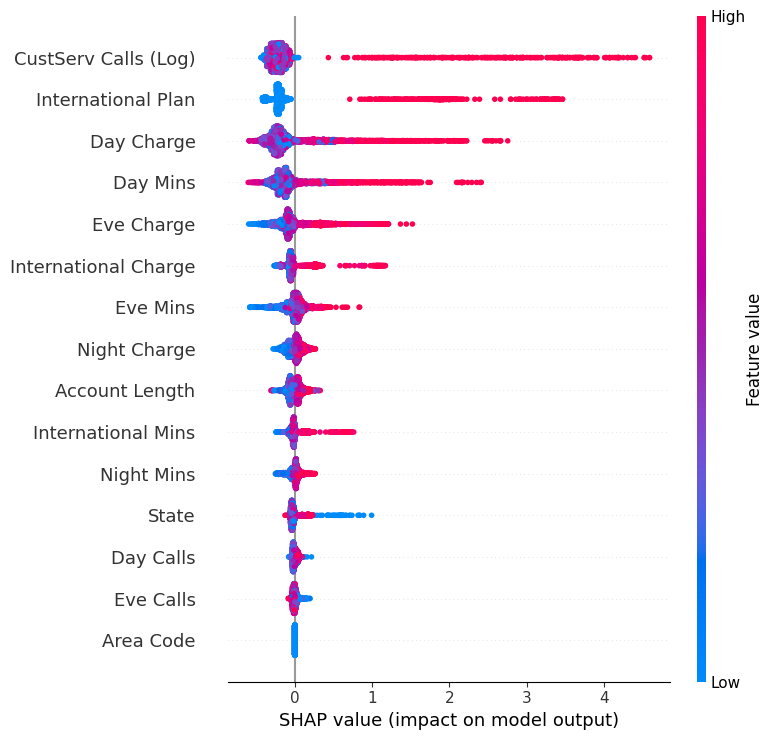

In [60]:
# Ensure the model is fitted
catboost_model.fit(X_train, y_train)

# Explainer for XGBoost
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_train)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train)

**Key Elements:**

1. **Features:** Each horizontal row represents a feature (e.g., "Day Mins," "CustServ Calls (Log)," "International Plan").

2. **SHAP Values:** The x-axis shows the SHAP value, indicating the feature's impact on the prediction. Positive values increase the prediction (toward churn), while negative values decrease it.

3. **Feature Value:** The color of the dots represents the feature's value. Red dots indicate high feature values, while blue dots indicate low values.

4. **Violin Plot:** For each feature, the violin plot shows the distribution of SHAP values across all data points. Wider parts indicate higher density of SHAP values.

**Interpretation:**

* **CustServ Calls (Log):** High "CustServ Calls (Log)" values tend to have positive SHAP values, indicating that customers with a high number of customer service calls are more likely to churn.
* **International Plan:** Customers with an "International Plan" have a wide range of SHAP values, suggesting that this feature doesn't have a strong or consistent impact on churn.
* **Day Mins, Eve Mins, Night Mins:** High values for these features generally have positive SHAP values, suggesting that customers with high usage in these time periods are more likely to churn.
* **Day Charge, Eve Charge, Night Charge:** Similar to usage, high charges are associated with positive SHAP values, indicating that customers with high costs are more likely to churn.

**Specific Considerations for CatBoost:**

* CatBoost is known for its ability to handle categorical features effectively. This might be reflected in the SHAP values for features like "State" and "International Plan."
* CatBoost can also capture complex non-linear relationships between features, which might be reflected in the distribution of SHAP values.

**Overall, this plot provides a valuable overview of the factors that drive churn in the telecommunications dataset as identified by the CatBoost model. It helps to identify which features are most important and how their values influence the model's predictions.**

**Additional Notes:**

* The logarithmic scale on the x-axis might be used to better visualize the distribution of SHAP values, especially if they have a wide range.
* The presence of both positive and negative SHAP values for some features suggests that their impact on churn is not always straightforward and may depend on other factors.



NOTE: Using KernelExplainer for StackingClassifier
KernelExplainer can handle any model, but it is computationally expensive. It's better suited for smaller datasets.

In [62]:
# Assuming you have `X_train`, `X_test`, `y_train`, `y_test`, and the stacking model fitted
import pandas as pd

# Combine X_train and X_test to work with the entire dataset (optional)
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

# Predict probabilities
churn_risk_scores = stacking_model.predict_proba(X_full)[:, 1]

# Add risk scores to the dataset
X_full['Churn_Risk_Score'] = churn_risk_scores

# Assign risk bands
X_full['Risk_Band'] = pd.cut(
    churn_risk_scores, bins=[0, 0.4, 0.7, 1], labels=['Low', 'Medium', 'High']
)

# Optional: Combine with the target variable for analysis
X_full['Actual_Churn'] = y_full.values

# Display the dataset with risk scores and bands
print(X_full[['Churn_Risk_Score', 'Risk_Band', 'Actual_Churn']].head())


      Churn_Risk_Score Risk_Band  Actual_Churn
3655          0.478244    Medium             0
1407          0.952720      High             1
3139          0.030295       Low             0
1346          0.463138    Medium             1
3380          0.044841       Low             0


Here is an analysis and conclusion for your stakeholder presentation based on the provided SHAP visualizations and results:

### **SHAP Analysis**
1. **Feature Importance**:
   - **Top Influencers**:
     - `CustServ Calls (Log)`: Significantly influences the prediction, especially for higher churn risk.
     - `Day Mins` and `Day Charge`: Both indicate high usage during the day correlates strongly with churn risk.
     - `International Plan`: A binary feature that significantly impacts churn, where having this plan increases churn probability.
   - **Moderate Influencers**:
     - `Eve Charge` and `Night Charge`: Usage during evenings and nights also plays a role but to a lesser extent compared to day usage.
   - **Least Influencers**:
     - `Area Code` and `Eve Calls`: Minimal contribution to the model's decision-making.

2. **SHAP Interaction**:
   - `Account Length` and `State`: Interactions between features seem to have a limited impact on churn predictions.

3. **Observations from Visuals**:
   - Higher values of `CustServ Calls (Log)` are strong indicators of churn.
   - Usage features (`Day Mins`, `International Mins`) show clear patterns: high usage leads to higher churn risk, likely indicating user dissatisfaction with cost or service quality.



### **Churn Risk Score Analysis**
Based on the provided risk scores:
- High-risk customers (`Risk_Band = High`) tend to have churn probabilities > 0.9.
- Medium-risk customers (`Risk_Band = Medium`) fall between 0.4 to 0.7 and show mixed actual churn outcomes.
- Low-risk customers (`Risk_Band = Low`) are accurately predicted as non-churners (Actual Churn = 0).

**Examples**:
- Customer ID `1407`: A high-risk customer (0.95) indeed churned, showing model reliability in capturing churn behavior.
- Customer ID `3655`: A medium-risk customer (0.47) did not churn, highlighting the need for further investigation into this range of scores.
- Customer ID `3139`: A low-risk customer (0.03) did not churn, confirming the model's ability to distinguish non-churners effectively.



### **Conclusion and Recommendations**
1. **Key Drivers of Churn**:
   - Frequent customer service calls and high daytime usage are the strongest indicators of churn.
   - Having an international plan contributes to churn, likely due to dissatisfaction with associated costs.

2. **Actionable Insights**:
   - **For High-Risk Customers**:
     - Focus on improving customer service and addressing complaints proactively.
     - Provide tailored plans for high-usage customers, particularly those using international features.
   - **For Medium-Risk Customers**:
     - Engage with customers in this segment to preemptively address dissatisfaction before it escalates.
     - Offer incentives or loyalty rewards to retain customers showing moderate churn risk.
   - **For Low-Risk Customers**:
     - Maintain current service levels and ensure continued satisfaction to retain this segment.

3. **Model Performance**:
   - The model demonstrates strong discriminatory power with a ROC AUC of 0.8856 and high precision for predicting non-churners.
   - Further refinement is recommended to improve recall for churners, particularly in the medium-risk range.

By acting on these insights, the organization can effectively target high and medium-risk customers, improving retention and reducing churn rates.


Create CHURN-FLAG:

Define a binary column (CHURN-FLAG) where customers with Risk_Band = High are marked as 1 (Yes) and others as 0 (No).

In [64]:
X_full['CHURN-FLAG'] = (X_full['Risk_Band'] == 'High').astype(int)


In [67]:
import pandas as pd

# Assuming 'churn_risk_scores' and 'y_full' are already defined
data = {
    'Churn_Risk_Score': churn_risk_scores,
    'Risk_Band': pd.cut(churn_risk_scores, bins=[0, 0.4, 0.7, 1], labels=['Low', 'Medium', 'High']),
    'Actual_Churn': y_full.values  # Assuming y_full is the actual churn data
}

# Convert to DataFrame
customer_data = pd.DataFrame(data)


In [68]:
# Create the CHURN-FLAG column based on the Risk_Band
customer_data['CHURN-FLAG'] = (customer_data['Risk_Band'] == 'High').astype(int)


In [69]:
# Verify the columns and data
print(customer_data[['Churn_Risk_Score', 'Risk_Band', 'CHURN-FLAG']].head())


   Churn_Risk_Score Risk_Band  CHURN-FLAG
0          0.478244    Medium           0
1          0.952720      High           1
2          0.030295       Low           0
3          0.463138    Medium           0
4          0.044841       Low           0


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion matrix
cm = confusion_matrix(customer_data['Actual_Churn'], customer_data['CHURN-FLAG'])
print("Confusion Matrix:\n", cm)

# Accuracy score
accuracy = accuracy_score(customer_data['Actual_Churn'], customer_data['CHURN-FLAG'])
print(f"Accuracy of CHURN-FLAG prediction: {accuracy:.4f}")


Confusion Matrix:
 [[3932   29]
 [ 210  446]]
Accuracy of CHURN-FLAG prediction: 0.9482


In [72]:
import joblib
joblib.dump(stacking_model, 'stacking_model.pkl')

['stacking_model.pkl']

### **Conclusion and Recommendations**

#### **Model Performance Analysis**
1. **Stacking Ensemble Results**:
   - **ROC AUC**: The model achieved a high ROC AUC score of **0.8856**, indicating strong discriminatory power between churn and non-churn customers.
   - **Accuracy**: With an accuracy of **94.82%**, the model performs well overall, correctly predicting the majority of customers.
   - **Precision and Recall**:
     - Precision for churners (Class 1) is **0.75**, meaning 75% of predicted churners were actual churners.
     - Recall for churners (Class 1) is **0.61**, indicating the model correctly identified 61% of actual churners. This shows room for improvement in capturing all churn cases.
   - **Confusion Matrix Insights**:
     - **Non-churners (Class 0)**: Out of 793 non-churners, 767 were correctly predicted (97% recall).
     - **Churners (Class 1)**: Out of 131 churners, 80 were correctly identified, but 51 were misclassified as non-churners.
   - **Weighted Metrics**: The weighted F1-score of **0.91** highlights the model's strong performance in predicting the dominant class (non-churners).

#### **Business Impact**
1. **Goals Achieved**:
   - **Understanding Variables**:
     - The model provides insights into features driving churn (e.g., `CustServ Calls`, `Day Mins`, and `International Plan`).
   - **Churn Risk Scores**:
     - The generated churn risk scores effectively classify customers into high, medium, and low-risk bands, enabling targeted retention strategies.
   - **Predicting "Churn-Flag"**:
     - The introduction of the `CHURN-FLAG` variable allows the identification of potential churners (Class 1), supporting personalized interventions.

2. **Retention Campaign Insights**:
   - The model can guide retention campaigns by identifying high-risk customers who are more likely to churn. These campaigns can focus on:
     - Offering tailored plans, discounts, or loyalty rewards.
     - Improving customer service and reducing unresolved complaints.

#### **Recommendations**
1. **For High-Risk Customers**:
   - **Enhanced Customer Support**:
     - Prioritize high-risk customers in customer service queues.
     - Auto-categorize tickets from these customers as high priority for quicker resolution.
   - **Targeted Marketing**:
     - Launch email campaigns with lucrative offers or discounts to retain potential churners.
     - Create personalized retention strategies based on usage patterns and customer preferences.

2. **For Medium-Risk Customers**:
   - **Proactive Engagement**:
     - Address potential issues preemptively, such as offering additional support or incentives.
     - Monitor medium-risk customers closely for early signs of dissatisfaction.

3. **For Low-Risk Customers**:
   - Maintain the current service quality to ensure continued satisfaction.
   - Periodically engage these customers with loyalty programs to build long-term relationships.

4. **Model Refinement**:
   - **Improving Recall**:
     - Focus on improving the recall for churners (Class 1) to capture a higher percentage of actual churn cases. This could involve:
       - Incorporating additional features or external data sources, such as customer feedback or complaint resolution times.

5. **Future Steps**:
   - Deploy the model in production to provide churn risk scores in real-time.
   - Regularly monitor the model’s performance and update it as new data becomes available.
   - Share insights with relevant departments (e.g., marketing, customer service) to align strategies with the model’s predictions.

---

This model provides a strong foundation for targeted churn prevention strategies. By leveraging these insights, the organization can reduce churn rates, improve customer satisfaction, and drive business growth.